In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ComplexUpset)

In [3]:
library(ggrepel)

In [4]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: 'Co

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [6]:
hpath_fname = file.path('..', 'genomes', 'HOT1A3', 'HOT1A3_protein_list.csv')
hpath_df = read.csv(hpath_fname)


# Enrichment of differentially expressed proteins and transcripts

Compare DE genes and DE proteins and run enrichment for all

In [7]:
rnaseq_dpath = file.path('..', 'RNASEQ', 'DE_results')
list.files(rnaseq_dpath)


[1] "HOT1A3_DE_DESEQ_longterm_results.csv"       
 [2] "HOT1A3_DE_DESEQ_results.csv"                
 [3] "HOT1A3_DE_DESEQ_results_ref_vs_long.csv"    
 [4] "HOT1A3_DE_DESEQ_vsd.csv"                    
 [5] "HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv"
 [6] "HOT1A3_GOSEQ_results_ref_vs_long.csv"       
 [7] "MED4_DE_DESEQ_longterm_results.csv"         
 [8] "MED4_DE_DESEQ_results.csv"                  
 [9] "MED4_DE_DESEQ_results_ref_vs_long.csv"      
[10] "MED4_DE_DESEQ_vsd.csv"                      
[11] "MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv"  
[12] "MED4_GOSEQ_results_ref_vs_long.csv"

In [8]:
proteome_dpath = file.path('..', 'Proteome', 'data')
list.files(proteome_dpath)


[1] "A_axenic_proteome.txt"                                                                          
 [2] "A_axenic_proteome_norm.txt"                                                                     
 [3] "ALT_Axenic_DE.csv"                                                                              
 [4] "ALT_CC_DE.csv"                                                                                  
 [5] "C_ALT_proteome.txt"                                                                             
 [6] "C_ALT_proteome_norm.txt"                                                                        
 [7] "C_PRO_proteome.txt"                                                                             
 [8] "C_PRO_proteome_norm.txt"                                                                        
 [9] "Nov22_Processing.xlsx"                                                                          
[10] "P_axenic_proteome.txt"                                                                          
[11] "P_axenic_proteome_norm.txt"                                                                     
[12] "PRO_Axenic_DE.csv"                                                                              
[13] "PRO_CC_DE.csv"                                                                                  
[14] "uniprot-compressed_true_download_true_fields_accession_2Cid_2Cprotei-2023.01.11-12.43.22.99.txt"

In [9]:
df_rnaseq1 = read.csv(file.path(rnaseq_dpath,'HOT1A3_DE_DESEQ_longterm_results.csv'))  %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

df_rnaseq2 = read.csv(file.path(rnaseq_dpath,'HOT1A3_DE_DESEQ_results.csv')) %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

In [10]:
unique(df_rnaseq2$contrast)

[1] "A2vsA1" "A3vsA1" "A3vsA2" "C1vsA1" "C2vsC1" "C3vsC1" "C4vsC1" "C5vsC1"
 [9] "C3vsC2" "C4vsC3" "C5vsC4"

In [11]:
df_prot1 = read.csv(file.path(proteome_dpath,'ALT_CC_DE.csv'))
df_prot2 = read.csv(file.path(proteome_dpath,'ALT_Axenic_DE.csv'))

In [12]:
names(df_rnaseq1)
names(df_rnaseq2)
names(df_prot1)
names(df_prot2)



[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "X"            "logFC"        "AveExpr"      "t"            "P.Value"     
 [6] "adj.P.Val"    "B"            "gene"         "count"        "sca.t"       
[11] "sca.P.Value"  "sca.adj.pval" "contrast"     "log.sca.pval"

[1] "X"            "logFC"        "AveExpr"      "t"            "P.Value"     
 [6] "adj.P.Val"    "B"            "gene"         "count"        "sca.t"       
[11] "sca.P.Value"  "sca.adj.pval" "contrast"     "log.sca.pval"

In [13]:
dp1 = df_prot1 %>%  select(
    'contrast','gene','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval', 'protein_id'='gene') %>%
    mutate(Assay = 'Proteome')
dp2 = df_prot2 %>%  select(
    'contrast','gene','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval', 'protein_id'='gene')%>%
    mutate(Assay = 'Proteome')


In [14]:
dr1 = df_rnaseq1 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
dr2 = df_rnaseq2 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
    


In [15]:
dput(sort(unique(df_prot1$contrast)))
dput(sort(unique(df_prot2$contrast)))
dput(sort(unique(df_rnaseq1$contrast)))
dput(sort(unique(df_rnaseq2$contrast)))


c("C2 - C1", "C3 - C1", "C3 - C2", "C4 - C1", "C4 - C3", "C5 - C1", 
"C5 - C4", "Clongterm - C1", "Clongterm - C2", "Clongterm - C3"
)
c("A2 - A1", "A3 - A1", "A3 - A2", "A5 - A1", "A5 - A3")
c("longtermvsA1", "longtermvsA2", "longtermvsA3", "longtermvsC1", 
"longtermvsC2", "longtermvsC3")
c("A2vsA1", "A3vsA1", "A3vsA2", "C1vsA1", "C2vsC1", "C3vsC1", 
"C3vsC2", "C4vsC1", "C4vsC3", "C5vsC1", "C5vsC4")


In [16]:
lookup <- c(
    "C2 - C1" = 'C2vsC1_prot', 
    "C3 - C1" = 'C3vsC1_prot', 
    "C4 - C1" = 'C4vsC1_prot', 
    "C5 - C1" = 'C5vsC1_prot',

    "C3 - C2" = 'C3vsC2_prot', 
    "C4 - C2" = 'C4vsC2_prot', 
    "C5 - C2" = 'C5vsC2_prot', 

    "C4 - C3" = 'C4vsC3_prot', 
    "C5 - C3" = 'C5vsC3_prot', 
    "C5 - C4" = 'C5vsC4_prot', 

    "Clongterm - C1" = 'LATEvsC1_prot', 
    "Clongterm - C2" = 'LATEvsC2_prot', 
    "Clongterm - C3" = 'LATEvsC3_prot', 

    "A2 - A1" = 'A2vsA1_prot',
    "A3 - A1" = 'A3vsA1_prot',
    "A5 - A1" = 'A5vsA1_prot',
    "A3 - A2" = 'A3vsA2_prot',
    "A5 - A3" = 'A5vsA3_prot',
    "Intercept" = "Intercept",

    "longtermvsA1" = 'LATEvsA1_rna', 
    "longtermvsA2" = 'LATEvsA2_rna', 
    "longtermvsA3" = 'LATEvsA3_rna', 
    "longtermvsC1" = 'LATEvsC1_rna', 
    "longtermvsC2" = 'LATEvsC2_rna', 
    "longtermvsC3" = 'LATEvsC3_rna', 

    "A2vsA1" = 'A2vsA1_rna', 
    "A3vsA1" = 'A3vsA1_rna', 
    "A3vsA2" = 'A3vsA2_rna', 
    "C1vsA1" = 'C1vsA1_rna', 
    "C2vsC1" = 'C2vsC1_rna', 
    "C3vsC1" = 'C3vsC1_rna', 
    "C4vsC1" = 'C4vsC1_rna', 
    "C5vsC1" = 'C5vsC1_rna',
    "C3vsC2" = 'C3vsC2_rna', 
    "C4vsC3" = 'C4vsC3_rna',
    #"C5vsC3" = 'C5vsC3_rna',
    "C5vsC4" = 'C5vsC4_rna'
)
    
    


In [17]:
dr1 = dr1 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dr2 = dr2 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dp1 = dp1 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dp2 = dp2 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')


In [18]:
names(hpath_df)

[1] "seq_id"             "Name"               "gene"              
 [4] "gene_synonym"       "locus_tag"          "old_locus_tag"     
 [7] "source"             "start"              "end"               
[10] "strand"             "Note"               "exception"         
[13] "inference"          "product"            "protein_id"        
[16] "gene_length"        "path_id"            "main"              
[19] "sub"                "path"               "ecpath"            
[22] "Category"           "Membrane.transport" "kegg_gene1"        
[25] "kegg_gene2"

In [19]:
dp1 = left_join(dp1, hpath_df, by='protein_id') %>% mutate(gene_id = locus_tag)
dp2 = left_join(dp2, hpath_df, by='protein_id') %>% mutate(gene_id = locus_tag)


Warning message in left_join(dp1, hpath_df, by = "protein_id"):
"Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1298 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this warning."
Warning message in left_join(dp2, hpath_df, by = "protein_id"):
"Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 555 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this warning."


In [20]:
names(dp1)# %>% mutate(gene_id = locus_tag)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "seq_id"            
[10] "Name"               "gene"               "gene_synonym"      
[13] "locus_tag"          "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "gene_length"        "path_id"           
[25] "main"               "sub"                "path"              
[28] "ecpath"             "Category"           "Membrane.transport"
[31] "kegg_gene1"         "kegg_gene2"         "gene_id"

In [21]:
 dr1 = left_join(dr1, hpath_df, by=c('gene_id'='locus_tag'))
 dr2 = left_join(dr2, hpath_df, by=c('gene_id'='locus_tag'))
 


In [22]:
df_all = bind_rows(dp1, dp2, dr1, dr2)

In [23]:
df_all = df_all %>% 
    mutate(
        Category = if_else(is.na(Category), 'Uncharacterized', Category),
        Category = if_else(Category == 'Poorly characterized', 'Uncharacterized', Category)
          )

In [24]:
dput(unique(df_all$contrast))

c("C2 - C1", "C3 - C1", "C4 - C1", "C5 - C1", "C3 - C2", "C4 - C3", 
"C5 - C4", "Clongterm - C1", "Clongterm - C2", "Clongterm - C3", 
"A2 - A1", "A3 - A1", "A5 - A1", "A3 - A2", "A5 - A3", "longtermvsA1", 
"longtermvsA2", "longtermvsA3", "longtermvsC1", "longtermvsC2", 
"longtermvsC3", "A2vsA1", "A3vsA1", "A3vsA2", "C1vsA1", "C2vsC1", 
"C3vsC1", "C4vsC1", "C5vsC1", "C3vsC2", "C4vsC3", "C5vsC4")


In [25]:
df_all %>% count(contrast1, contrast,  .drop = FALSE)


contrast1     contrast       n   
1  A2vsA1_prot   A2 - A1        2229
2  A2vsA1_rna    A2vsA1         4015
3  A3vsA1_prot   A3 - A1        2229
4  A3vsA1_rna    A3vsA1         4015
5  A3vsA2_prot   A3 - A2        2229
6  A3vsA2_rna    A3vsA2         4015
7  A5vsA1_prot   A5 - A1        2229
8  A5vsA3_prot   A5 - A3        2229
9  C1vsA1_rna    C1vsA1         4015
10 C2vsC1_prot   C2 - C1        2229
11 C2vsC1_rna    C2vsC1         4015
12 C3vsC1_prot   C3 - C1        2229
13 C3vsC1_rna    C3vsC1         4015
14 C3vsC2_prot   C3 - C2        2229
15 C3vsC2_rna    C3vsC2         4015
16 C4vsC1_prot   C4 - C1        2229
17 C4vsC1_rna    C4vsC1         4015
18 C4vsC3_prot   C4 - C3        2229
19 C4vsC3_rna    C4vsC3         4015
20 C5vsC1_prot   C5 - C1        2229
21 C5vsC1_rna    C5vsC1         4015
22 C5vsC4_prot   C5 - C4        2229
23 C5vsC4_rna    C5vsC4         4015
24 LATEvsA1_rna  longtermvsA1   4015
25 LATEvsA2_rna  longtermvsA2   4015
26 LATEvsA3_rna  longtermvsA3   4015
27 LATEvsC1_prot Clongterm - C1 2229
28 LATEvsC1_rna  longtermvsC1   4015
29 LATEvsC2_prot Clongterm - C2 2229
30 LATEvsC2_rna  longtermvsC2   4015
31 LATEvsC3_prot Clongterm - C3 2229
32 LATEvsC3_rna  longtermvsC3   4015

# GOSEQ

In [26]:
names(df_all)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "seq_id"            
[10] "Name"               "gene"               "gene_synonym"      
[13] "locus_tag"          "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "gene_length"        "path_id"           
[25] "main"               "sub"                "path"              
[28] "ecpath"             "Category"           "Membrane.transport"
[31] "kegg_gene1"         "kegg_gene2"         "gene_id"

In [27]:
df_all = df_all %>% 
    mutate(
        down = ((logFC < 0) & (padj < 0.05)),
        up   = ((logFC > 0) & (padj < 0.05)),
        is_de   = (padj < 0.05),
)

In [28]:
kegg_fname = file.path('..', 'genomes', 'HOT1A3', 'HOT1A3_pathways_category.csv')
kegg_df = read.csv(kegg_fname)


In [29]:
kegg_df = left_join(kegg_df, hpath_df %>% select(locus_tag, protein_id), 
          by='protein_id', multiple = "all") %>% 
    mutate(gene_id=locus_tag)

In [30]:
t(kegg_df)

[,1]                                                             
protein_id         WP_010179497.1                                                   
path_id            K02946                                                           
main               09120 Genetic Information Processing                             
sub                09122 Translation                                                
path               03010 Ribosome [PATH:ko03010]                                    
ecpath             K02946  RP-S10, MRPS10, rpsJ; small subunit ribosomal protein S10
Category           Genetic Info                                                     
Membrane.transport                                                                  
locus_tag          ACZ81_RS01655                                                    
gene_id            ACZ81_RS01655                                                    
                   [,2]                                                             
protein_id         WP_010179497.1                                                   
path_id            K02946                                                           
main               09180 Brite Hierarchies                                          
sub                09182 Protein families: genetic information processing           
path               03011 Ribosome [BR:ko03011]                                      
ecpath             K02946  RP-S10, MRPS10, rpsJ; small subunit ribosomal protein S10
Category           Genetic Info                                                     
Membrane.transport                                                                  
locus_tag          ACZ81_RS01655                                                    
gene_id            ACZ81_RS01655                                                    
                   [,3]                                                      
protein_id         WP_012516526.1                                            
path_id            K02338                                                    
main               09120 Genetic Information Processing                      
sub                09124 Replication and repair                              
path               03030 DNA replication [PATH:ko03030]                      
ecpath             K02338  dnaN; DNA polymerase III subunit beta [EC:2.7.7.7]
Category           Genetic Info                                              
Membrane.transport                                                           
locus_tag          ACZ81_RS00010                                             
gene_id            ACZ81_RS00010                                             
                   [,4]                                                      
protein_id         WP_012516526.1                                            
path_id            K02338                                                    
main               09120 Genetic Information Processing                      
sub                09124 Replication and repair                              
path               03430 Mismatch repair [PATH:ko03430]                      
ecpath             K02338  dnaN; DNA polymerase III subunit beta [EC:2.7.7.7]
Category           Genetic Info                                              
Membrane.transport                                                           
locus_tag          ACZ81_RS00010                                             
gene_id            ACZ81_RS00010                                             
                   [,5]                                                      
protein_id         WP_012516526.1                                            
path_id            K02338                                                    
main               09120 Genetic Information Processing                      
sub                09124 Replication and repair                              
path               03440 Homologous recombi

In [31]:
ignore_main = c('09160 Human Diseases', 
                '09150 Organismal Systems', 
                #'09190 Not Included in Pathway or Brite', 
                #'09180 Brite Hierarchies',
                ''
               )

In [32]:
run_enrichment <- function(contrastname, encolname, testcolname) {
    #cat_df = path_df %>% select(encolname, main) %>% distinct()    
    print(contrastname)
    print(encolname)
    print(testcolname)
    
    mpath_df = kegg_df %>%
       filter(!main %in% ignore_main)  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(PATH = word(PATH)) %>%
       distinct(PATH, gene_id, .keep_all= TRUE) %>%
       select(gene_id, PATH)
    test_df = df_all %>% drop_na(padj) %>% filter(contrast1 == contrastname)
    test_df$sigval = if_else(test_df[[testcolname]], 1, 0)
    DEgenes = test_df$sigval
    names(DEgenes) = test_df$gene_id
    #table(DEgenes)
    LENgenes = test_df$gene_length
    names(LENgenes) = test_df$gene_id
    pwf = nullp(DEgenes, bias.data=LENgenes)
    goseq_res = goseq(pwf, gene2cat = as.data.frame(mpath_df))
    goseq_res = goseq_res %>% filter(numInCat>=5) 
    goseq_res$padj = p.adjust(goseq_res$over_represented_pvalue, method="BH")
    goseq_res = goseq_res %>%
       relocate(padj, .after = over_represented_pvalue) #%>%
       #relocate(PATH, .after = category) 
    goseq_res$type = testcolname
    goseq_res$enrich = encolname
    goseq_res$contrast = contrastname
    goseq_res$organism = 'HOT1A3'
    #return(mpath_df)
    return (goseq_res)
}

In [33]:
kegg_df

protein_id     path_id main                                      
1    WP_010179497.1 K02946  09120 Genetic Information Processing      
2    WP_010179497.1 K02946  09180 Brite Hierarchies                   
3    WP_012516526.1 K02338  09120 Genetic Information Processing      
4    WP_012516526.1 K02338  09120 Genetic Information Processing      
5    WP_012516526.1 K02338  09120 Genetic Information Processing      
6    WP_012516526.1 K02338  09180 Brite Hierarchies                   
7    WP_012516526.1 K02338  09180 Brite Hierarchies                   
8    WP_012516568.1 K05501  09180 Brite Hierarchies                   
9    WP_012516568.1 K05501  09180 Brite Hierarchies                   
10   WP_012516577.1 K02913  09120 Genetic Information Processing      
11   WP_012516577.1 K02913  09180 Brite Hierarchies                   
12   WP_012516822.1 K15727  09180 Brite Hierarchies                   
13   WP_012516860.1 K04653  09190 Not Included in Pathway or Brite    
14   WP_012516863.1 K04654  09190 Not Included in Pathway or Brite    
15   WP_012516900.1 K07156  09180 Brite Hierarchies                   
16   WP_012516906.1 K13638  09180 Brite Hierarchies                   
17   WP_012516916.1 K07233  09190 Not Included in Pathway or Brite    
18   WP_012516940.1 K05499  09180 Brite Hierarchies                   
19   WP_012516958.1 K02926  09120 Genetic Information Processing      
20   WP_012516958.1 K02926  09180 Brite Hierarchies                   
21   WP_012516959.1 K02892  09120 Genetic Information Processing      
22   WP_012516959.1 K02892  09180 Brite Hierarchies                   
23   WP_012516961.1 K02965  09120 Genetic Information Processing      
24   WP_012516961.1 K02965  09180 Brite Hierarchies                   
25   WP_012516988.1 K04752  09190 Not Included in Pathway or Brite    
26   WP_012517074.1 K03671  09180 Brite Hierarchies                   
27   WP_012517169.1 K02888  09120 Genetic Information Processing      
28   WP_012517169.1 K02888  09180 Brite Hierarchies                   
29   WP_012517170.1 K02899  09120 Genetic Information Processing      
30   WP_012517170.1 K02899  09180 Brite Hierarchies                   
⋮    ⋮              ⋮       ⋮                                         
4043 WP_232376021.1 K08303  09180 Brite Hierarchies                   
4044 WP_232376025.1 K00114  09100 Metabolism                          
4045 WP_232376025.1 K00114  09100 Metabolism                          
4046 WP_232376025.1 K00114  09100 Metabolism                          
4047 WP_232376026.1 K02336  09180 Brite Hierarchies                   
4048 WP_232376032.1 K07798  09130 Environmental Information Processing
4049 WP_232376032.1 K07798  09180 Brite Hierarchies                   
4050 WP_232376033.1 K07798  09130 Environmental Information Processing
4051 WP_232376033.1 K07798  09180 Brite Hierarchies                   
4052 WP_232376034.1 K07644  09130 Environmental Information Processing
4053 WP_232376034.1 K07644  09180 Brite Hierarchies                   
4054 WP_232376034.1 K07644  09180 Brite Hierarchies                   
4055 WP_232376034.1 K07644  09180 Brite Hierarchies                   
4056 WP_232376035.1 K07644  09130 Environmental Information Processing
4057 WP_232376035.1 K07644  09180 Brite Hierarchies                   
4058 WP_232376035.1 K07644  09180 Brite Hierarchies                   
4059 WP_232376035.1 K07644  09180 Brite Hierarchies                   
4060 WP_232376039.1 K07484  09190 Not Included in Pathway or Brite    
4061 WP_232376041.1 K15725  09180 Brite Hierarchies                   
4062 WP_232376042.1 K15727  09180 Brite Hierarchies                   
4063 WP_232376043.1 K15727  09180 Brite Hierarchies                   
4064 WP_232376044.1 K15727  09180 Brite Hierarchies                   
4065 WP_232376045.1 K15727  09180 Brite Hierarchies                   
4066 WP_232376046.1 K15725  09180 Brite Hierarchies                   
4067 WP_232376048.1 K04655  0

[1] "C2vsC1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C2vsC1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


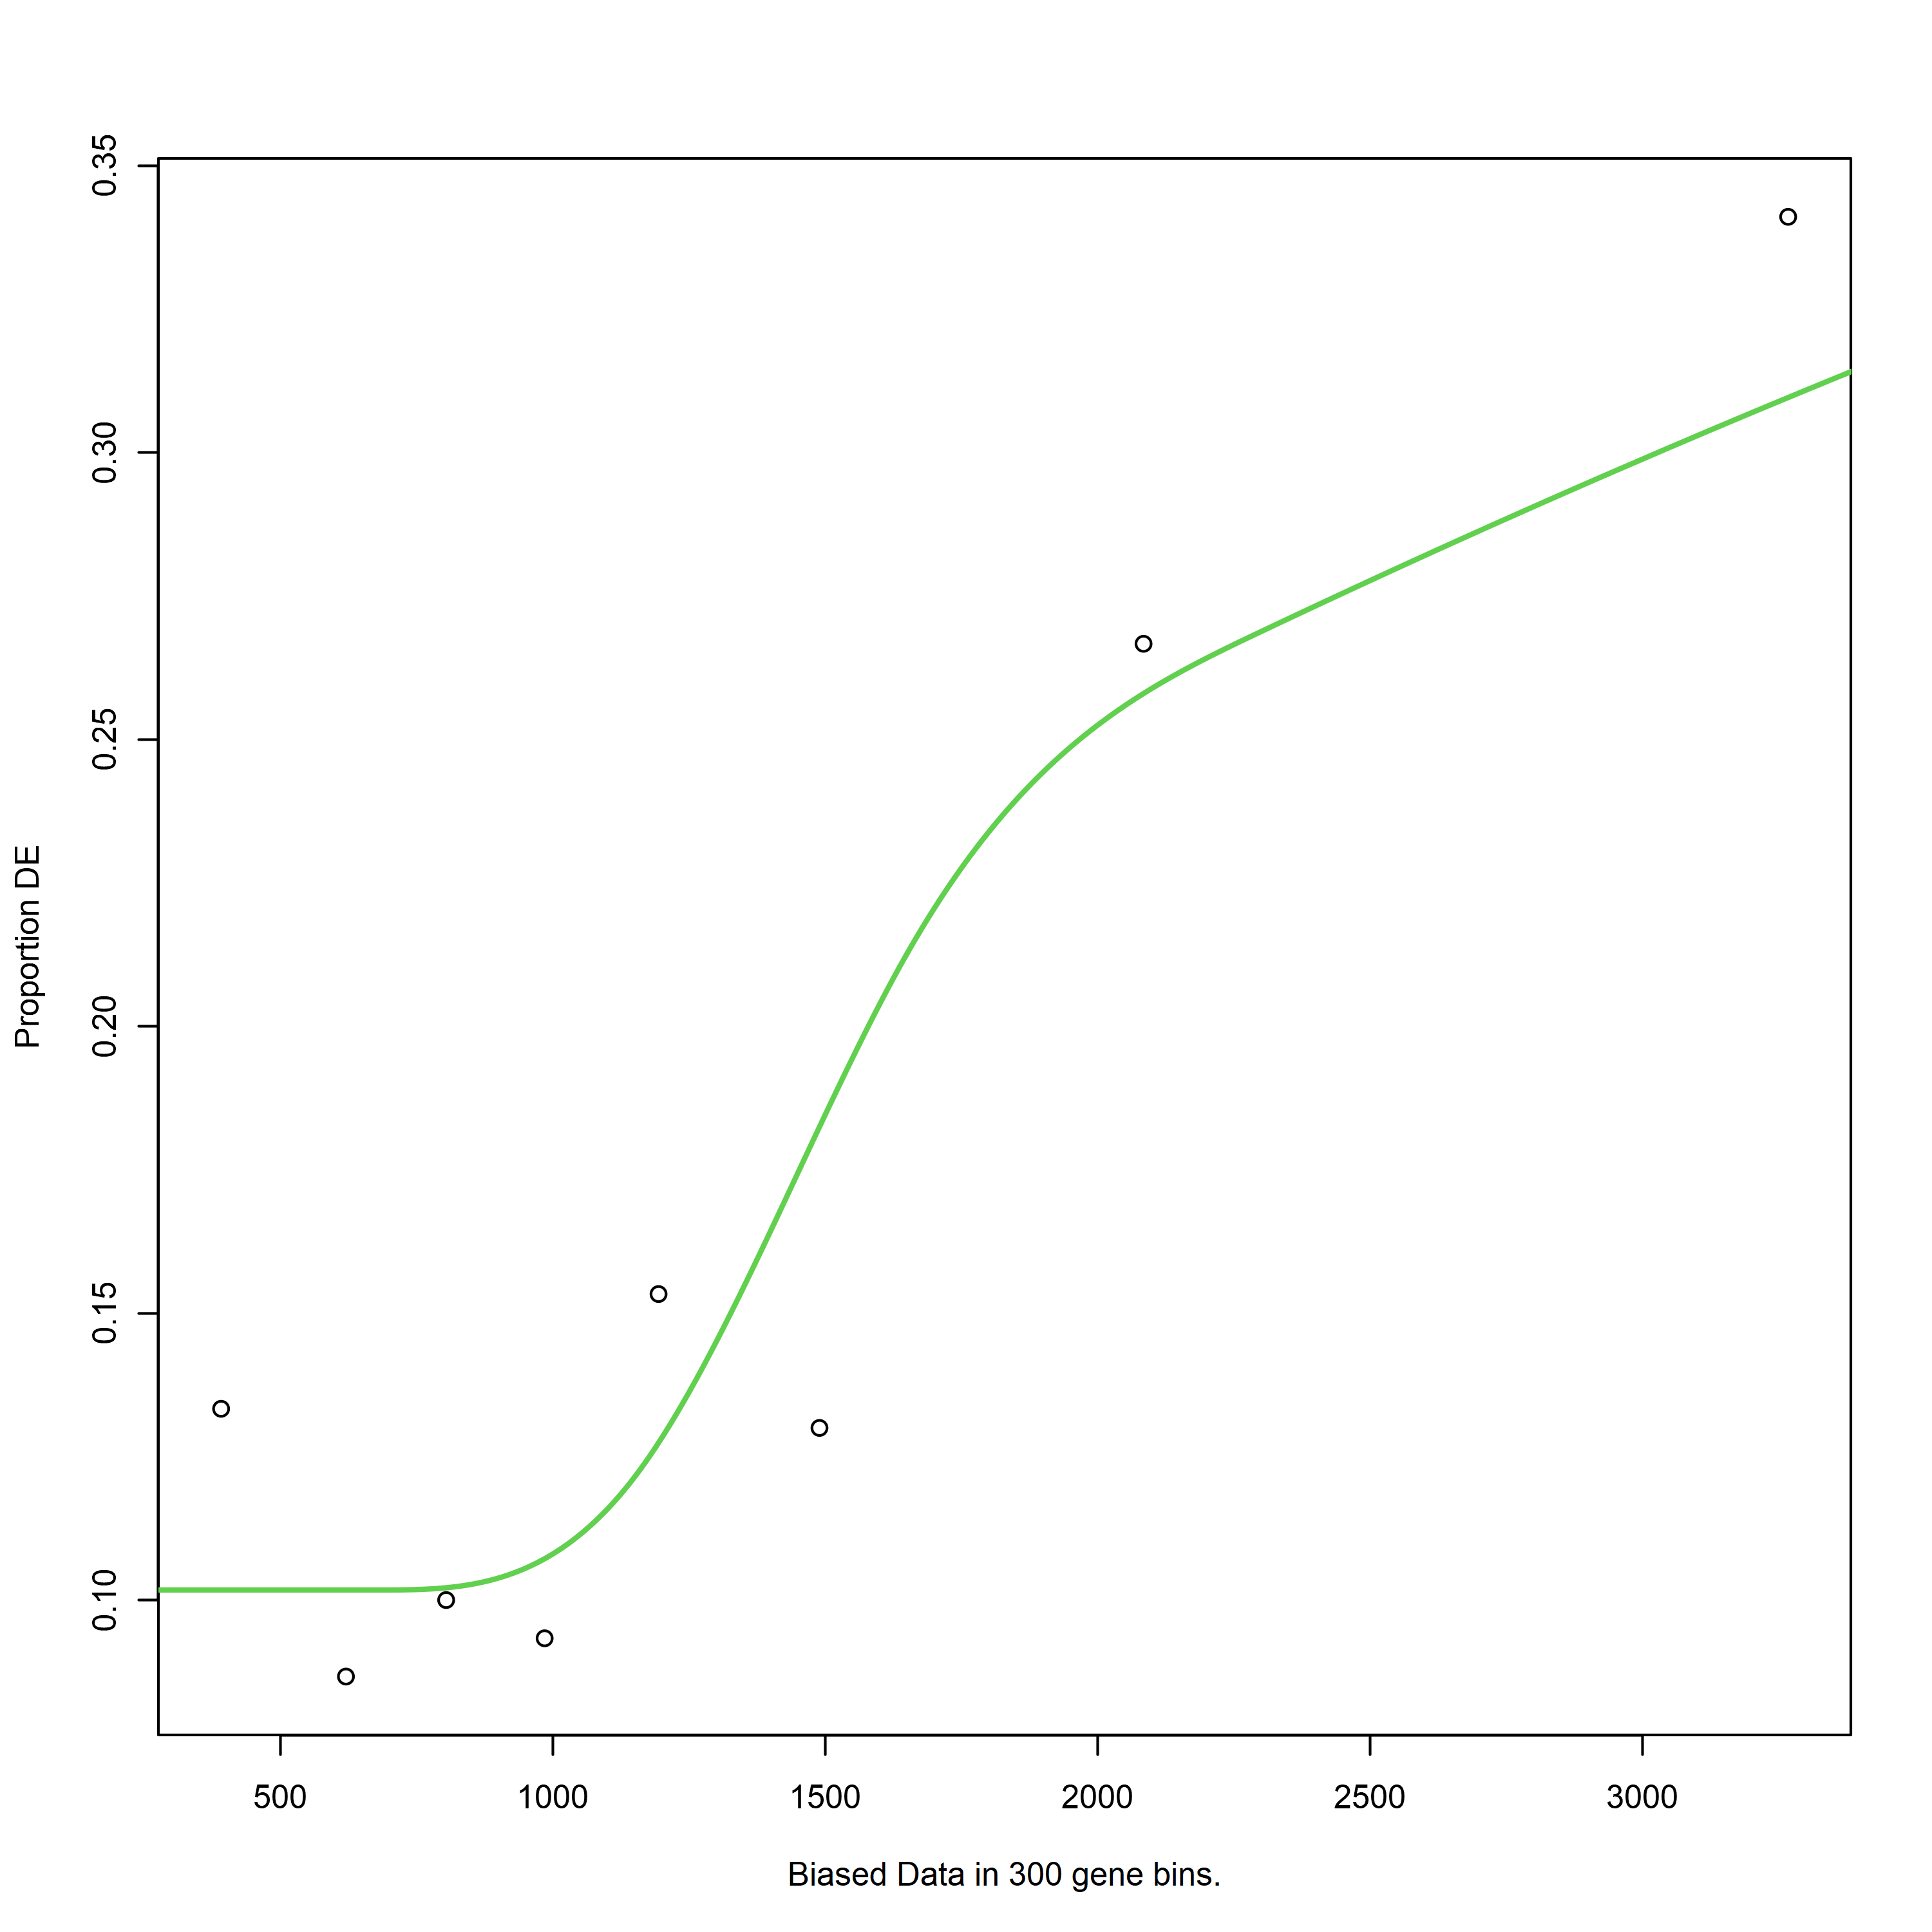

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


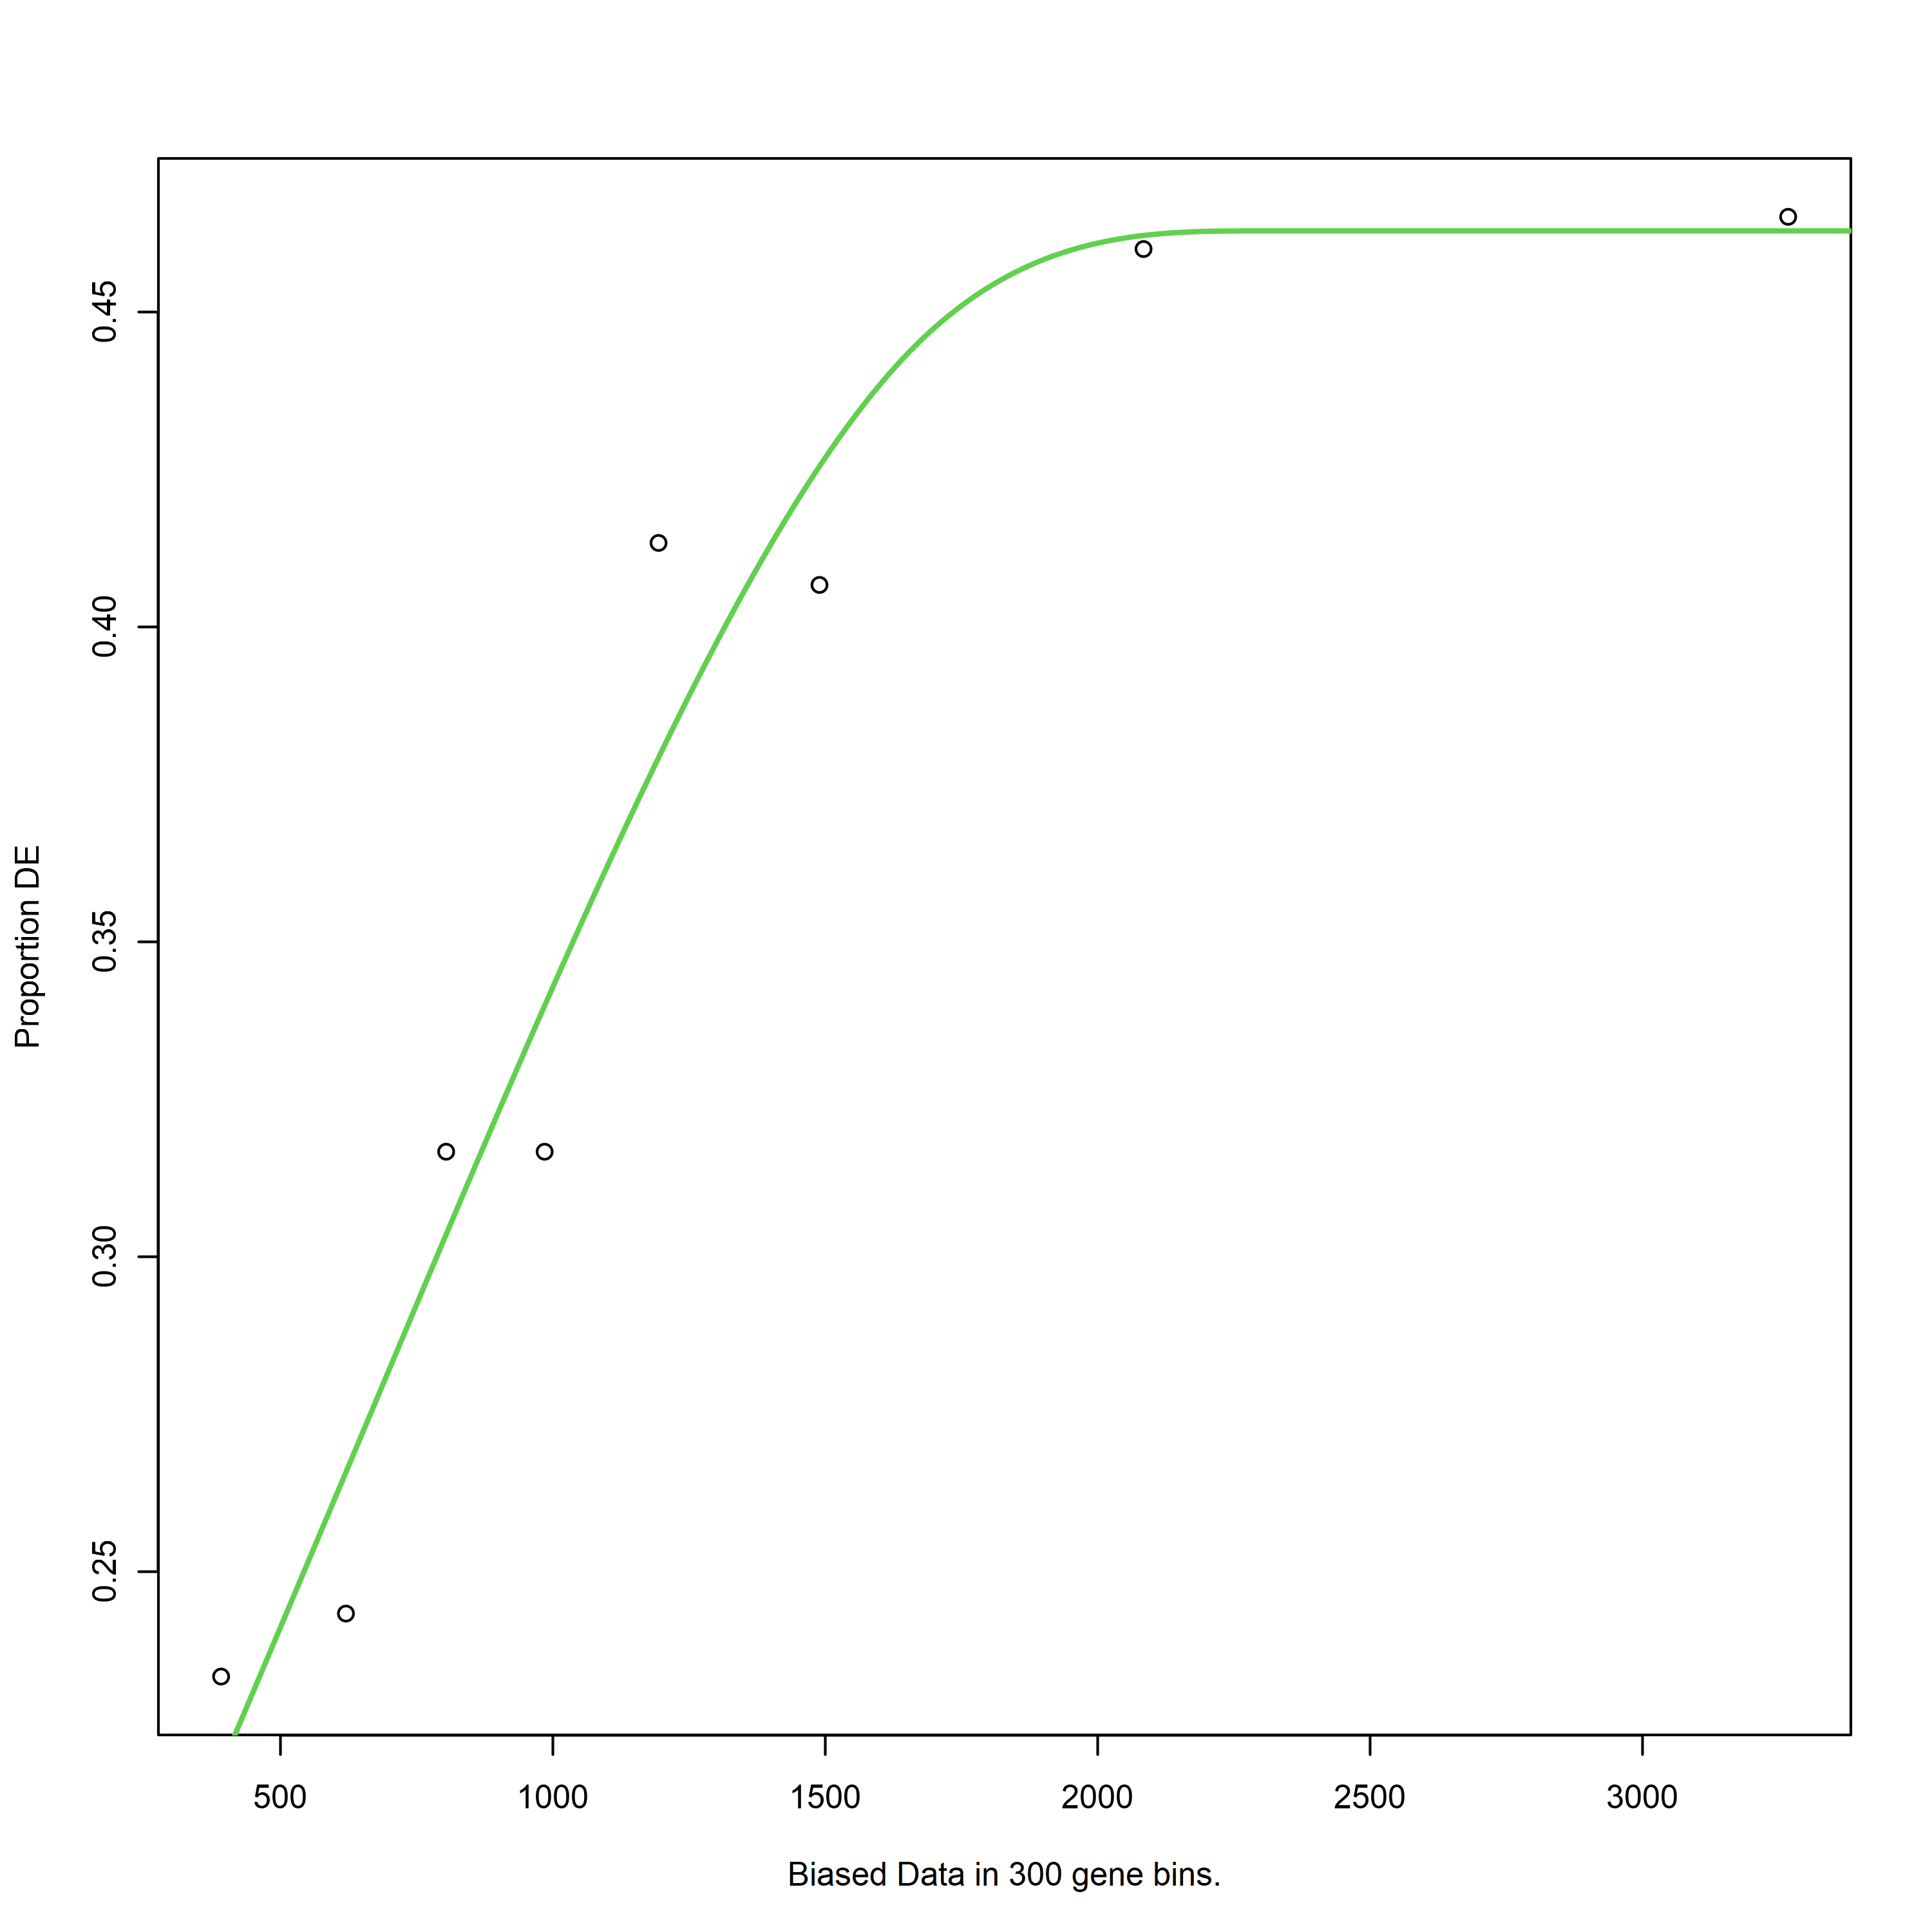

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


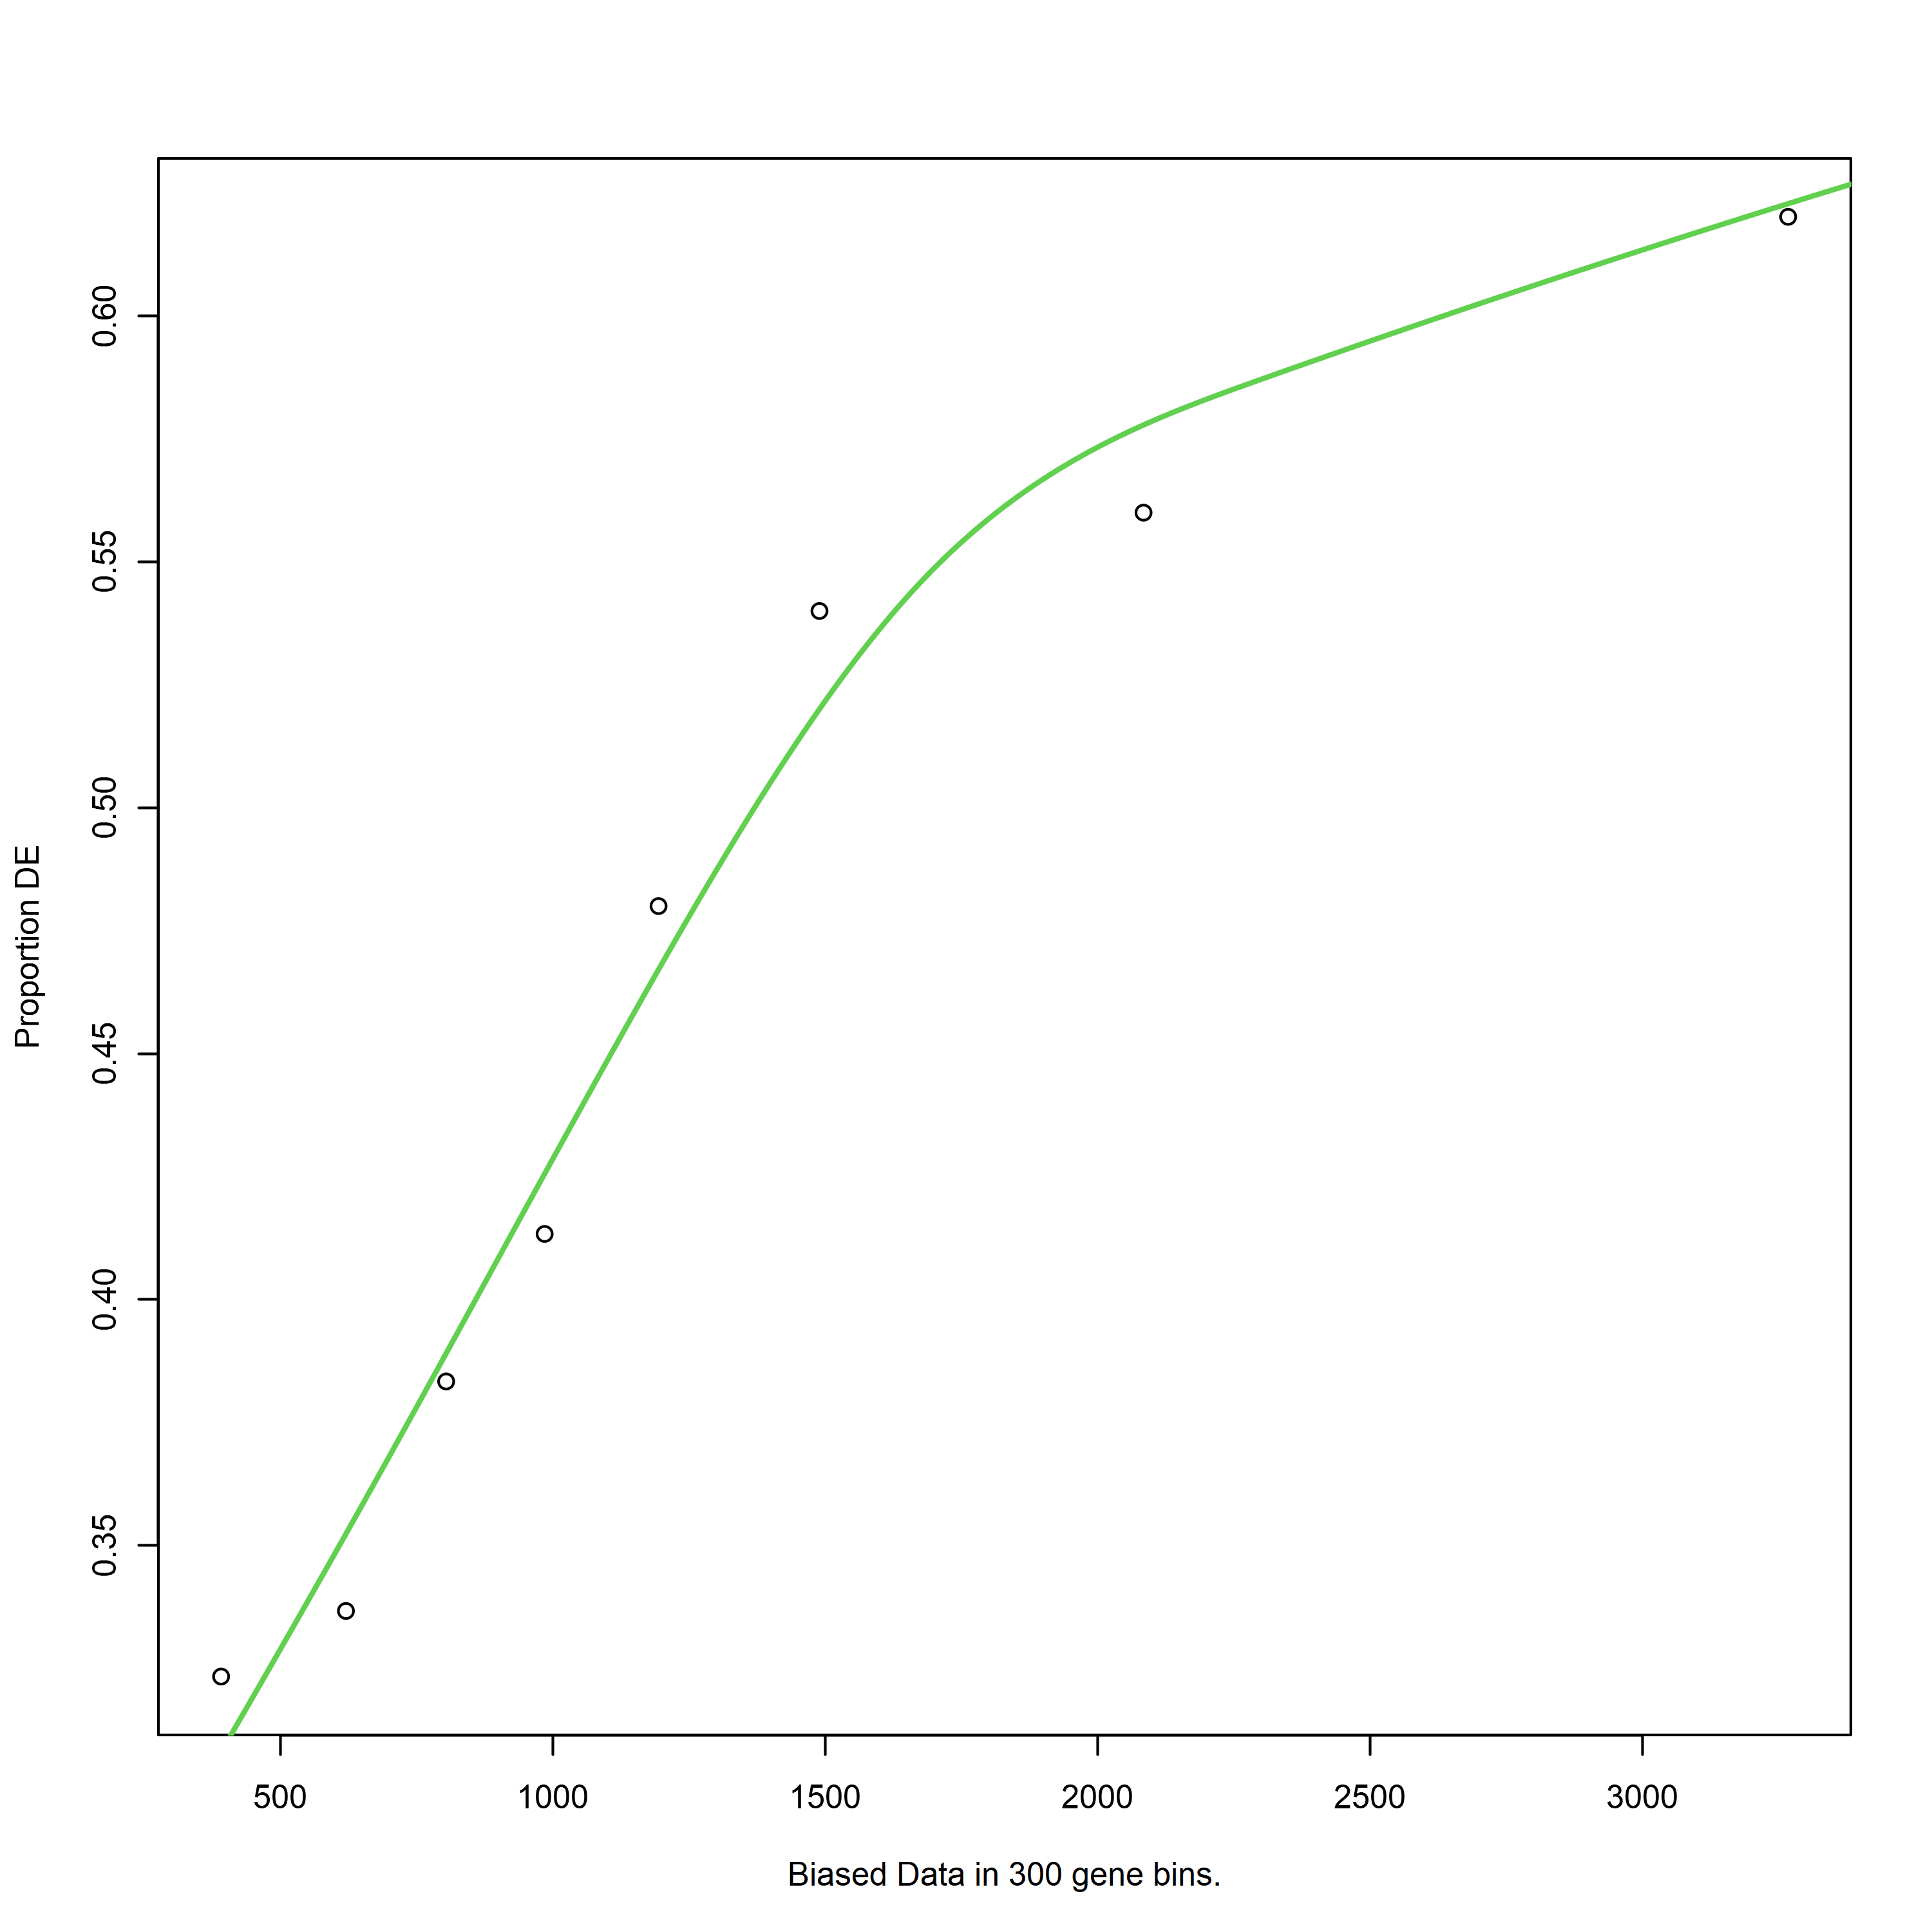

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC2_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC2_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC3_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC3_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC4_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC4_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


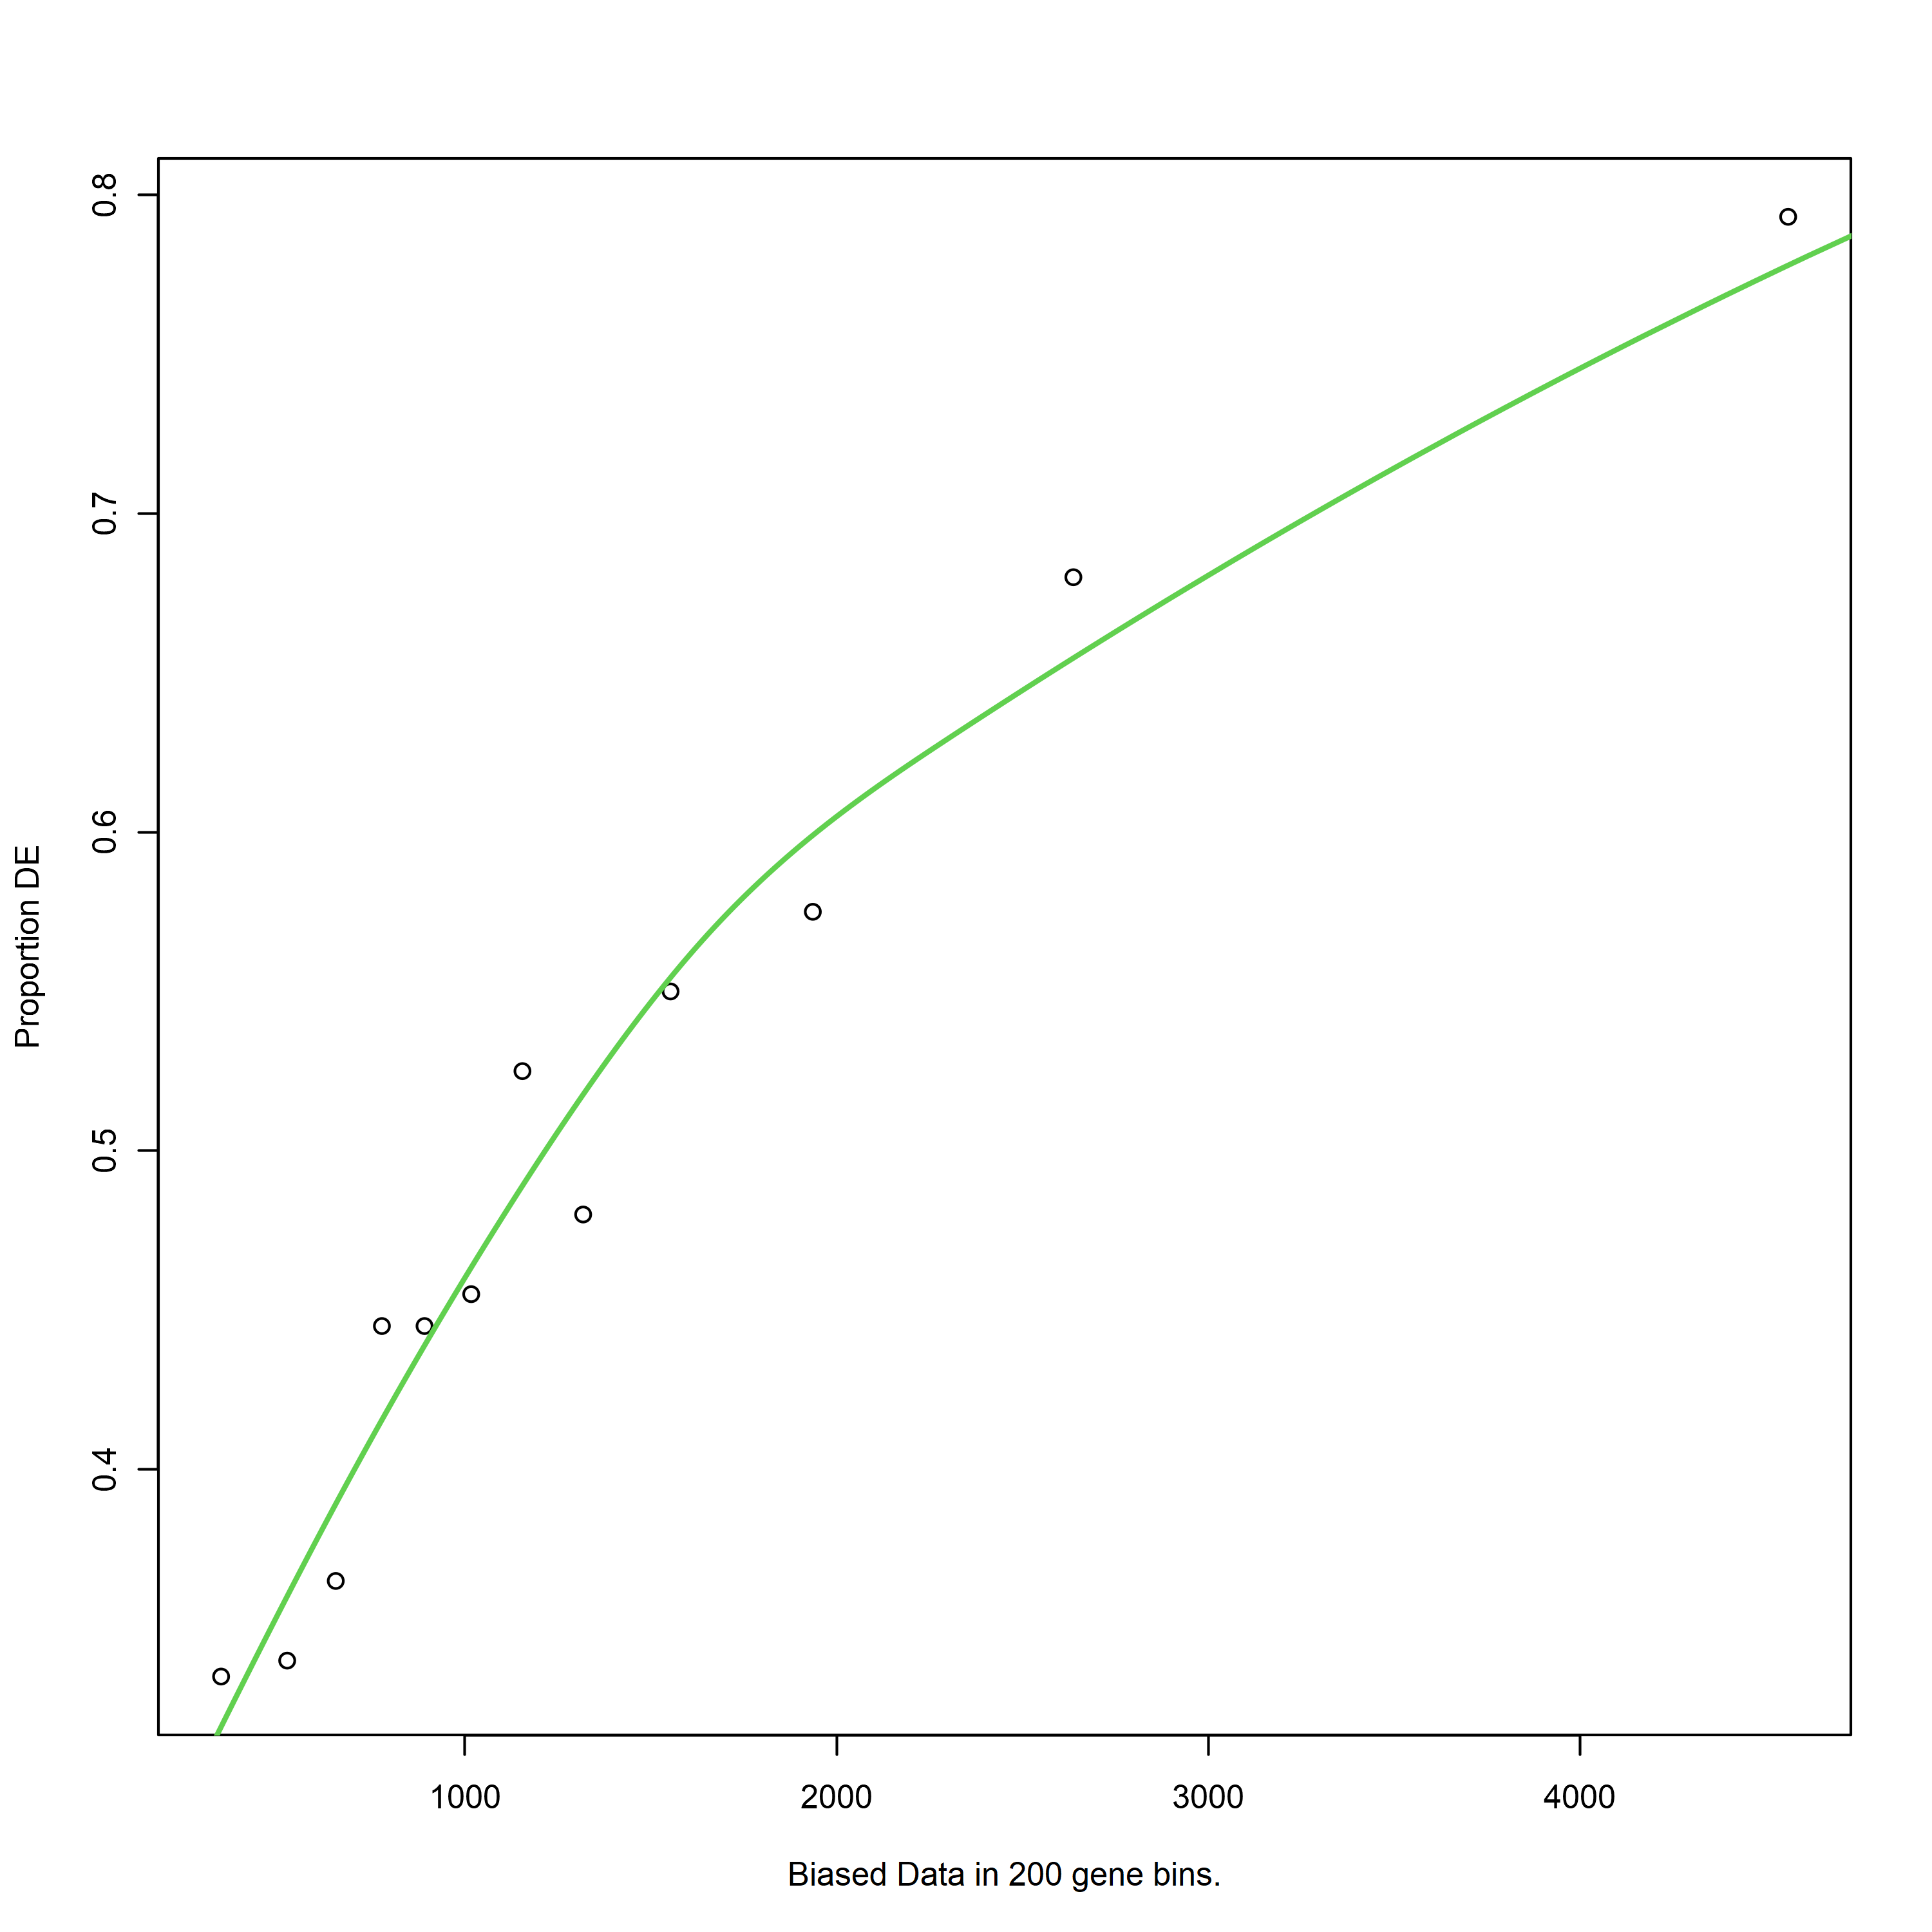

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC2_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC2_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


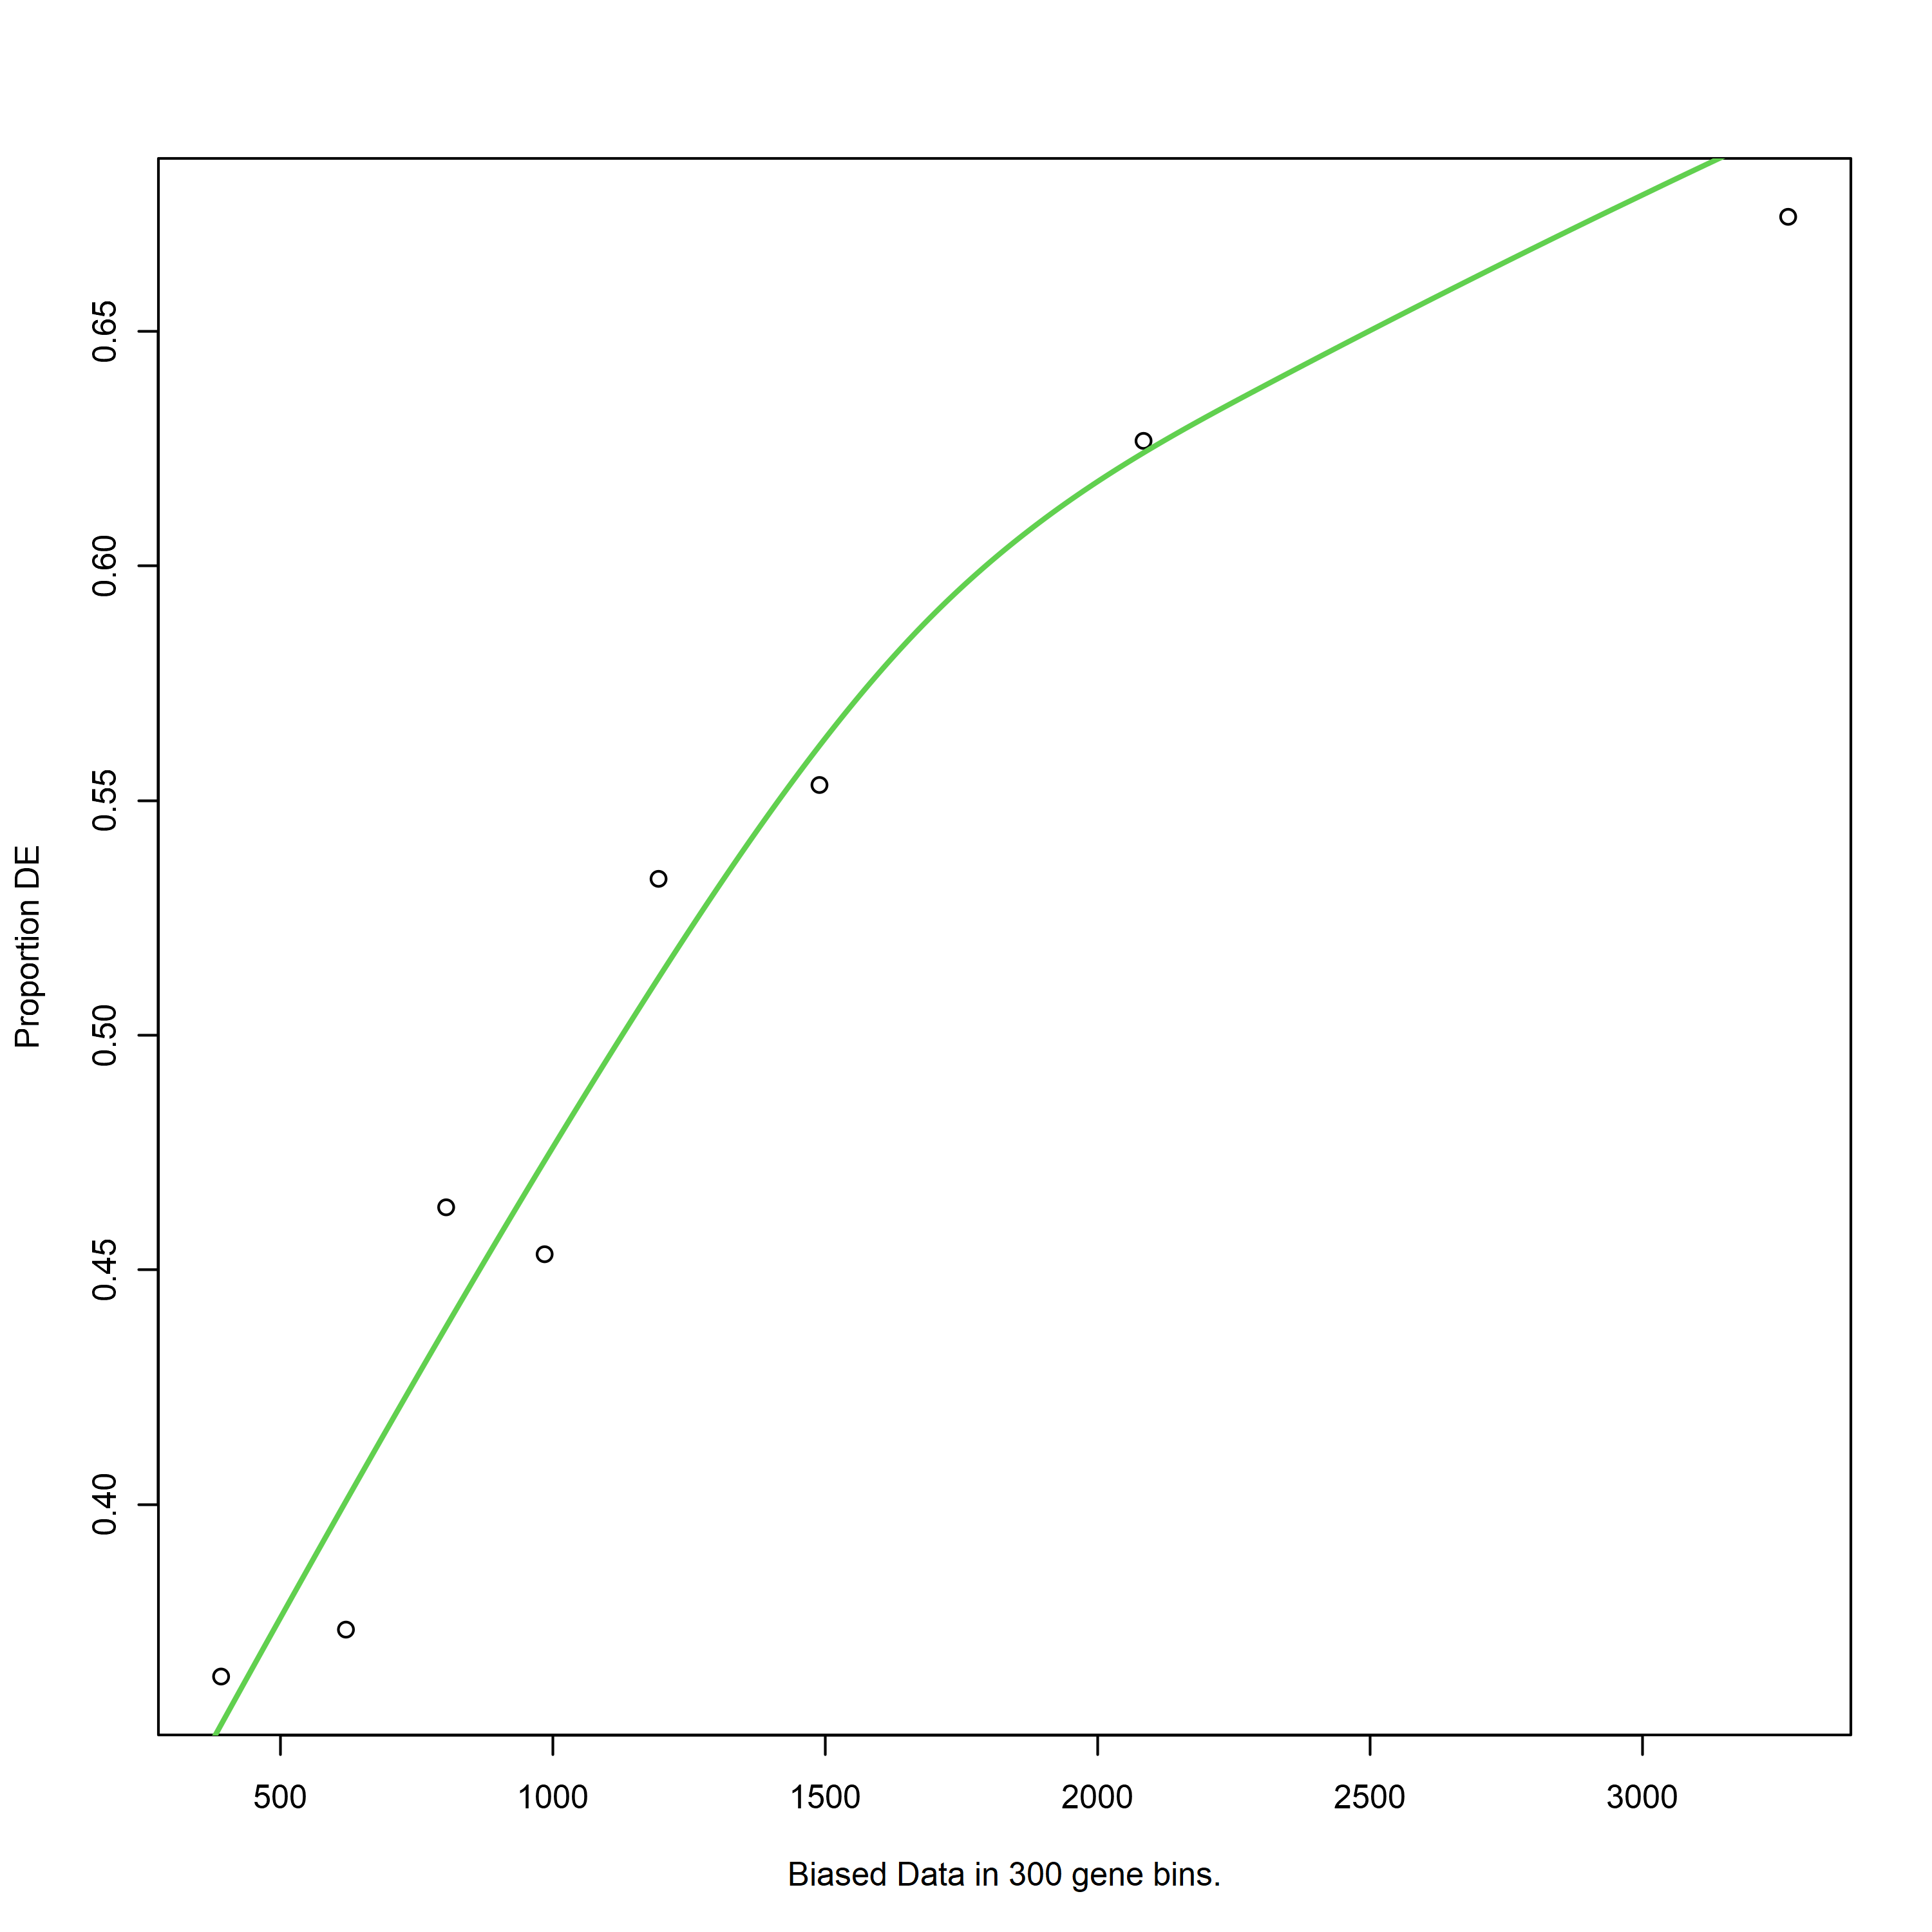

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC3_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC3_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


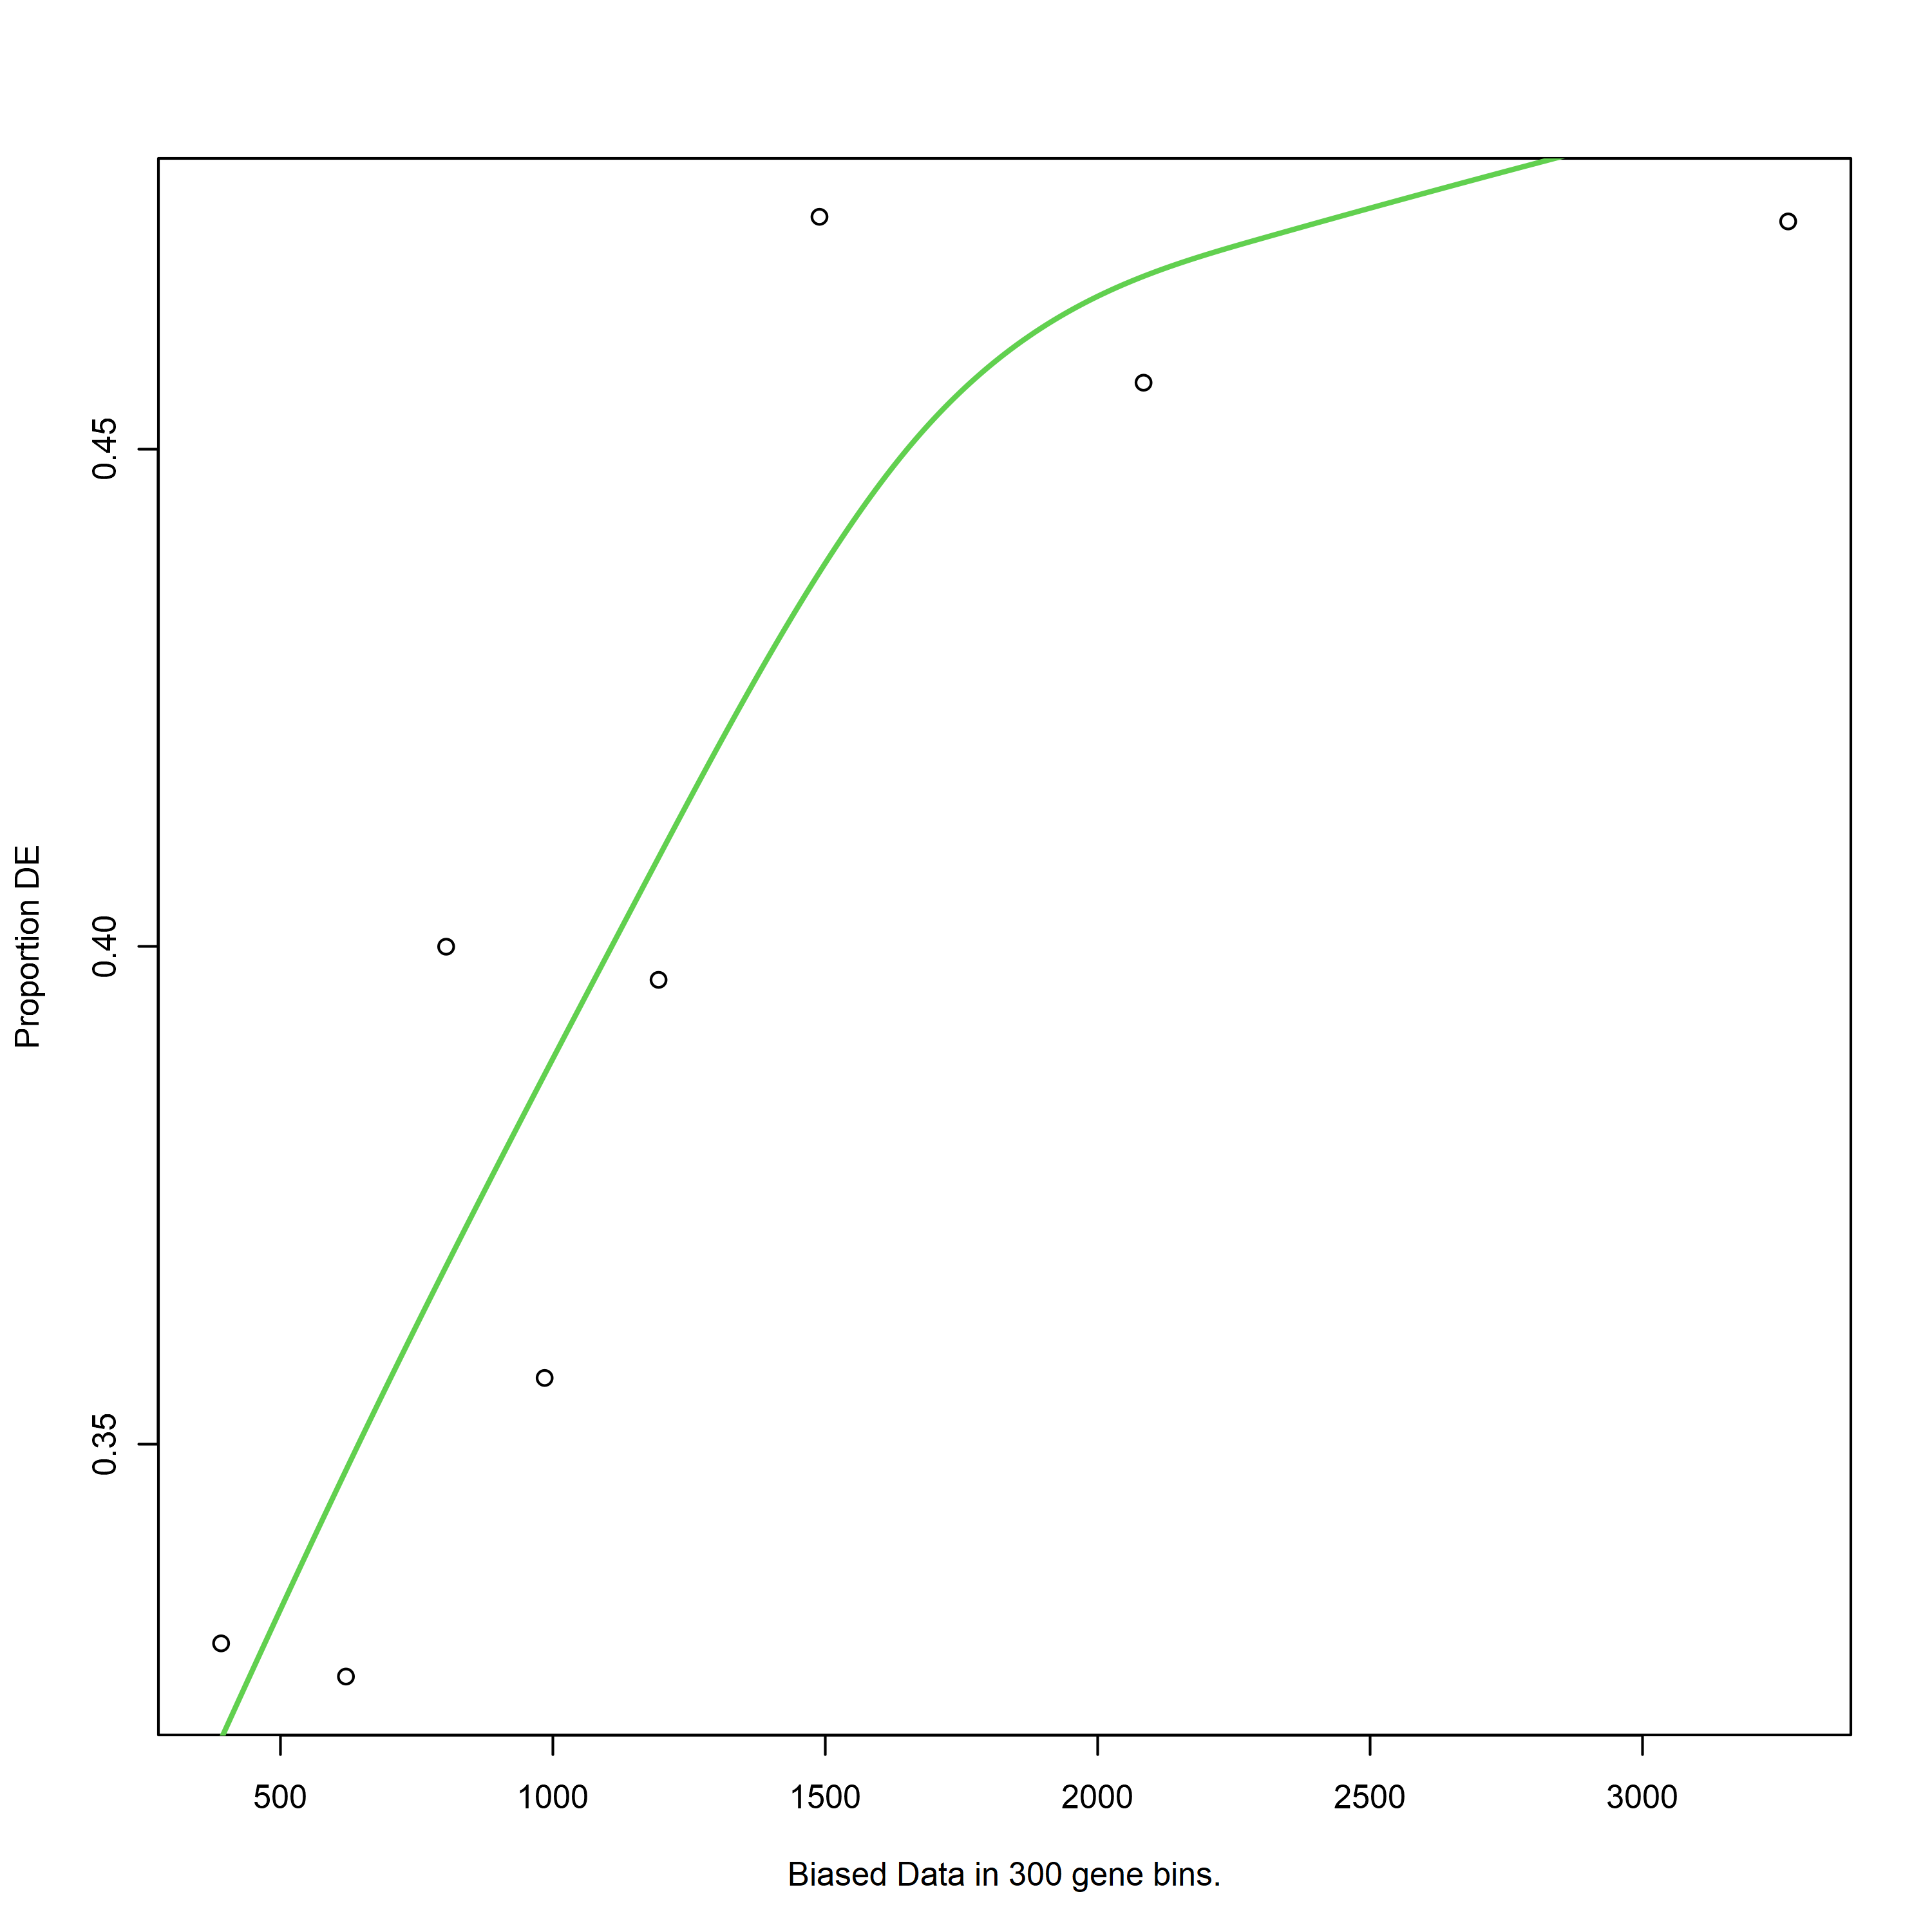

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A2vsA1_prot"
[1] "sub"
[1] "is_de"


Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



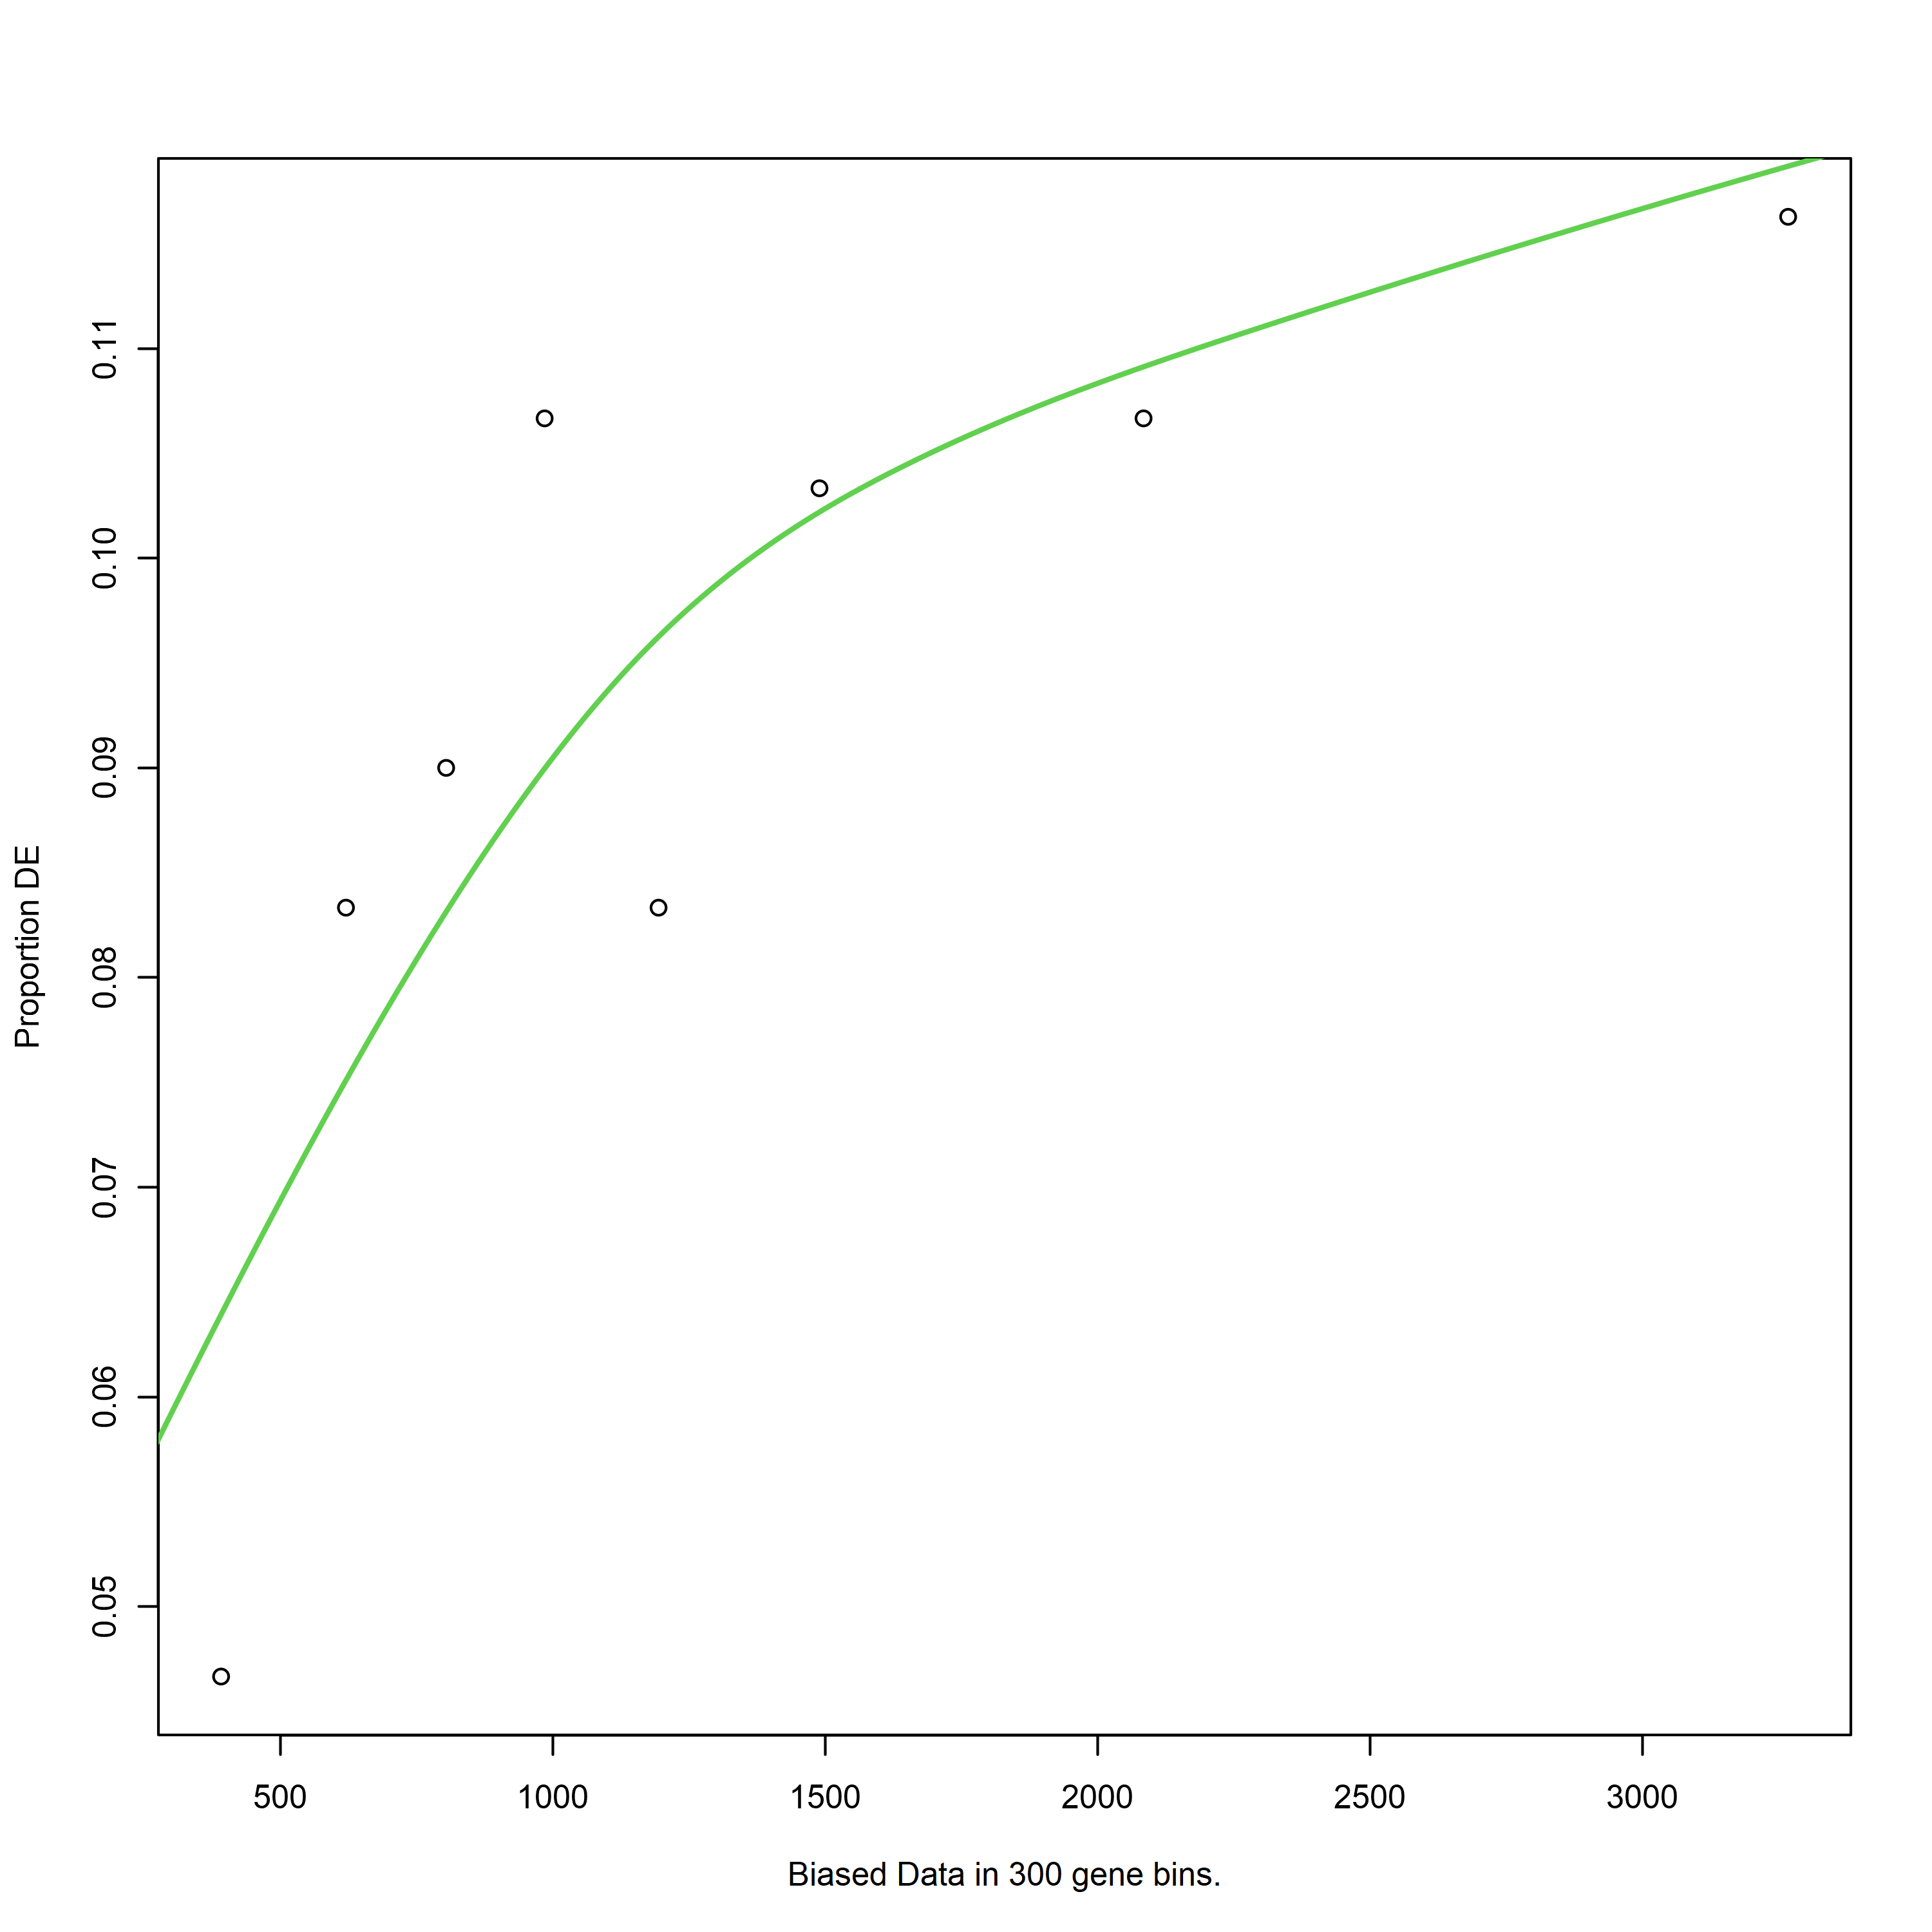

[1] "A2vsA1_prot"
[1] "path"
[1] "is_de"


Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


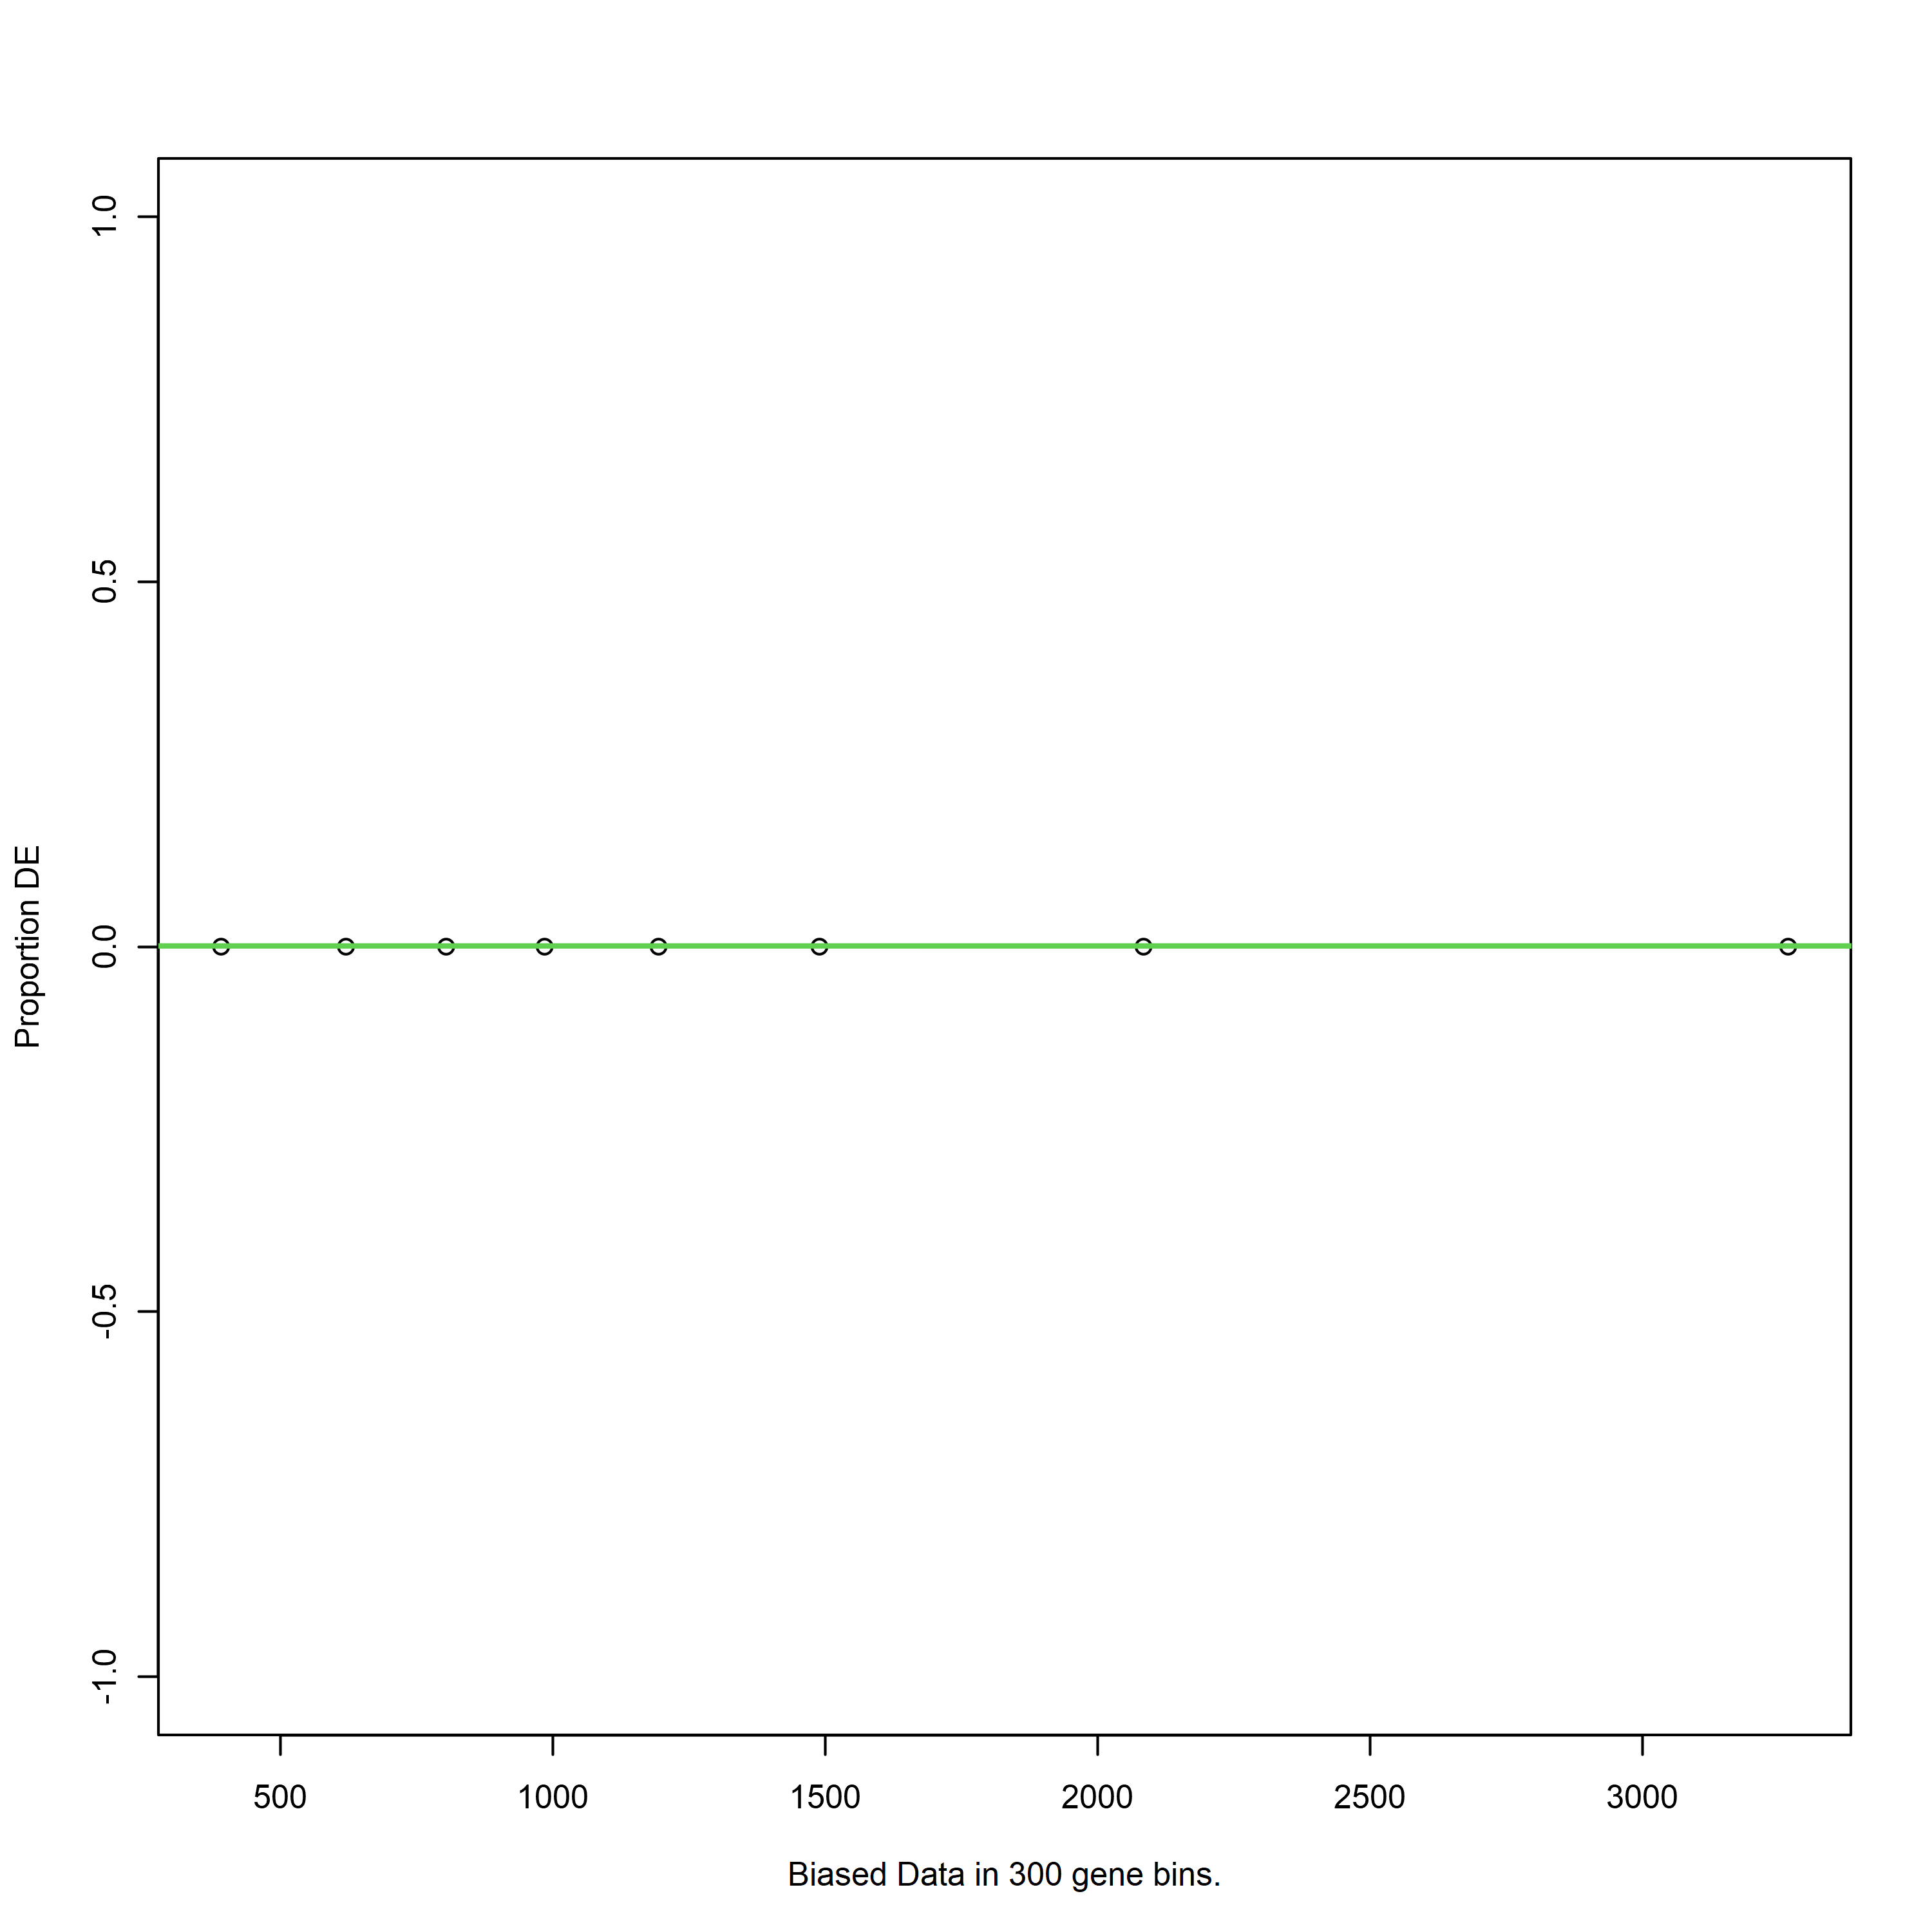

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A5vsA1_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A5vsA1_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


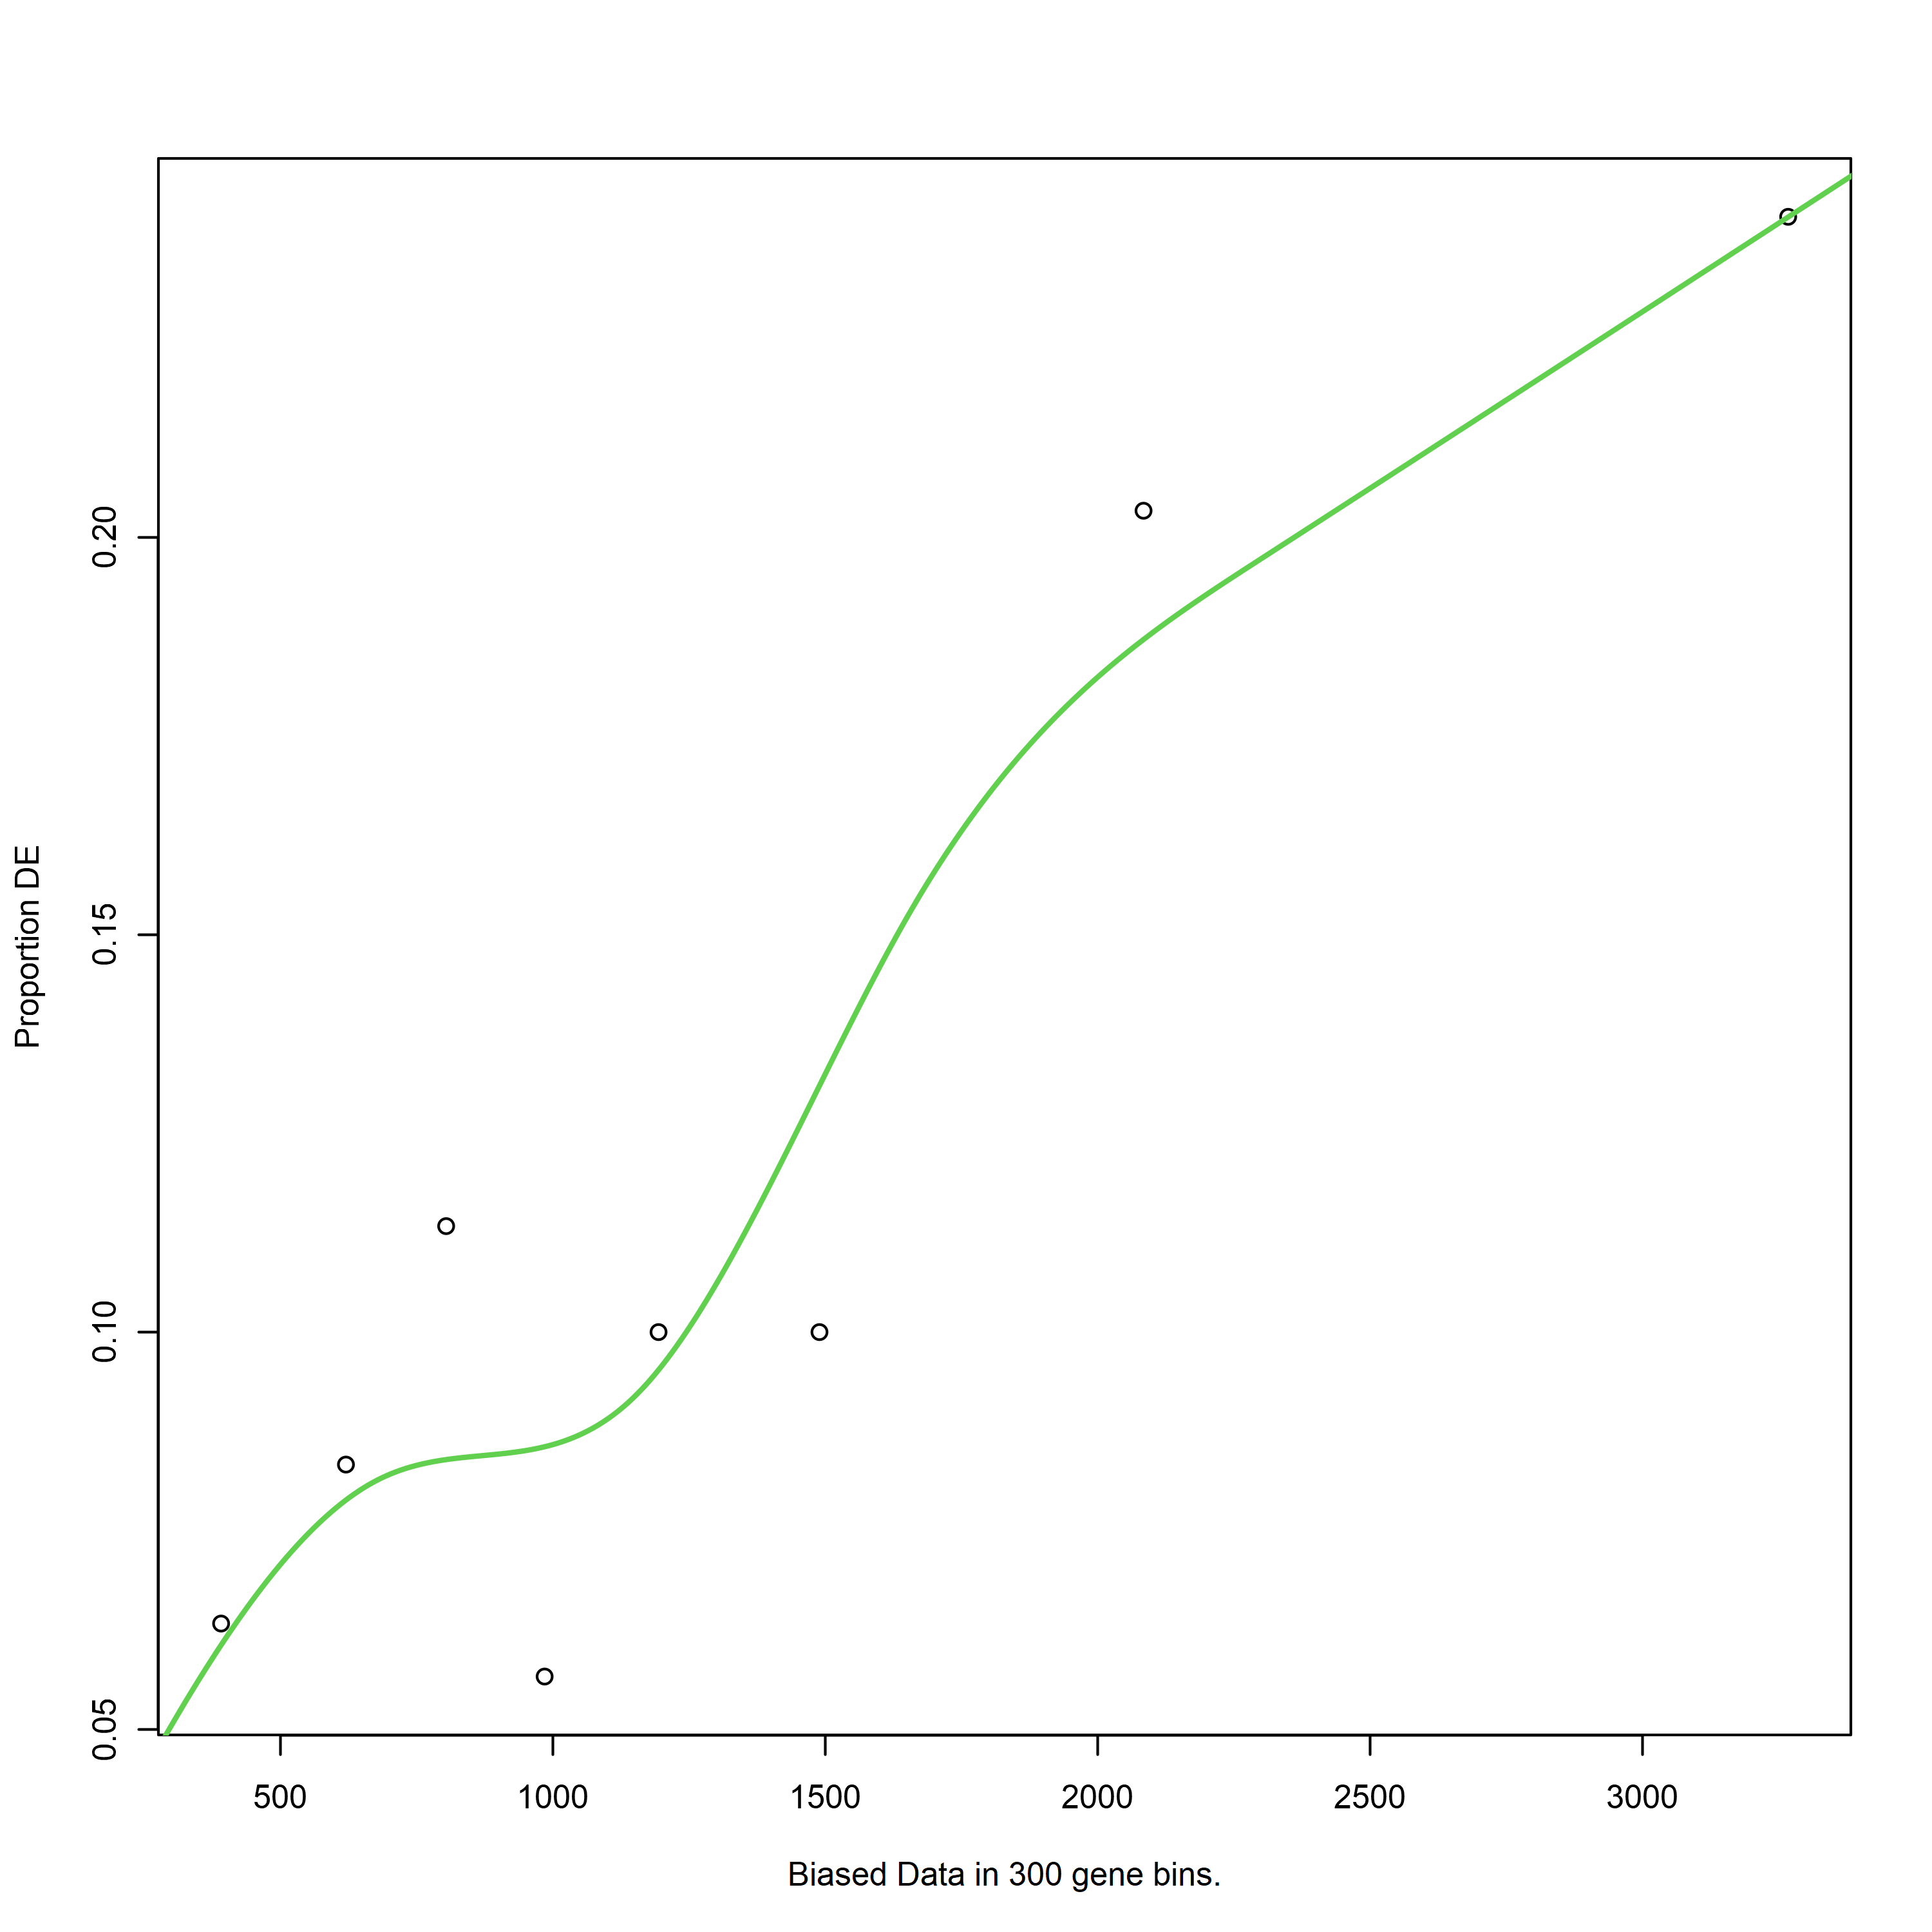

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA2_prot"
[1] "sub"
[1] "is_de"


Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



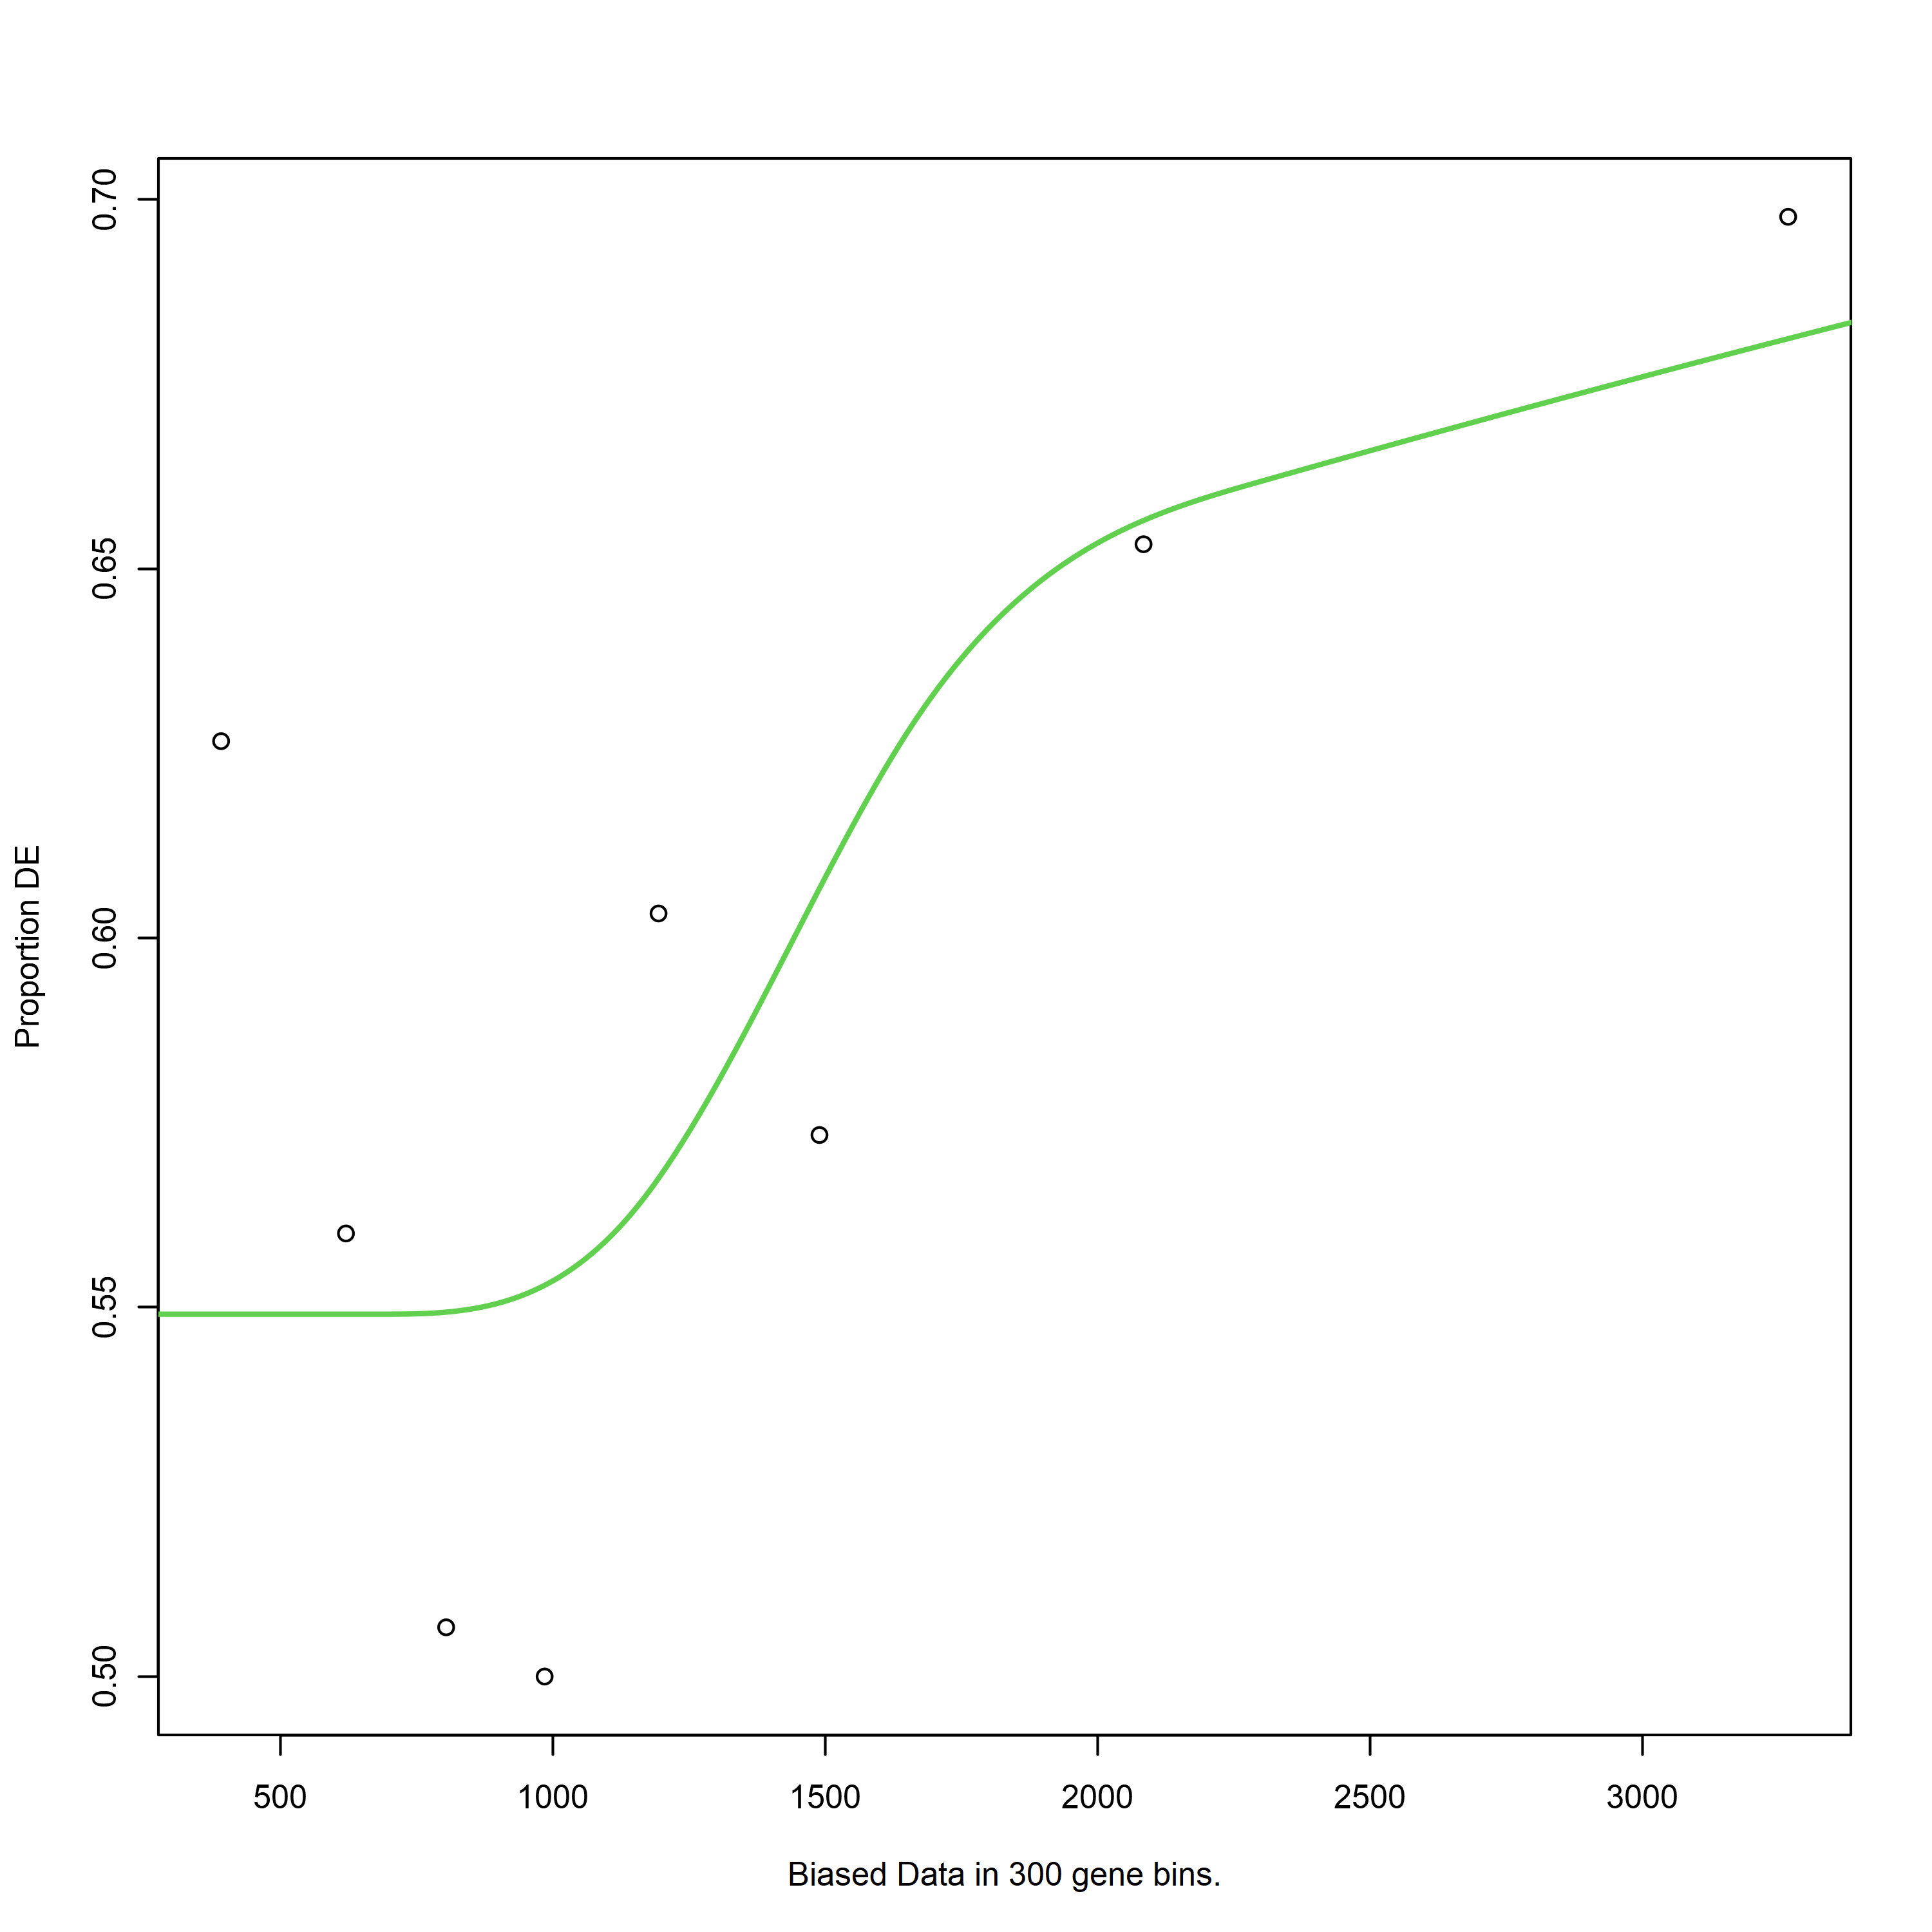

[1] "A3vsA2_prot"
[1] "path"
[1] "is_de"


Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A5vsA3_prot"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A5vsA3_prot"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


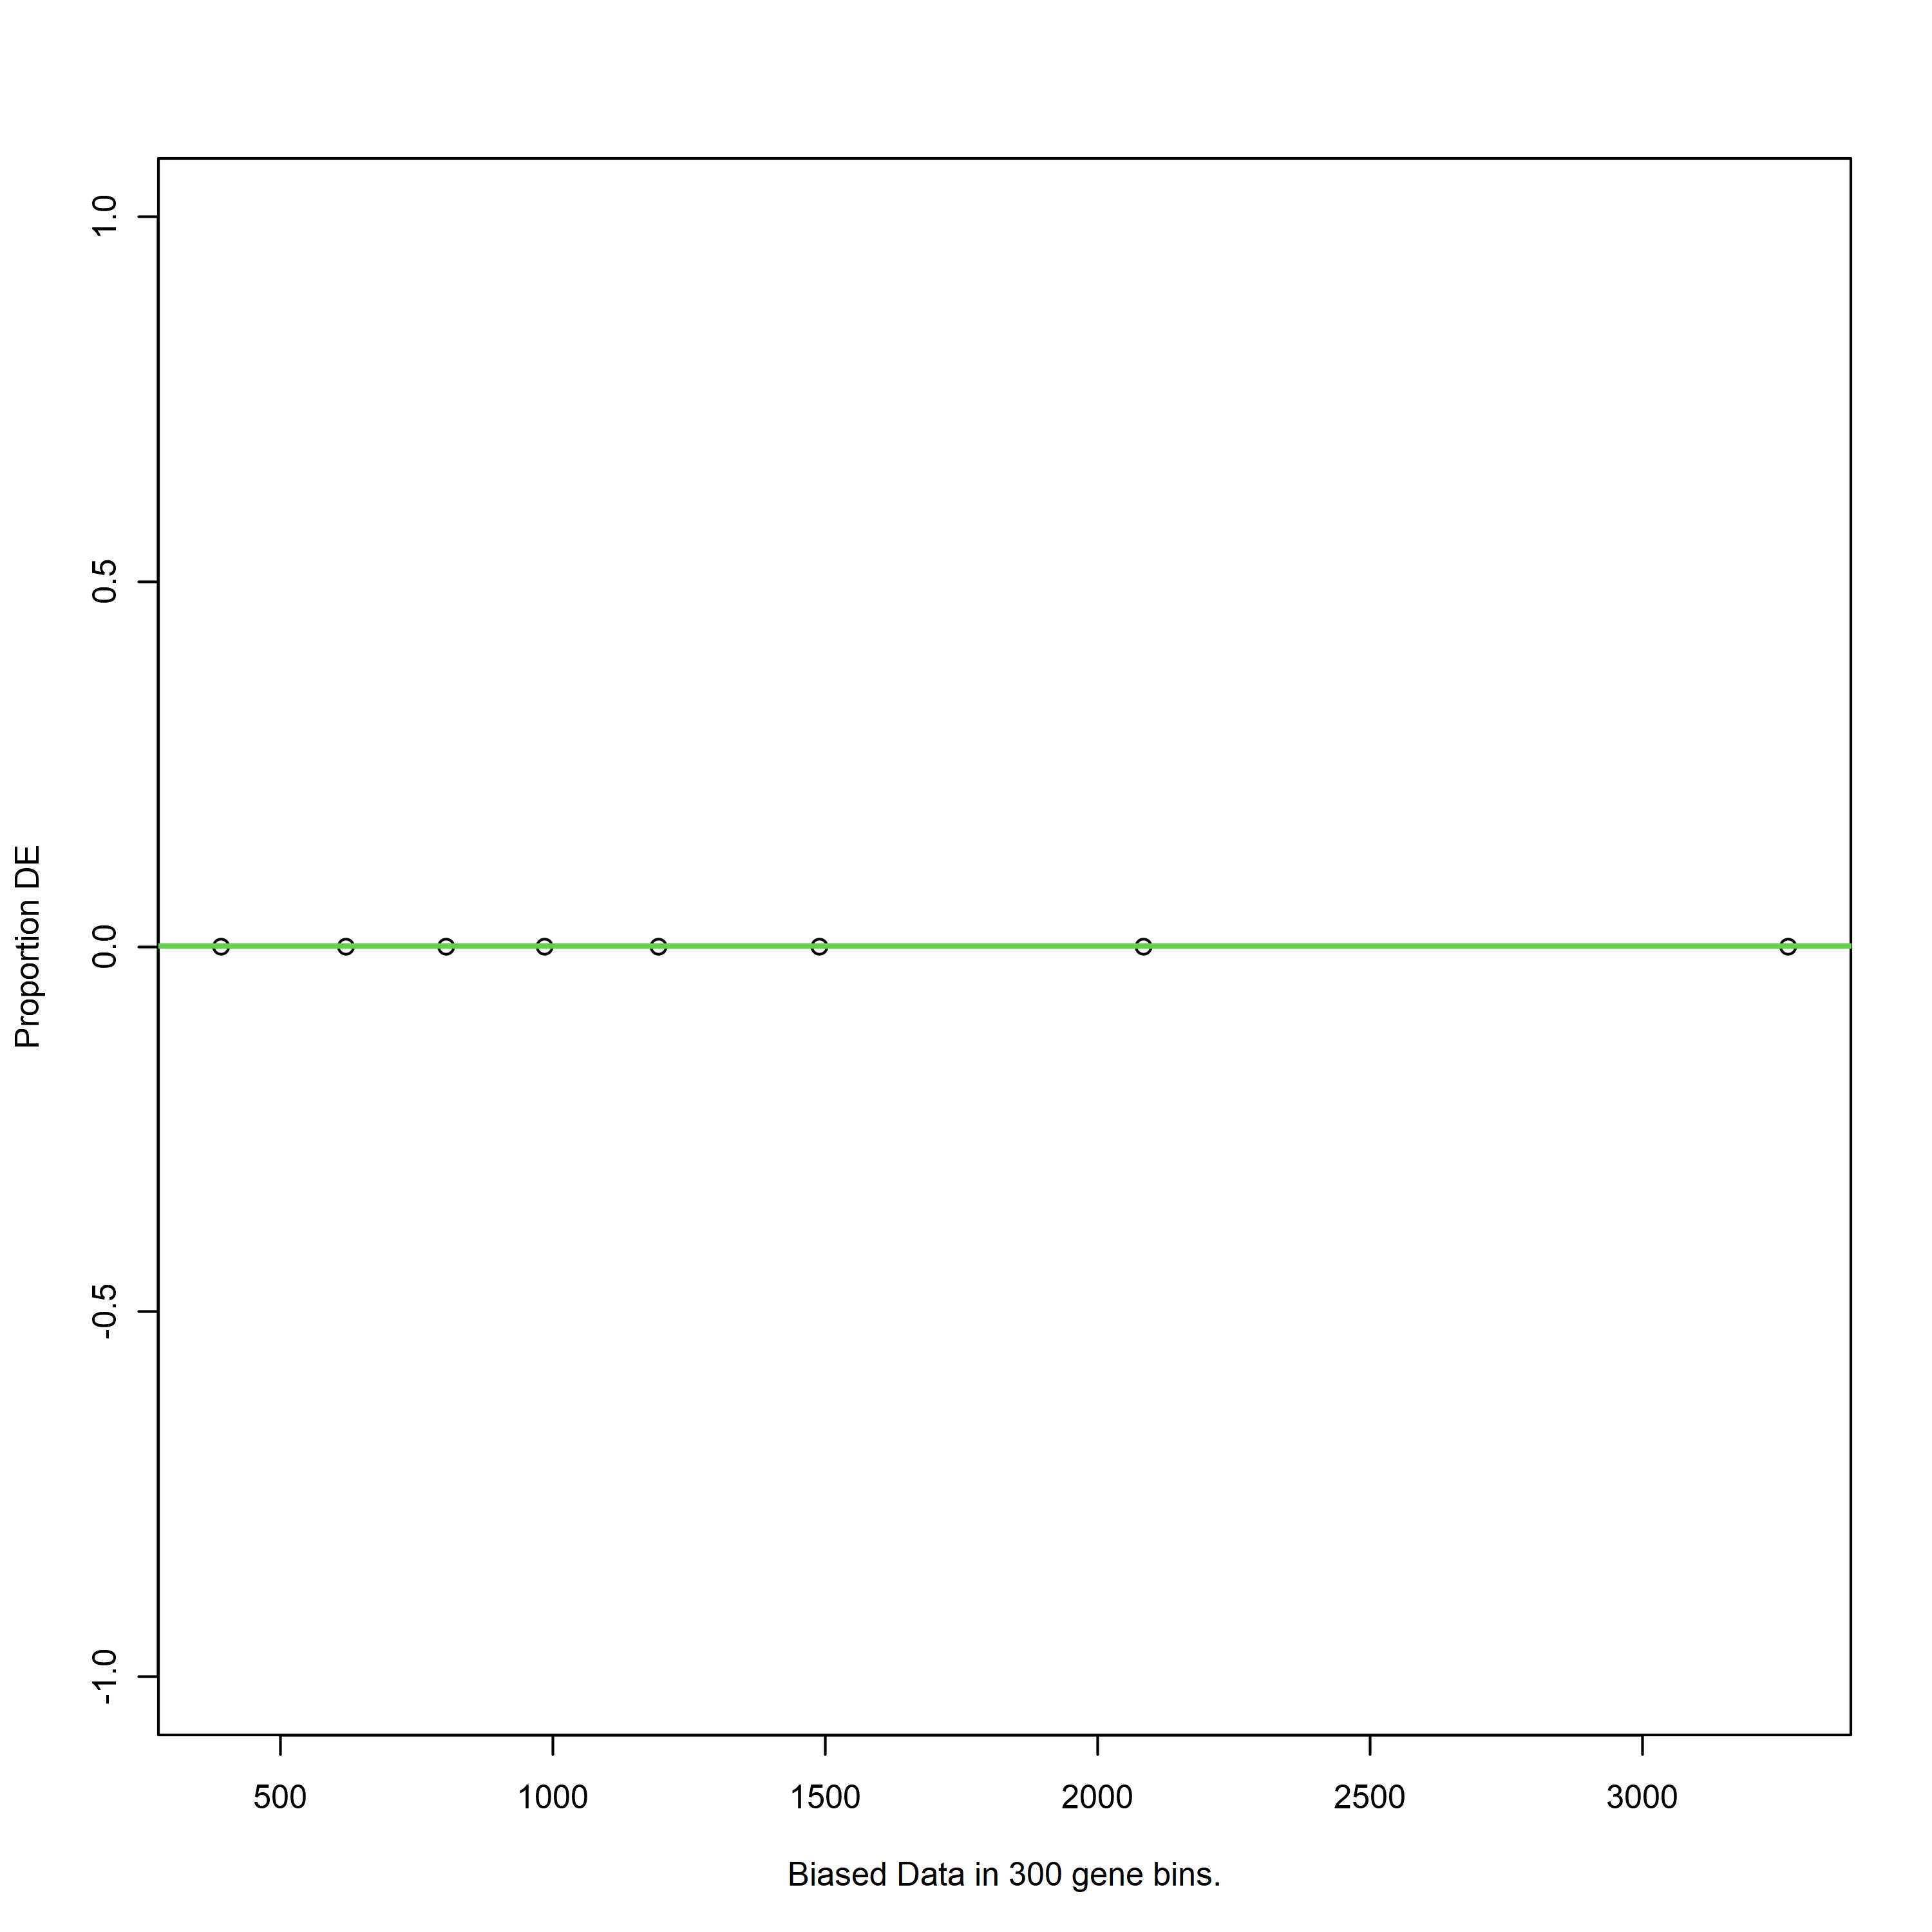

Using manually entered categories.

For 749 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


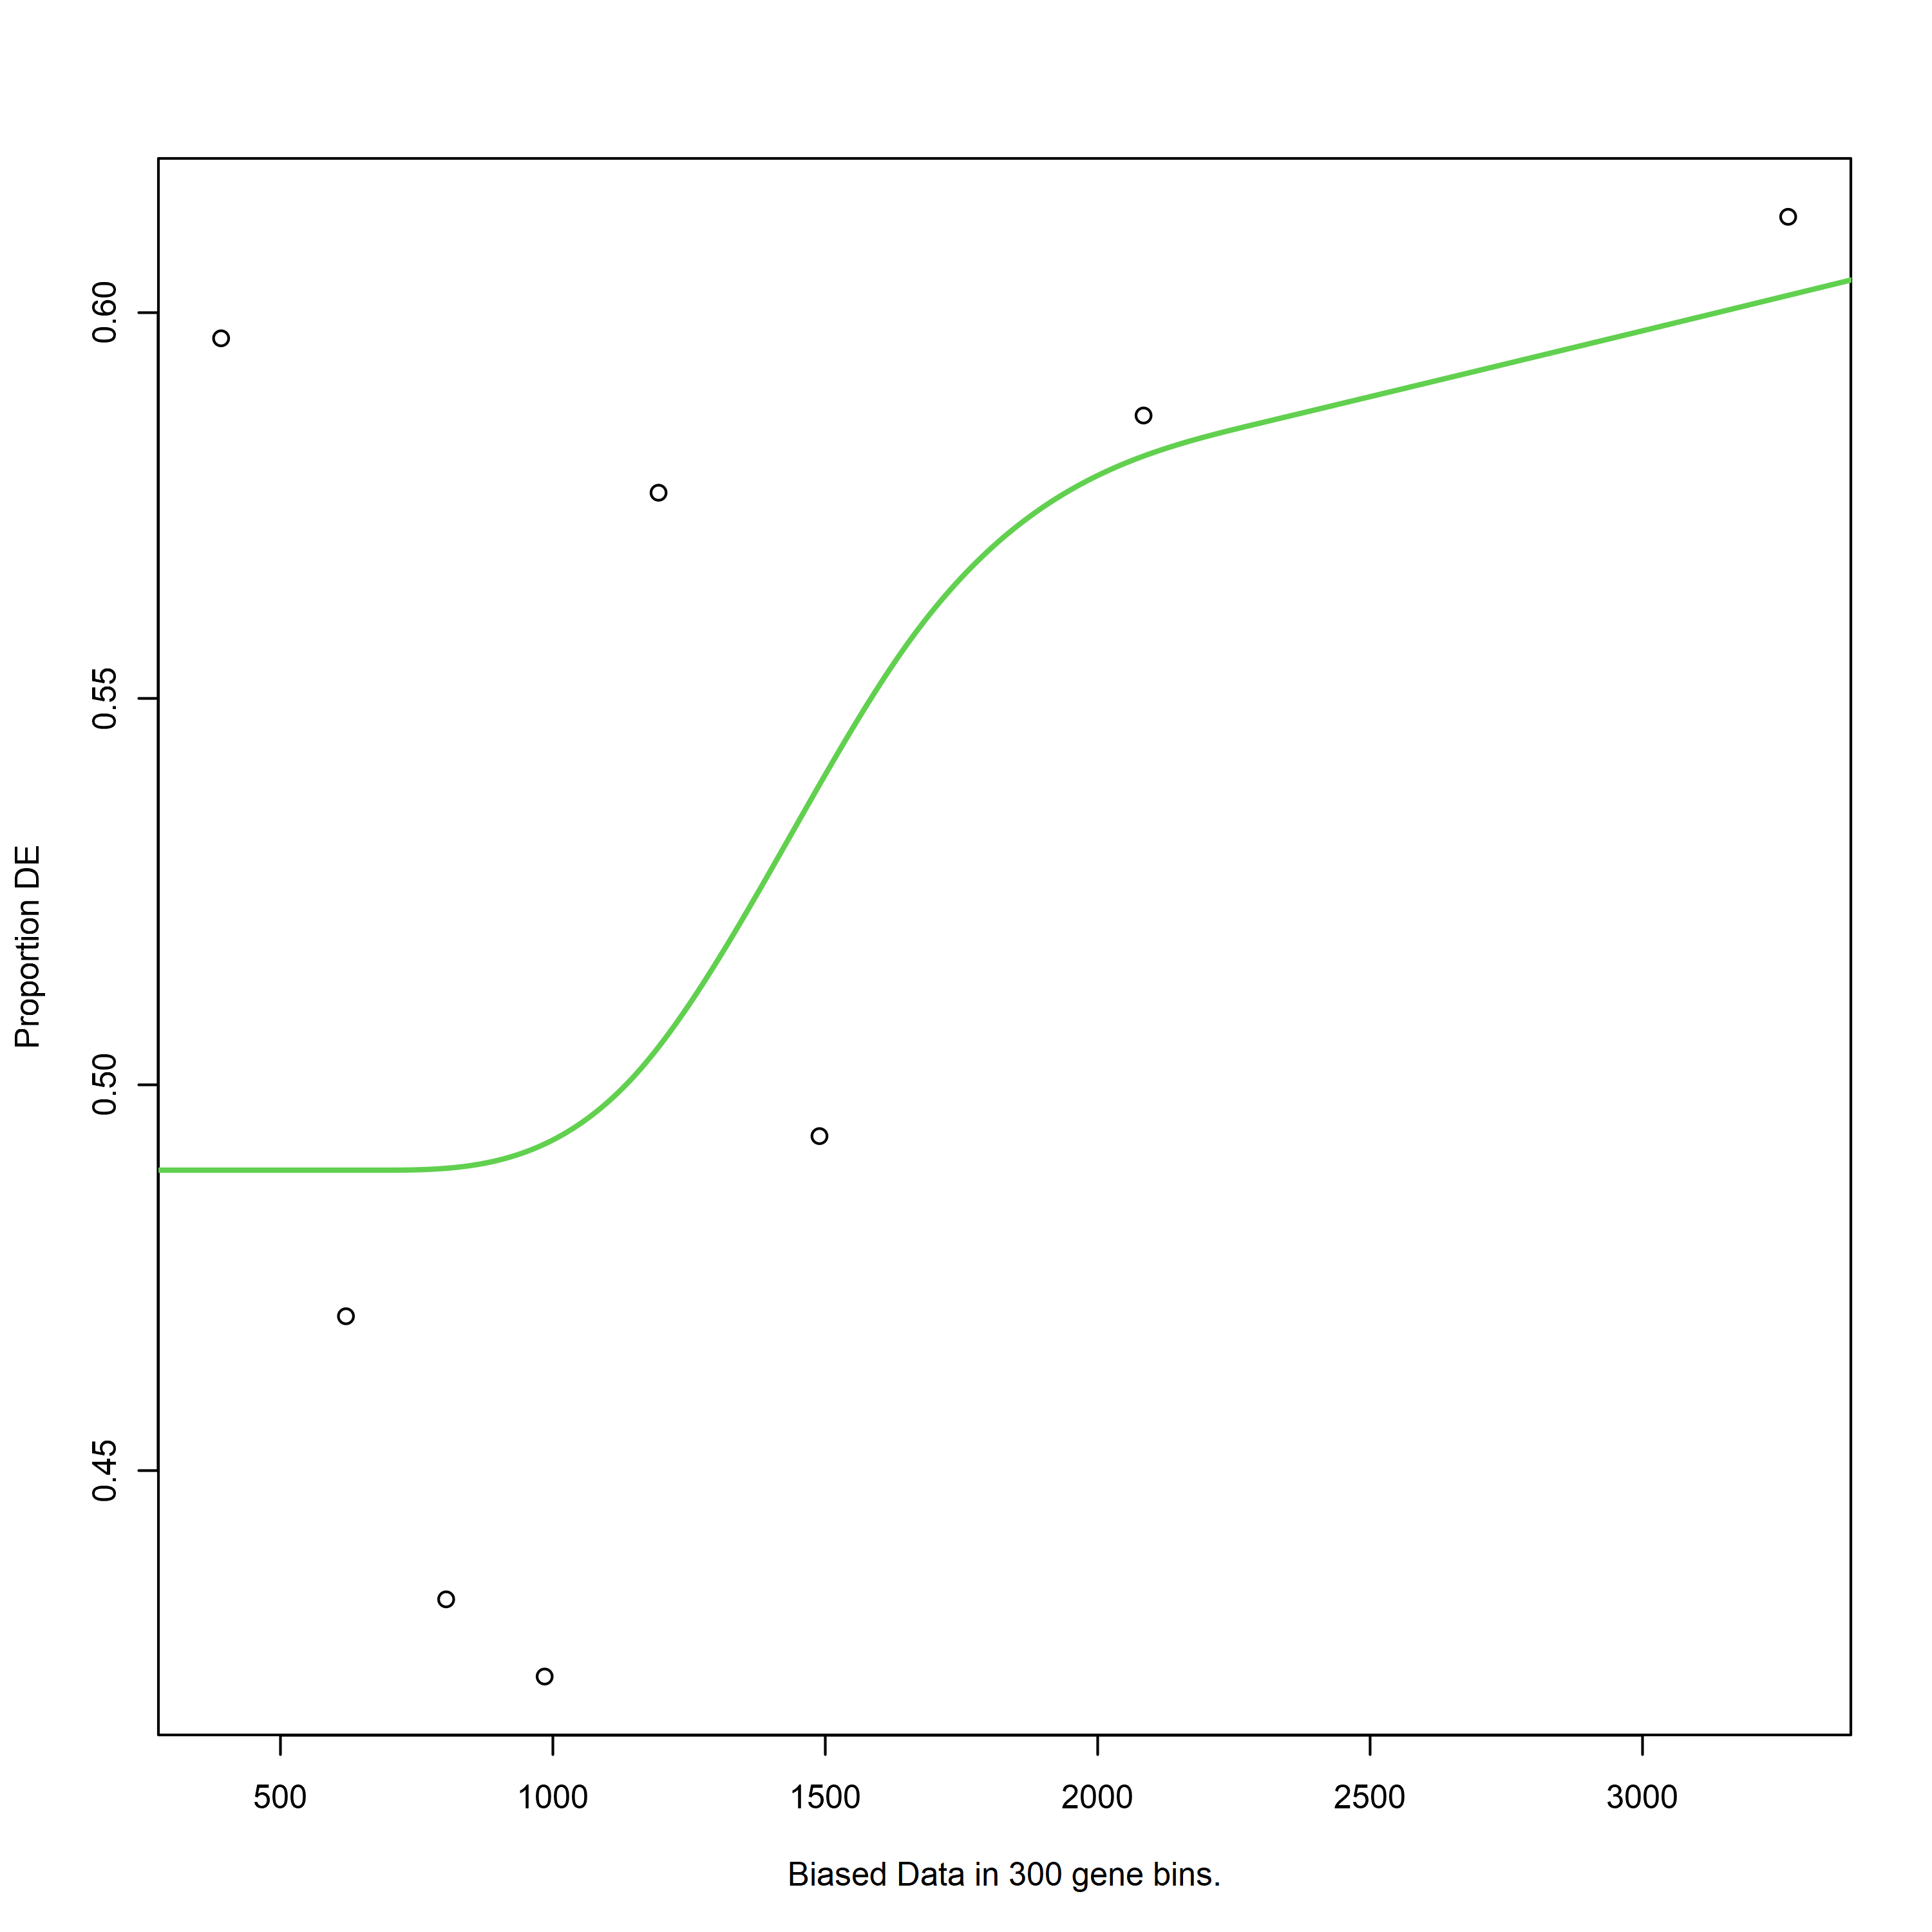

Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA2_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA2_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


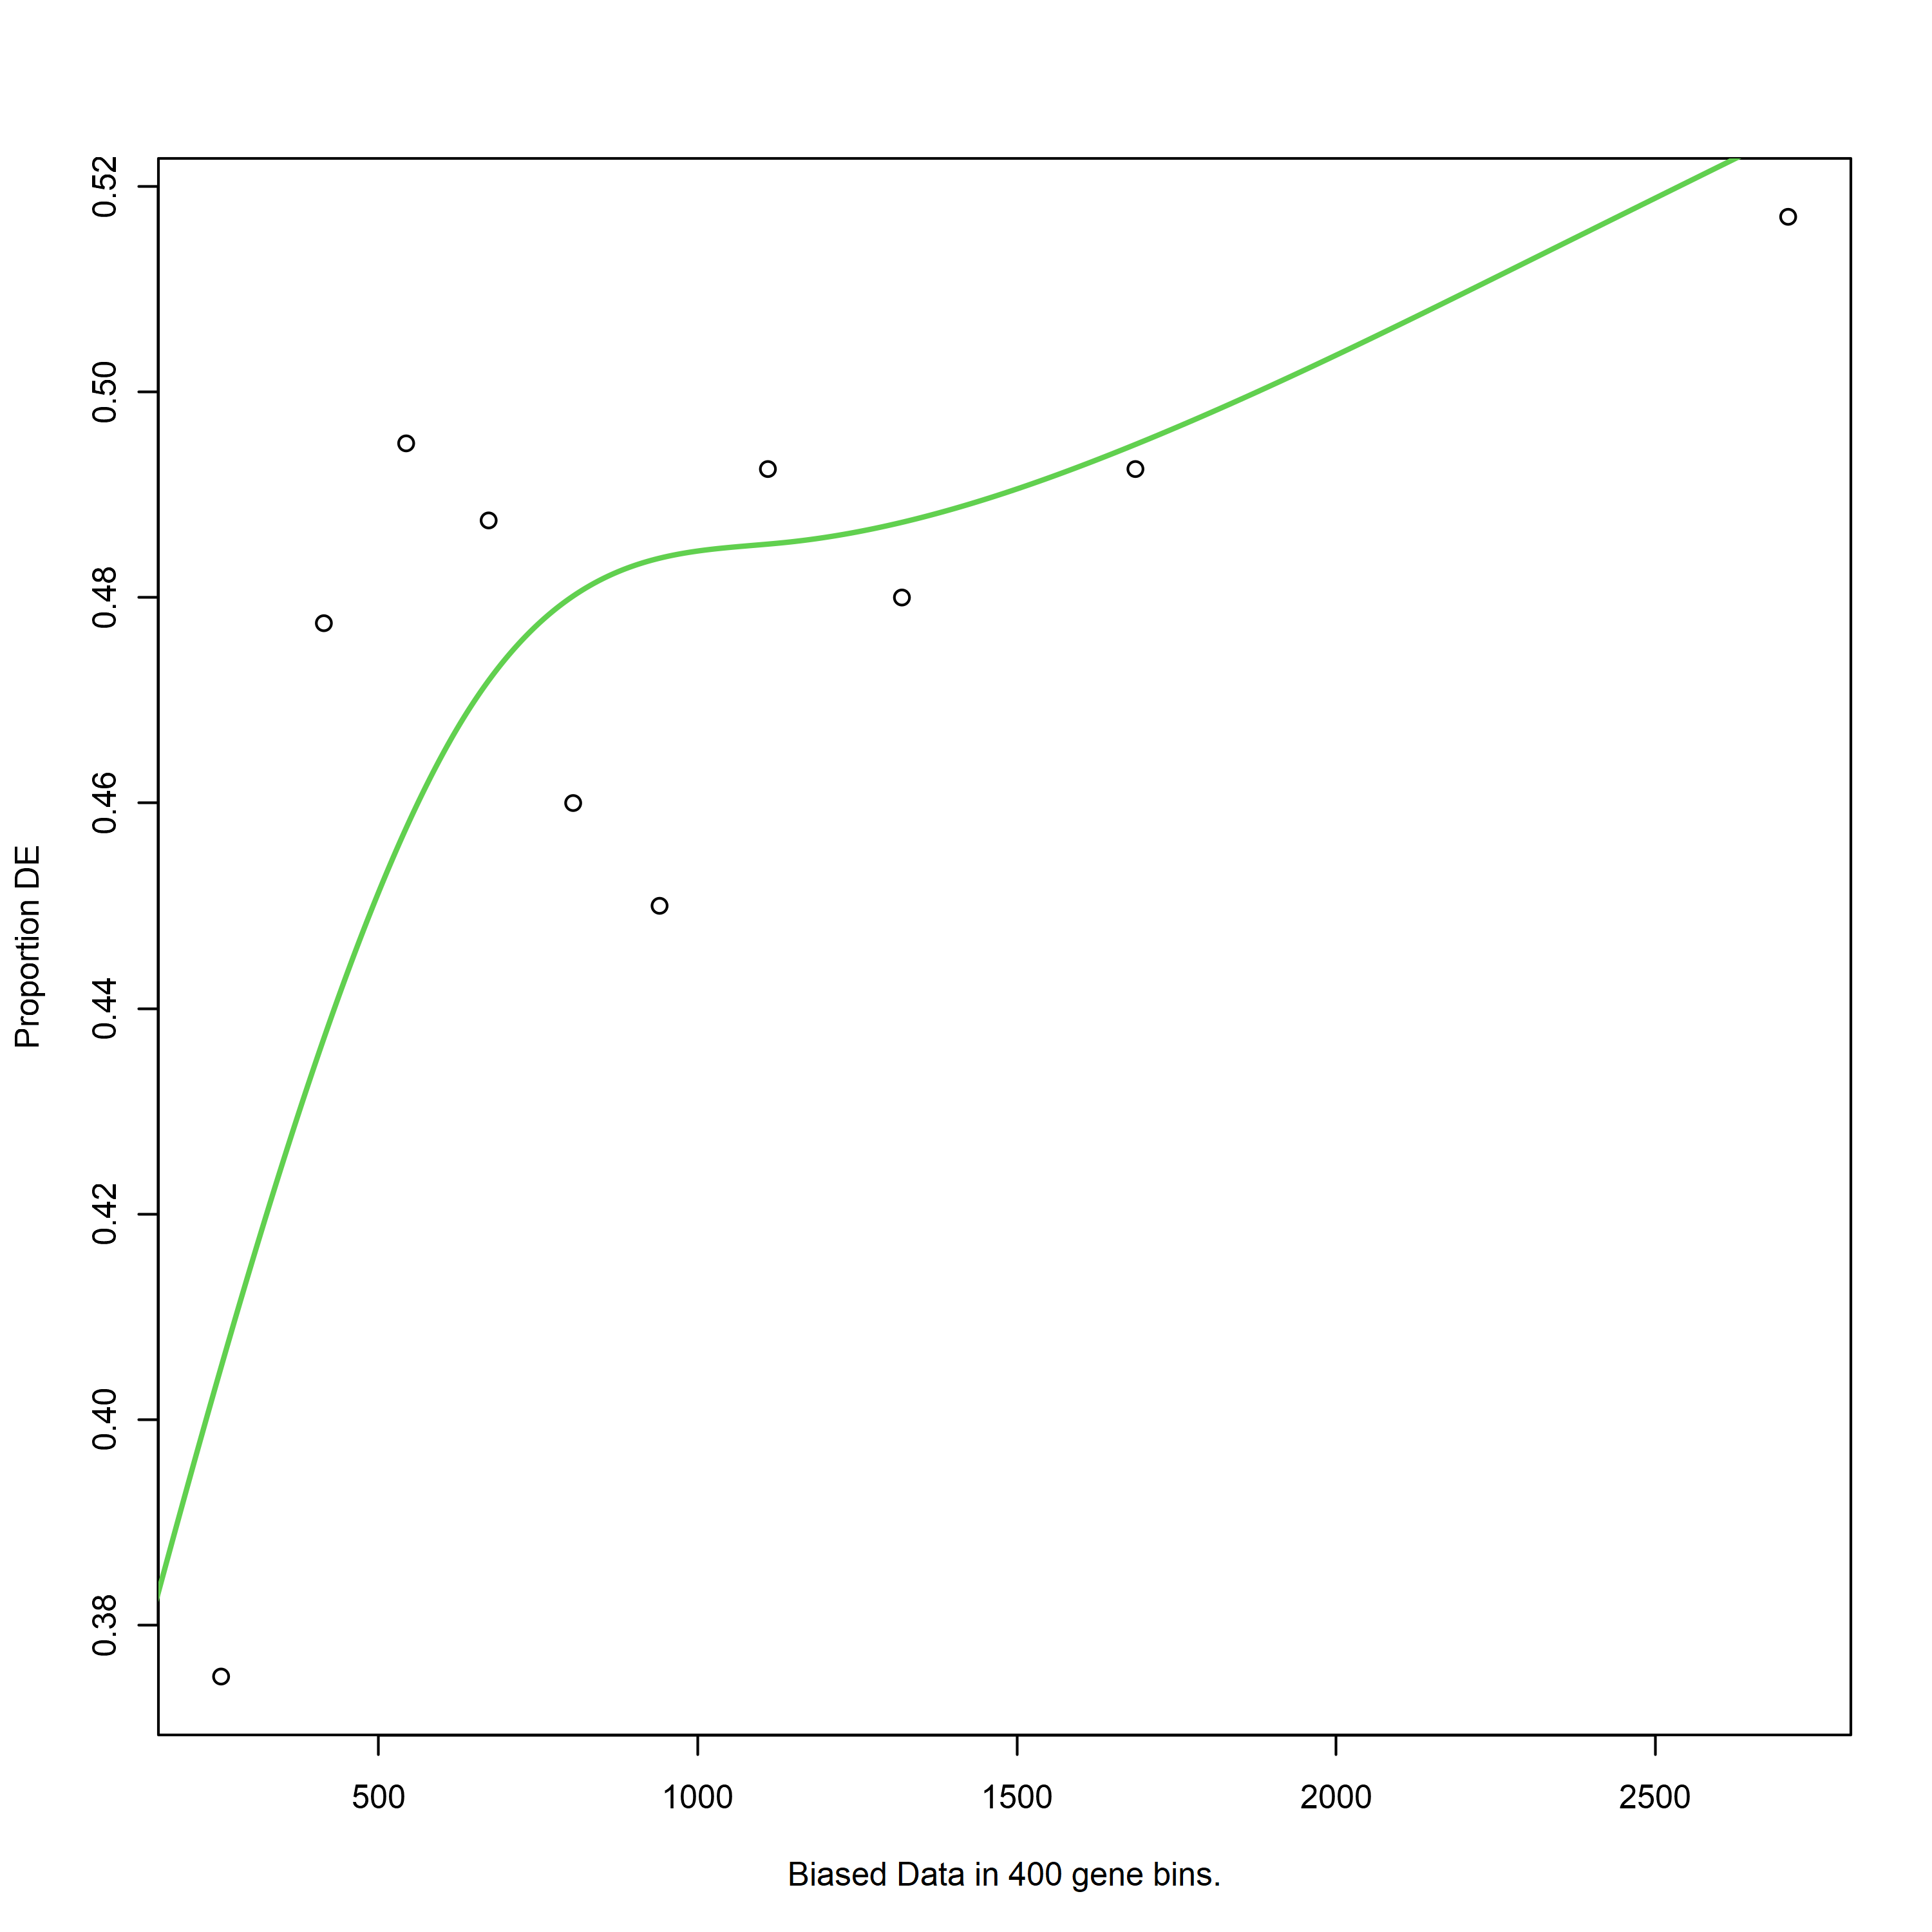

Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA3_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsA3_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


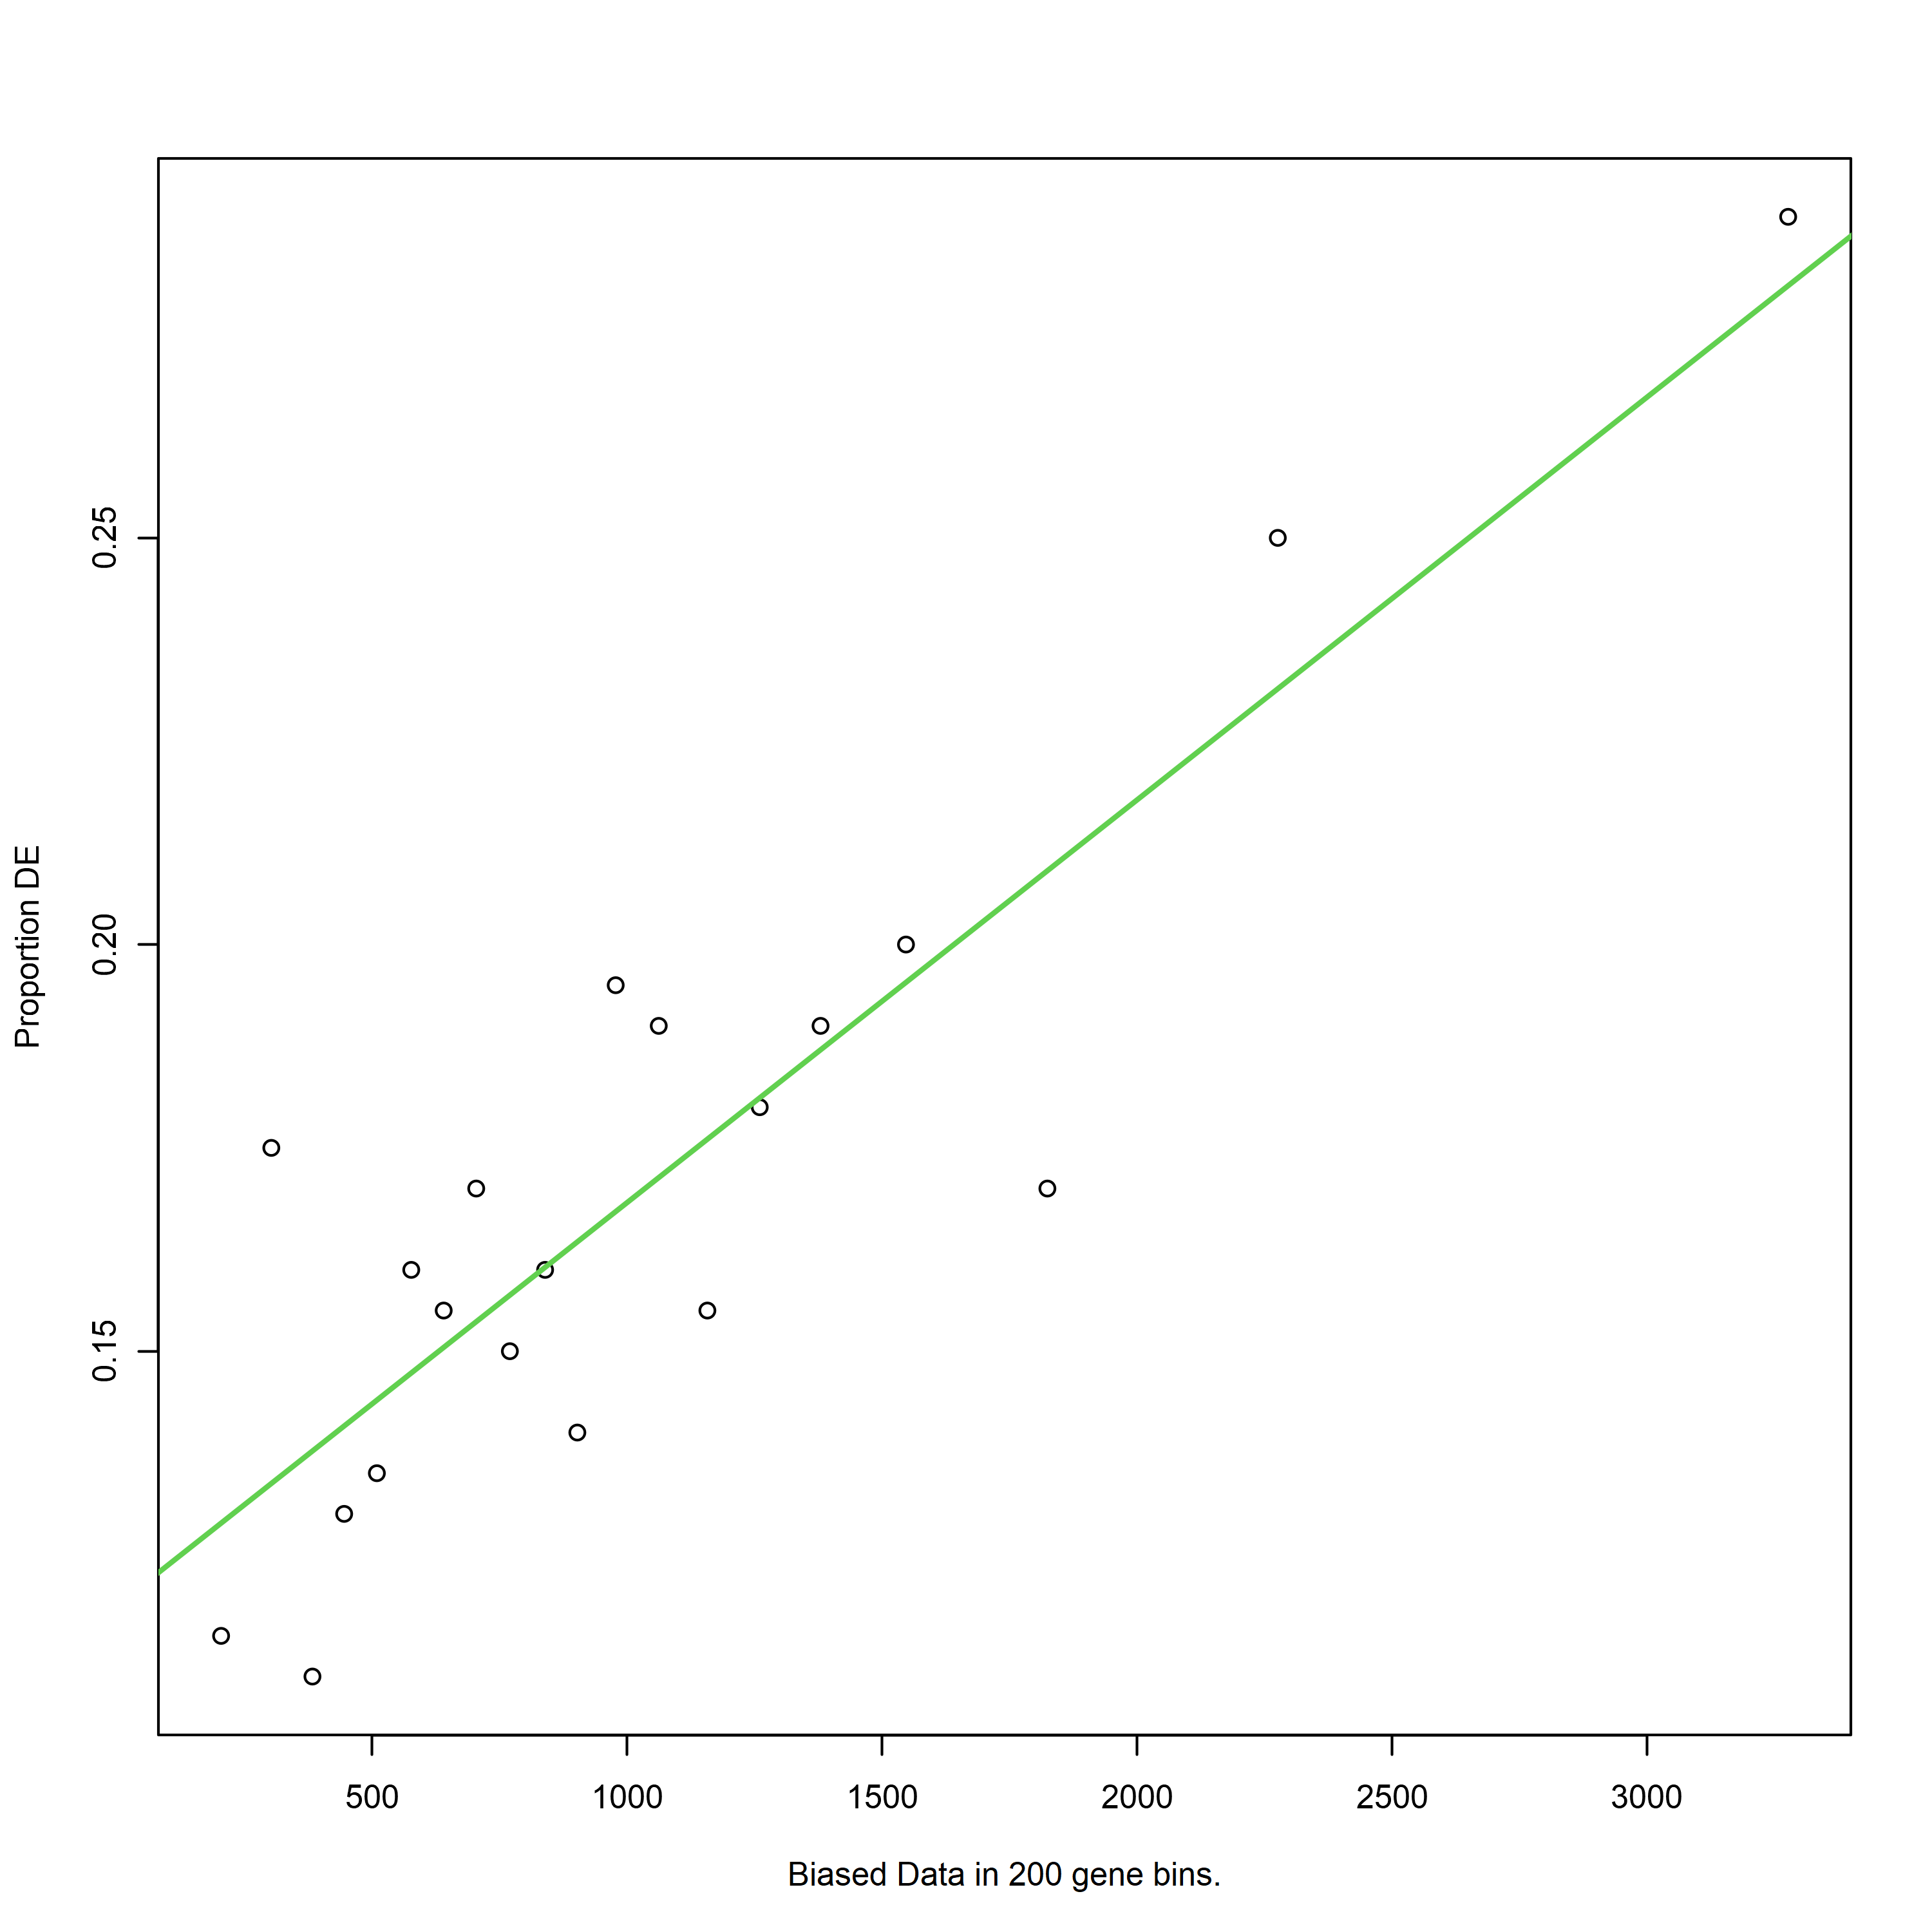

Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


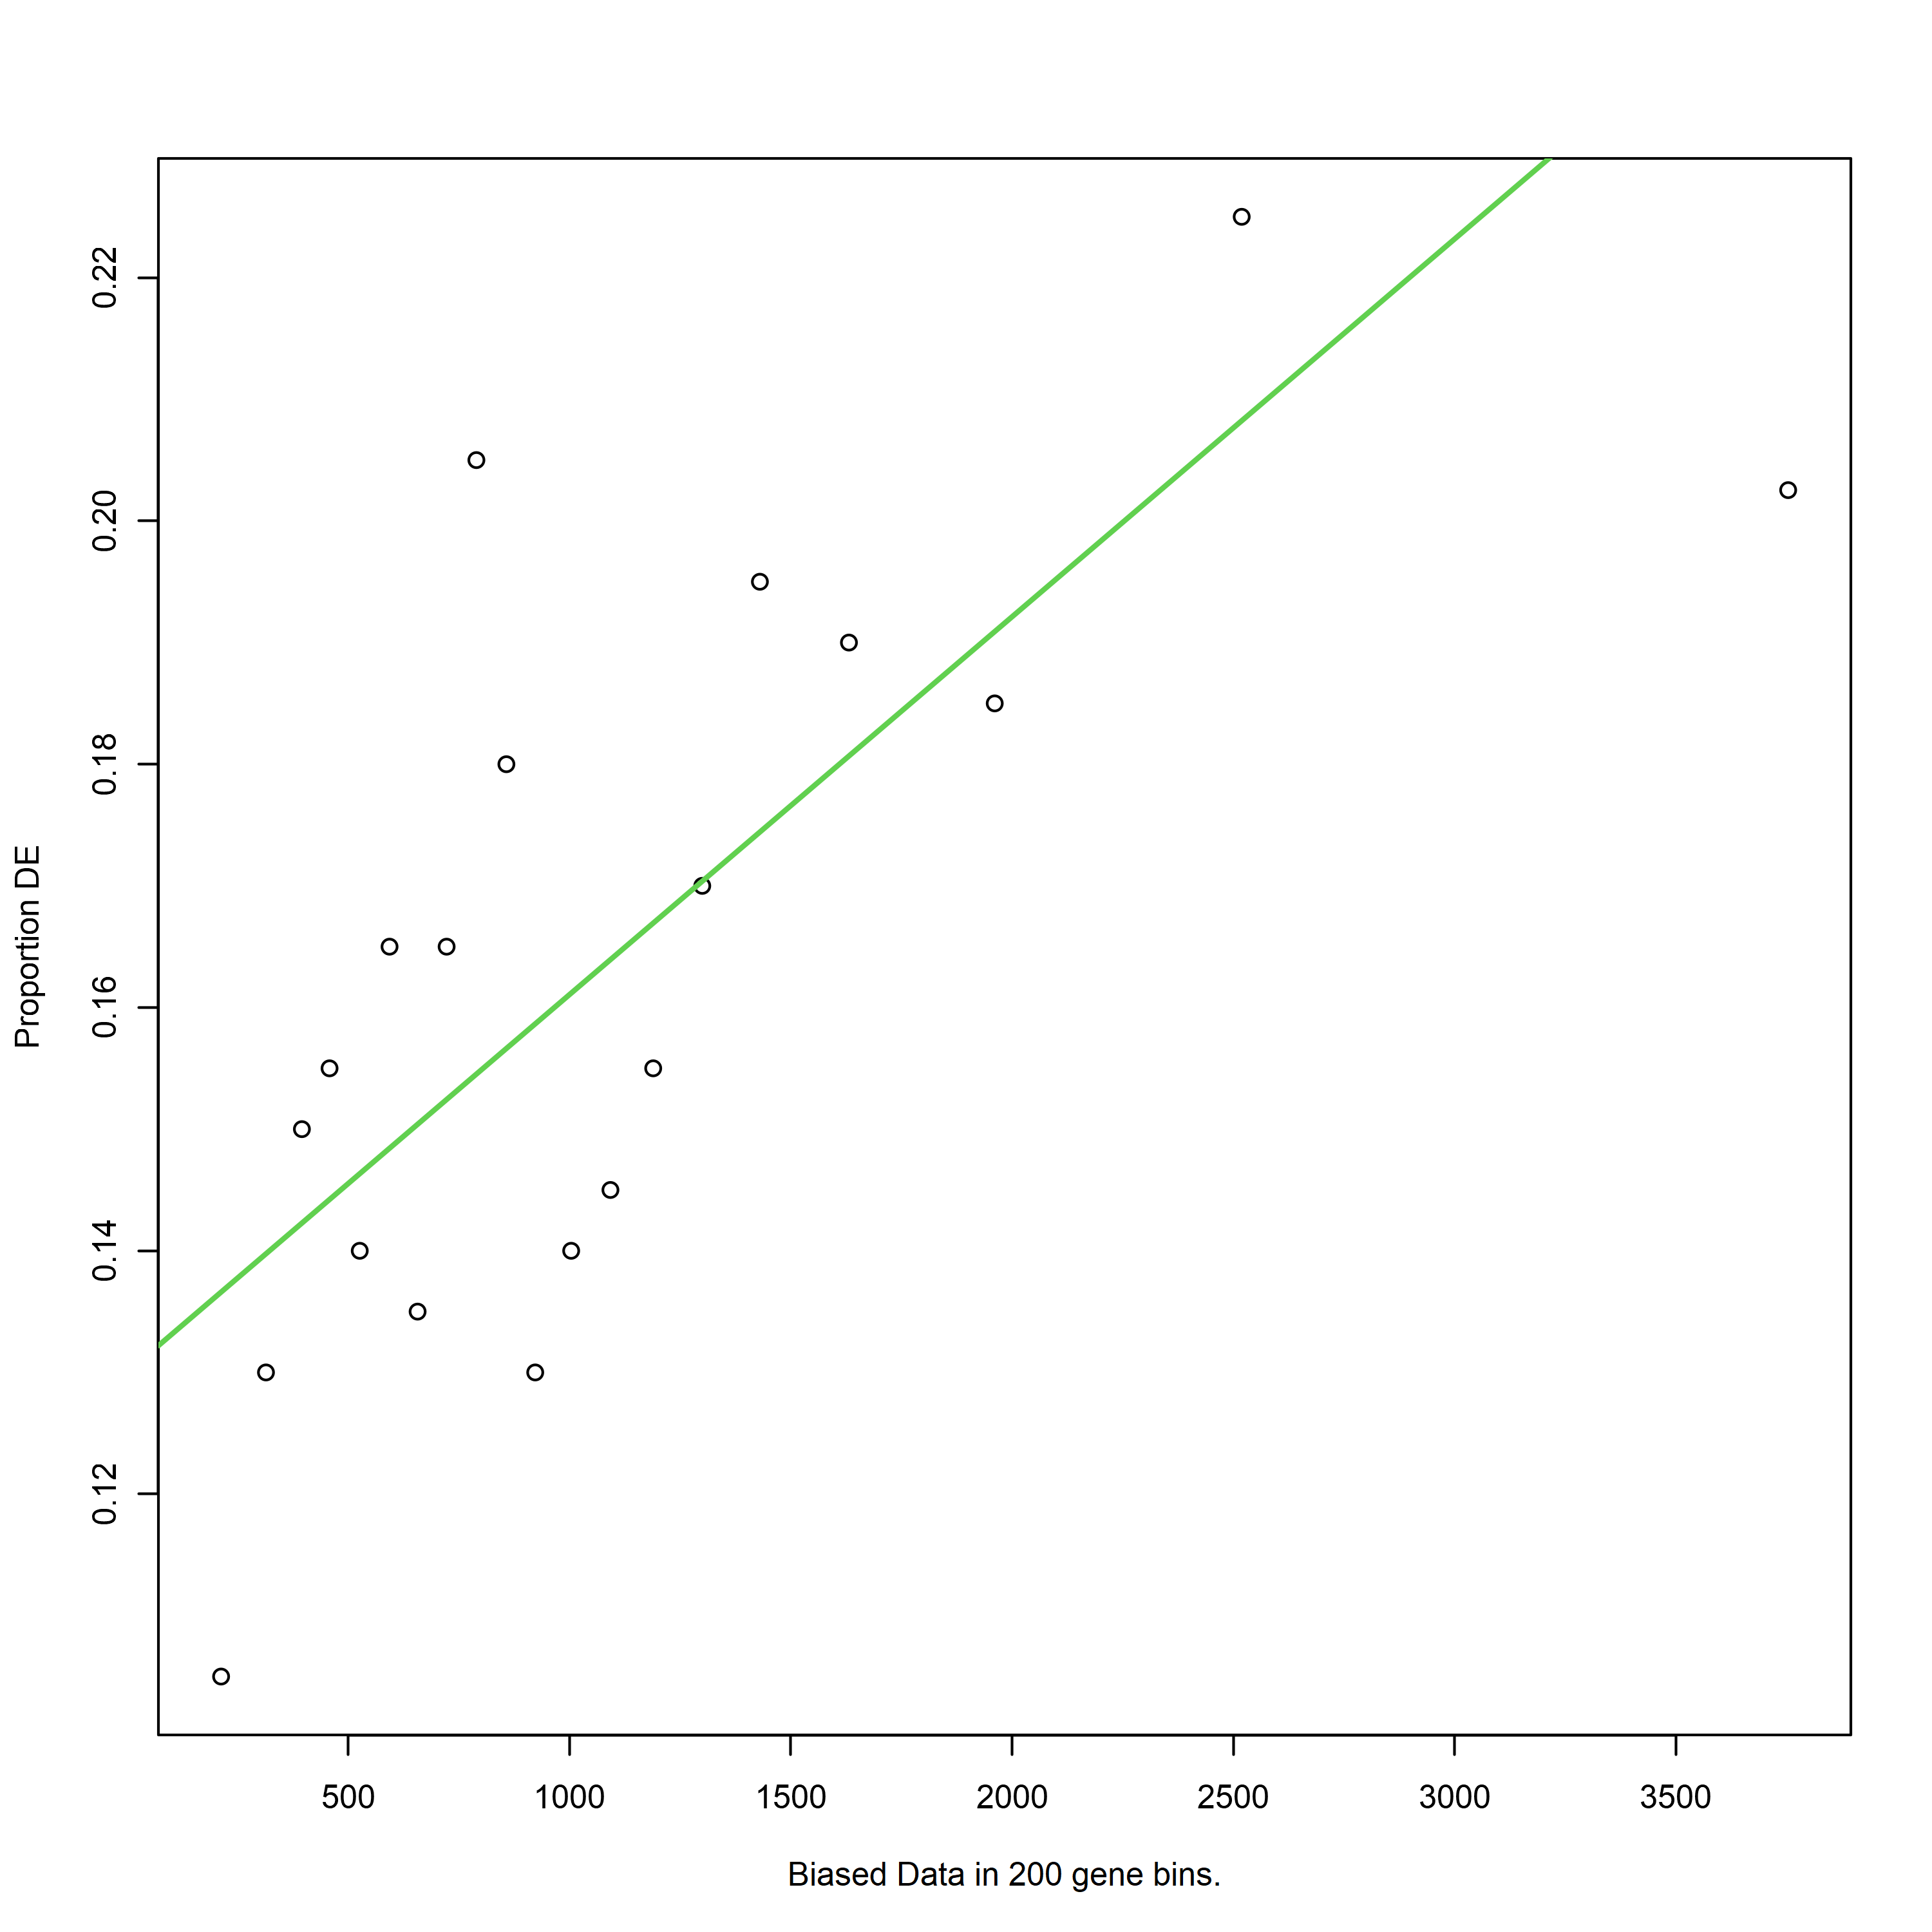

Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC2_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC2_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


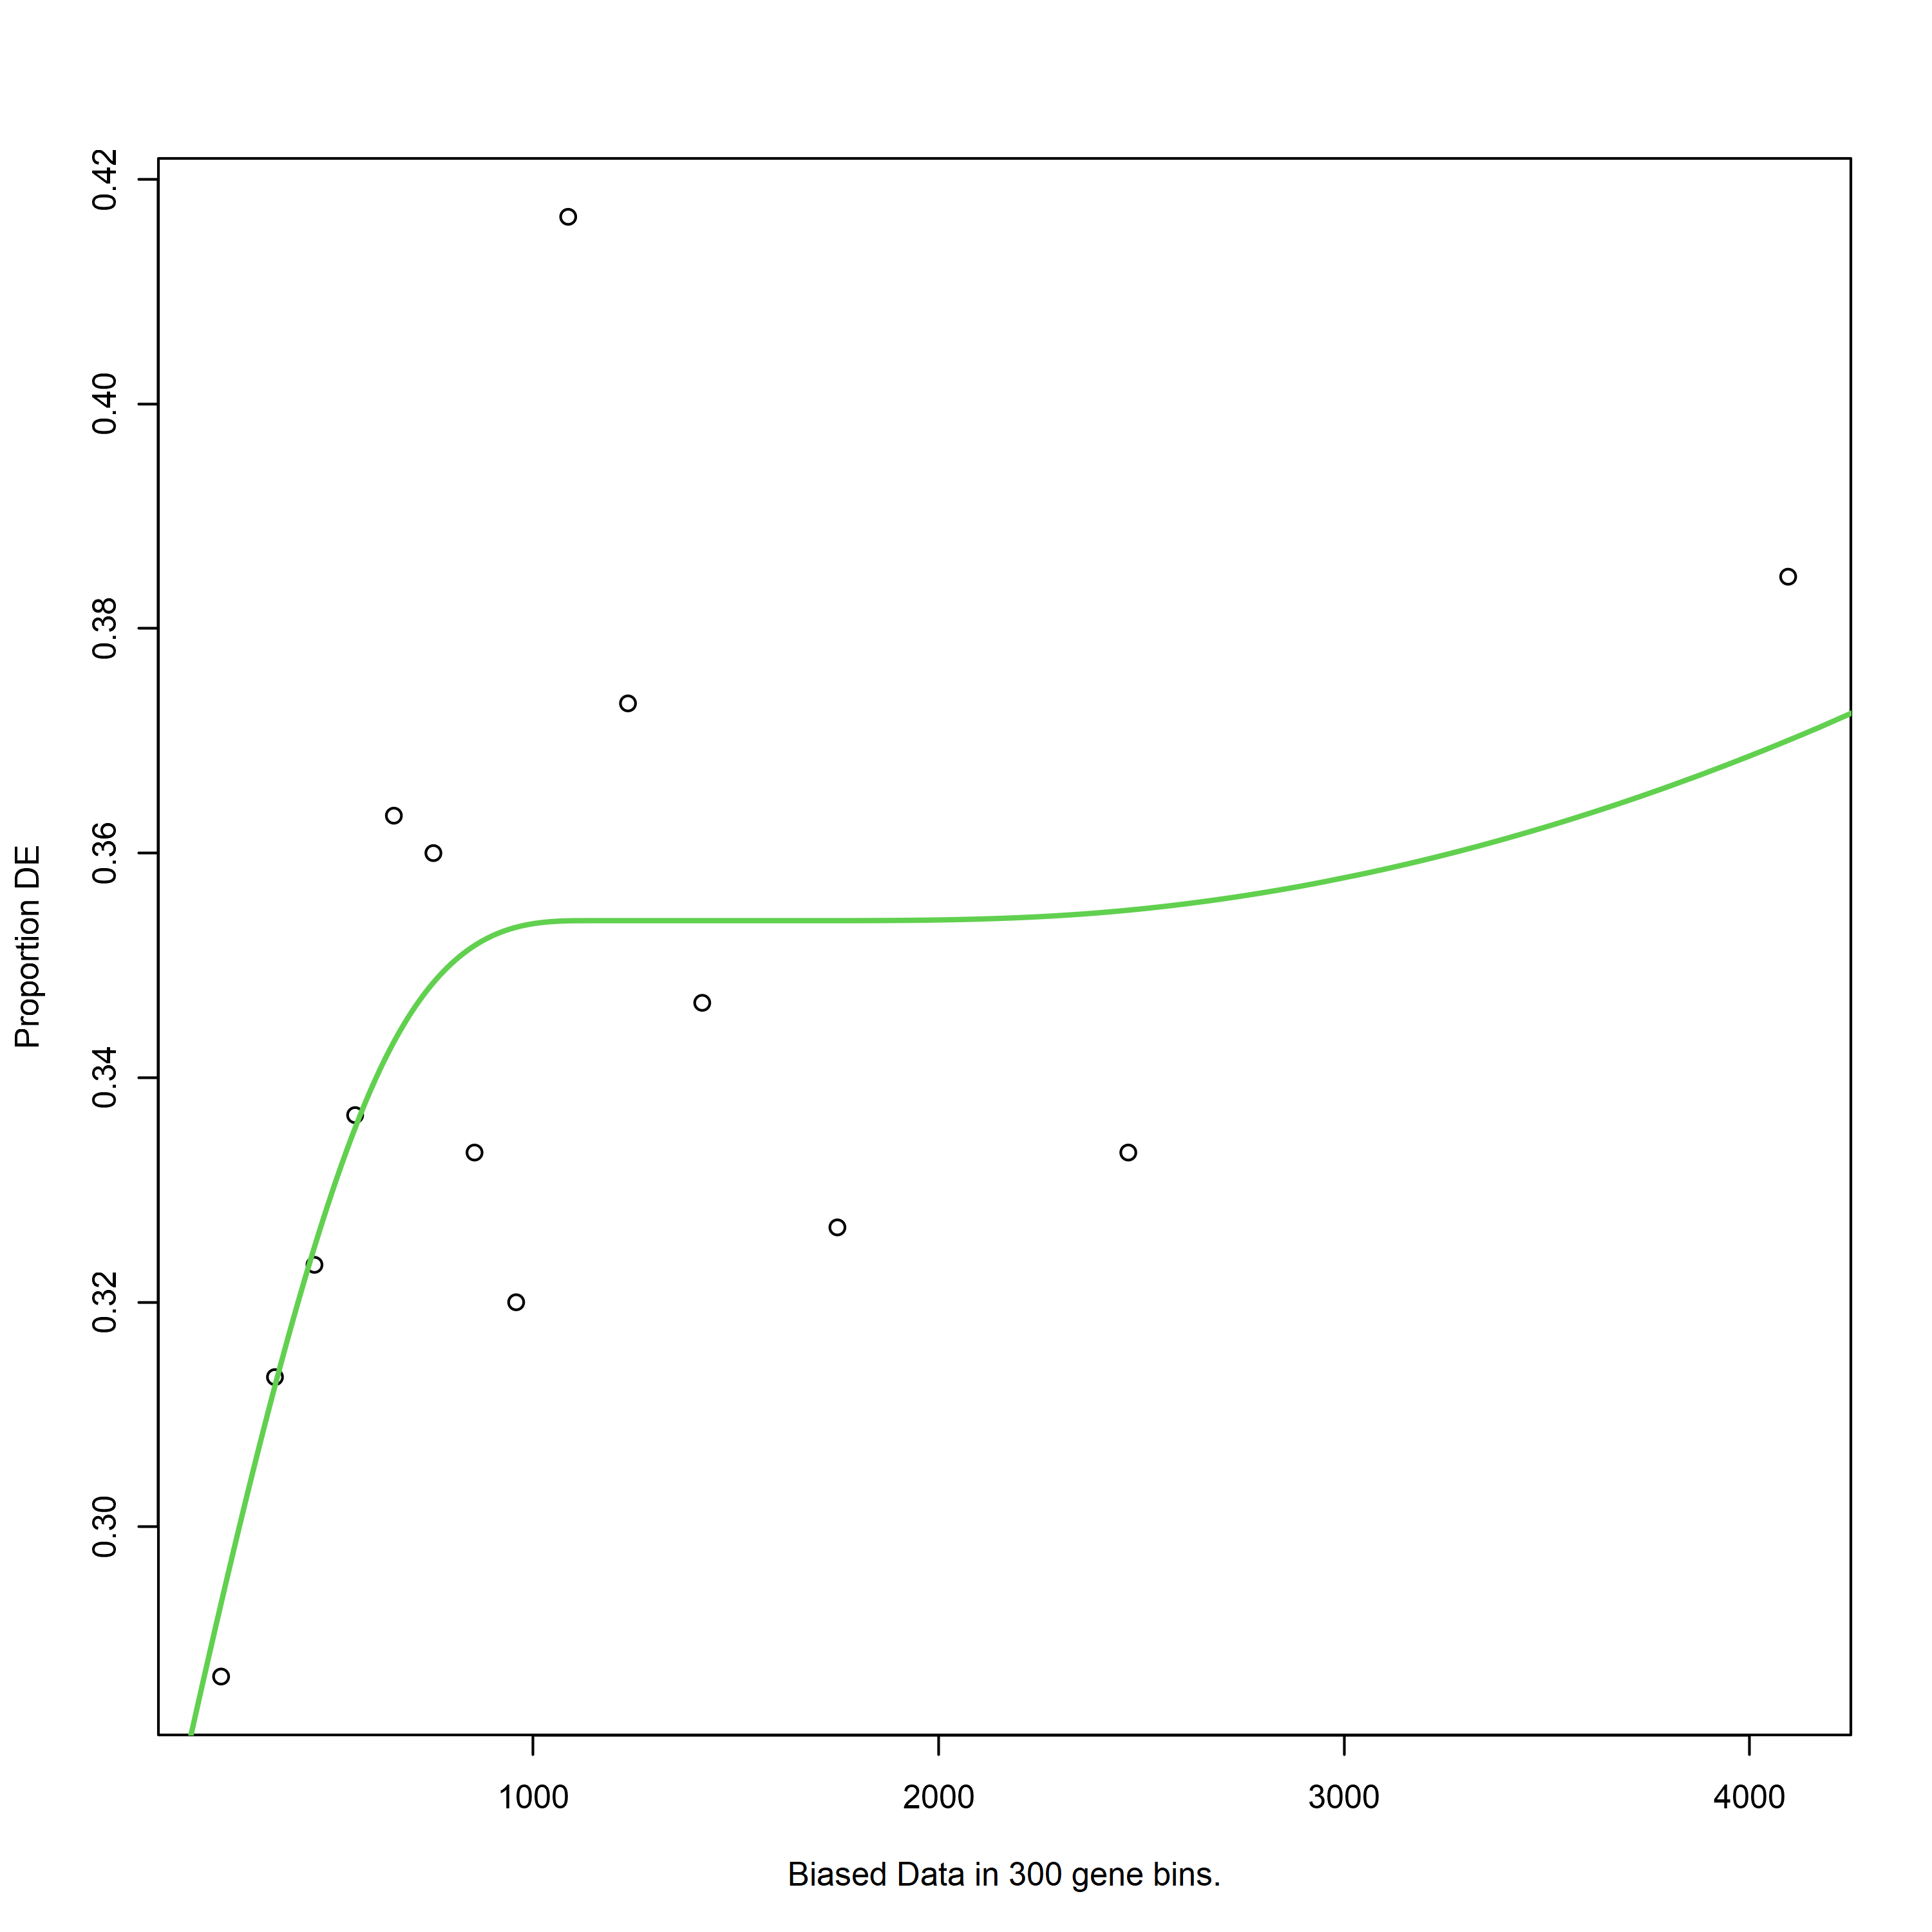

Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC3_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "LATEvsC3_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


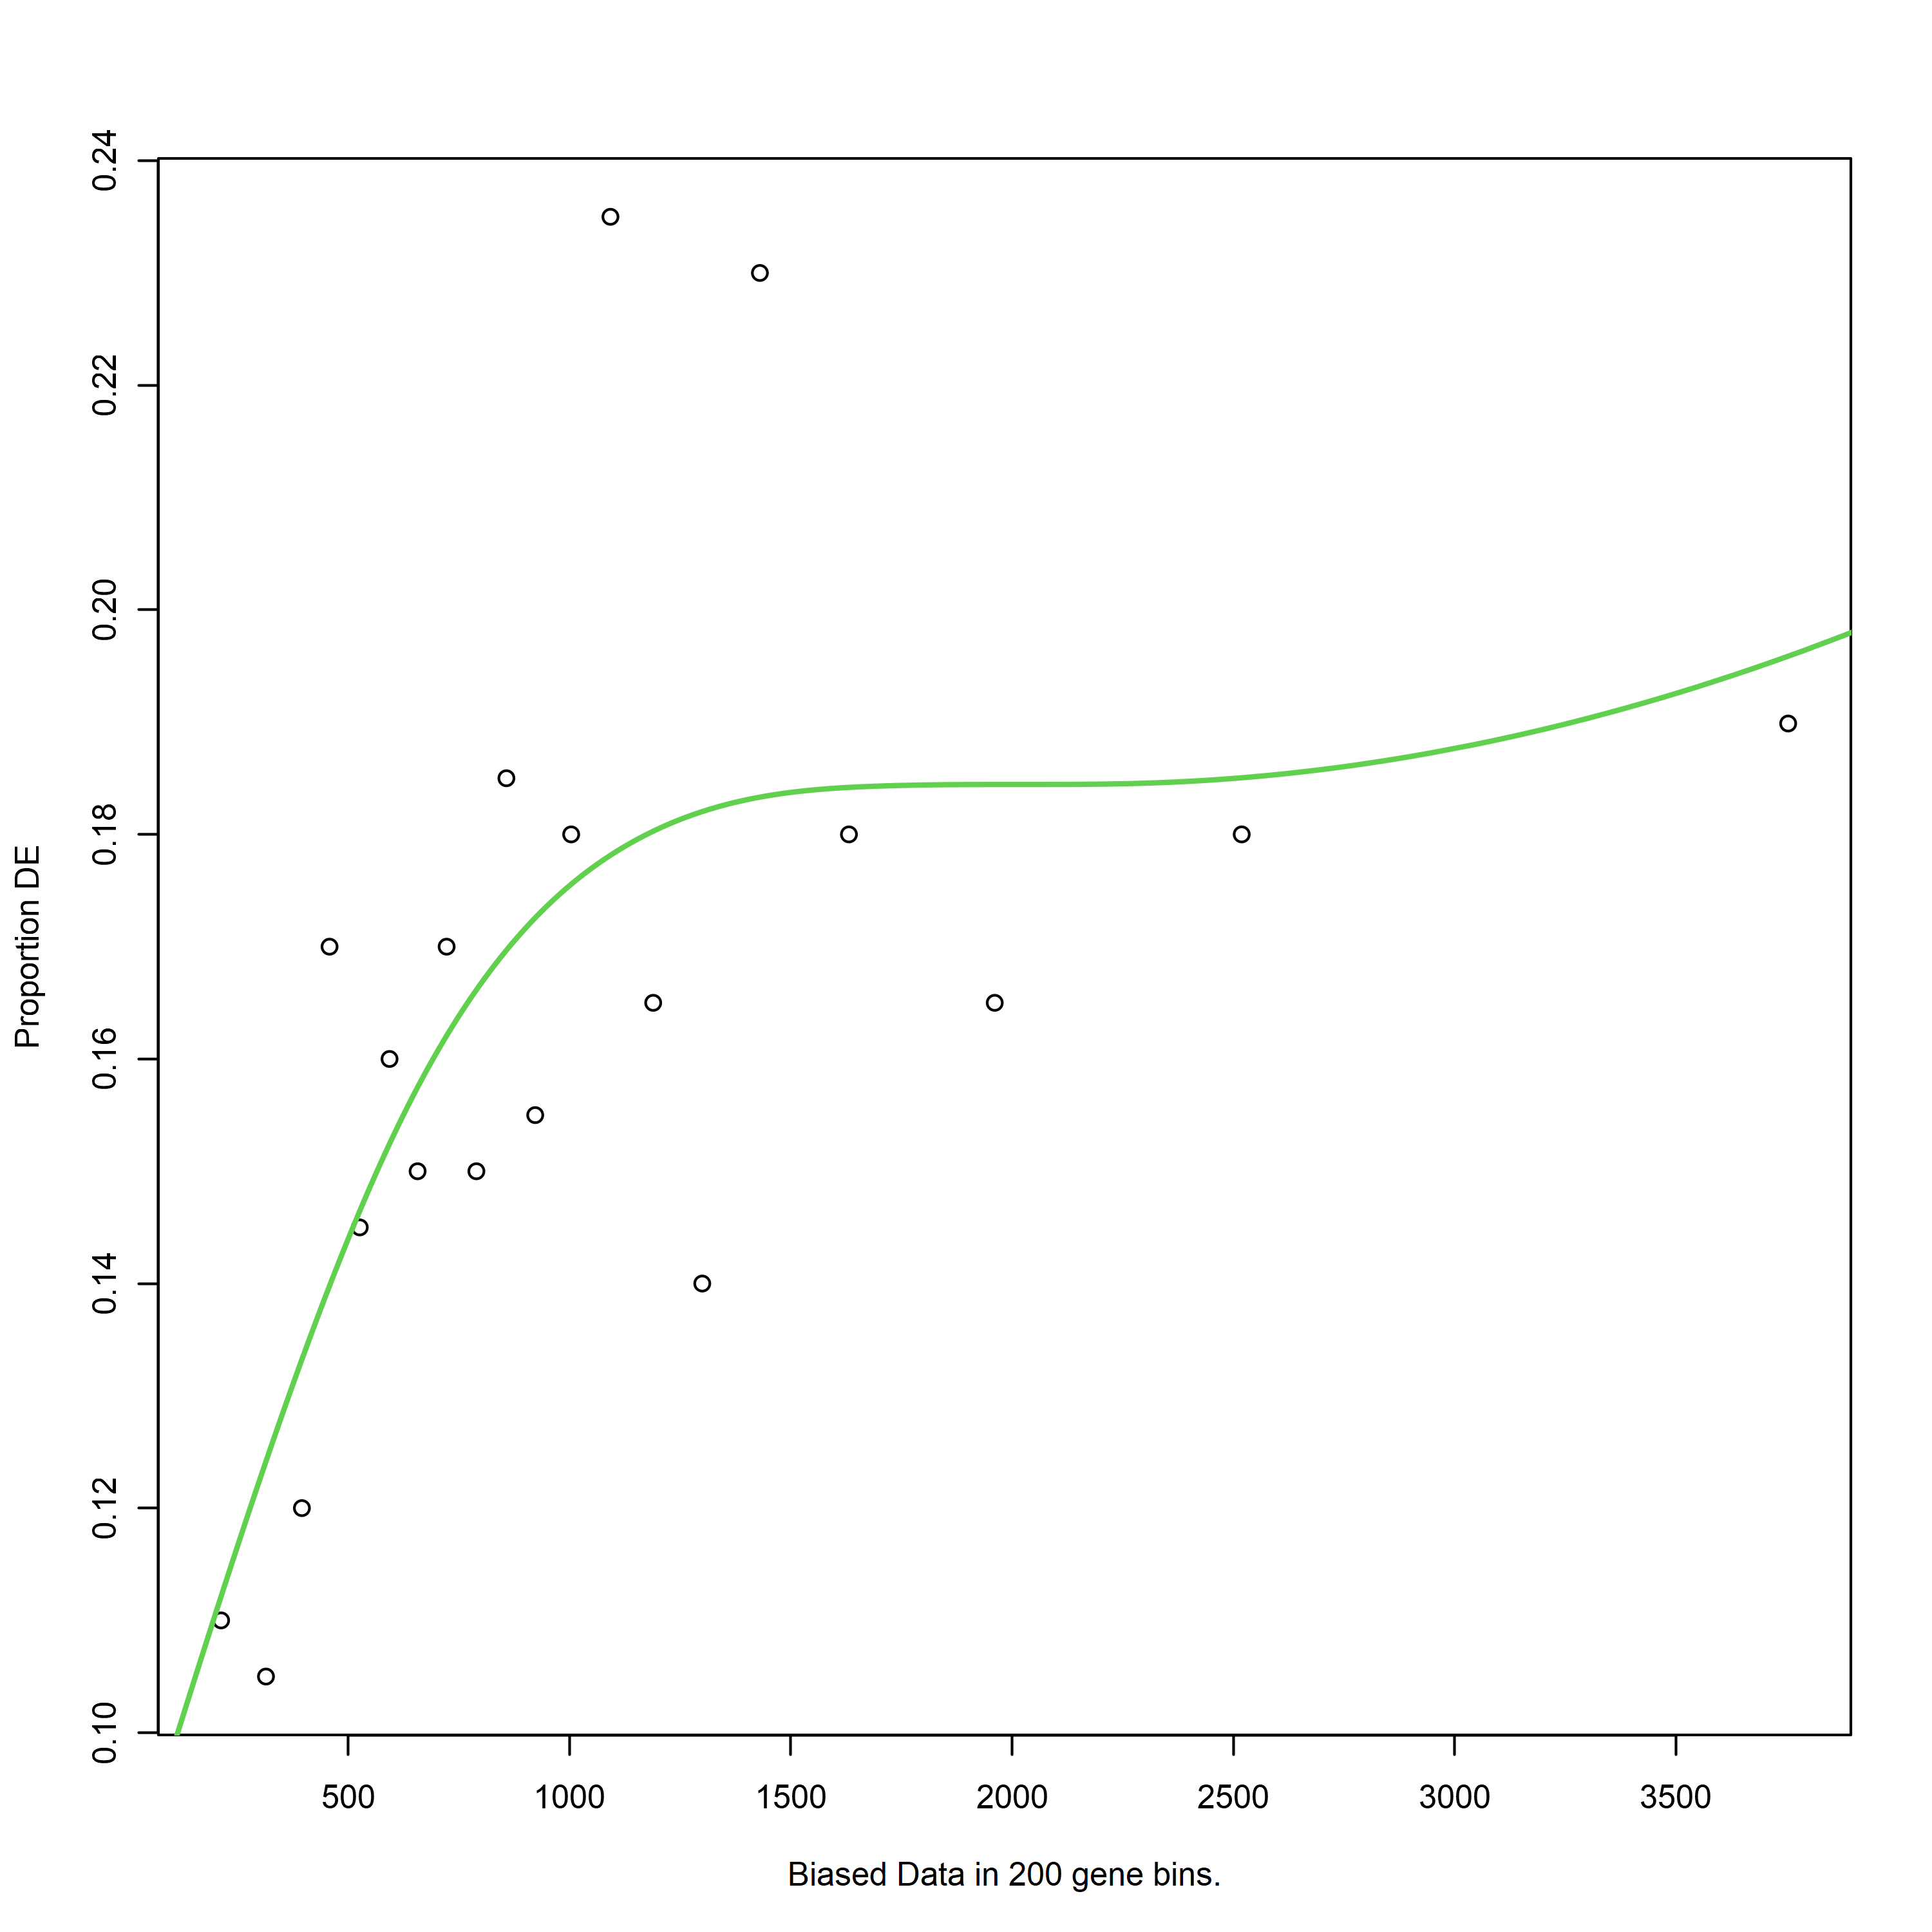

Using manually entered categories.

For 1813 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A2vsA1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A2vsA1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


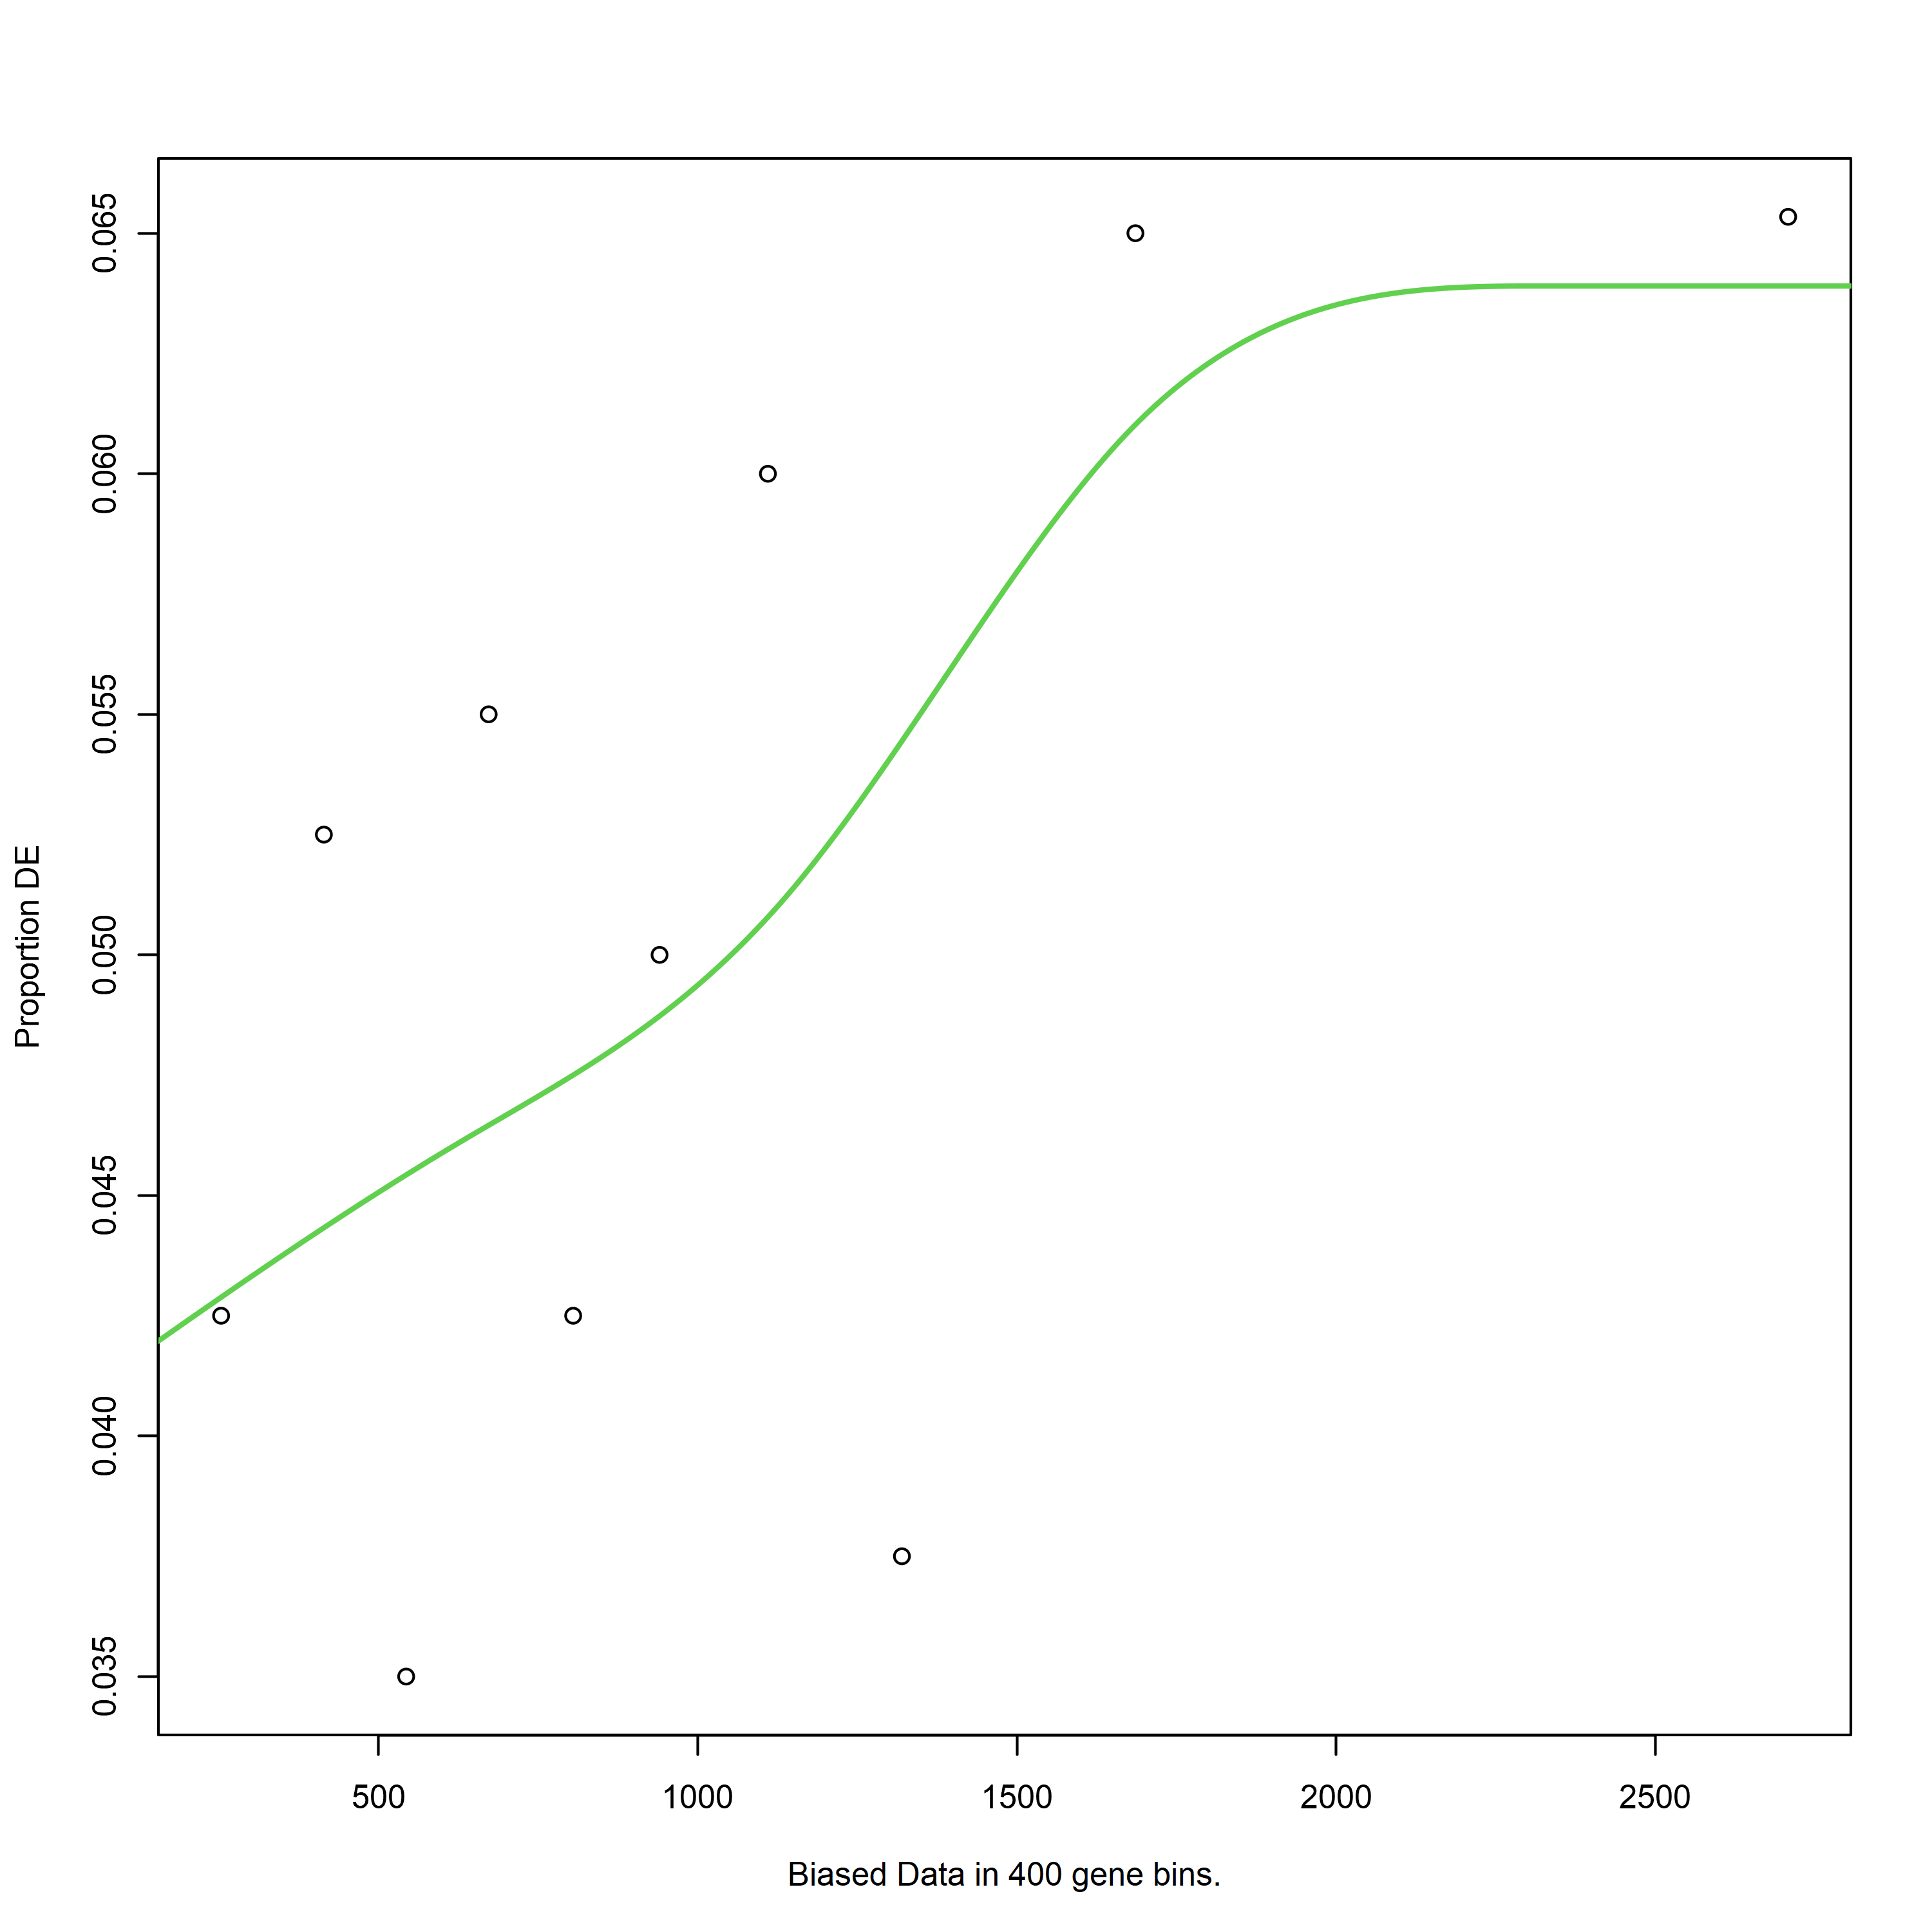

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


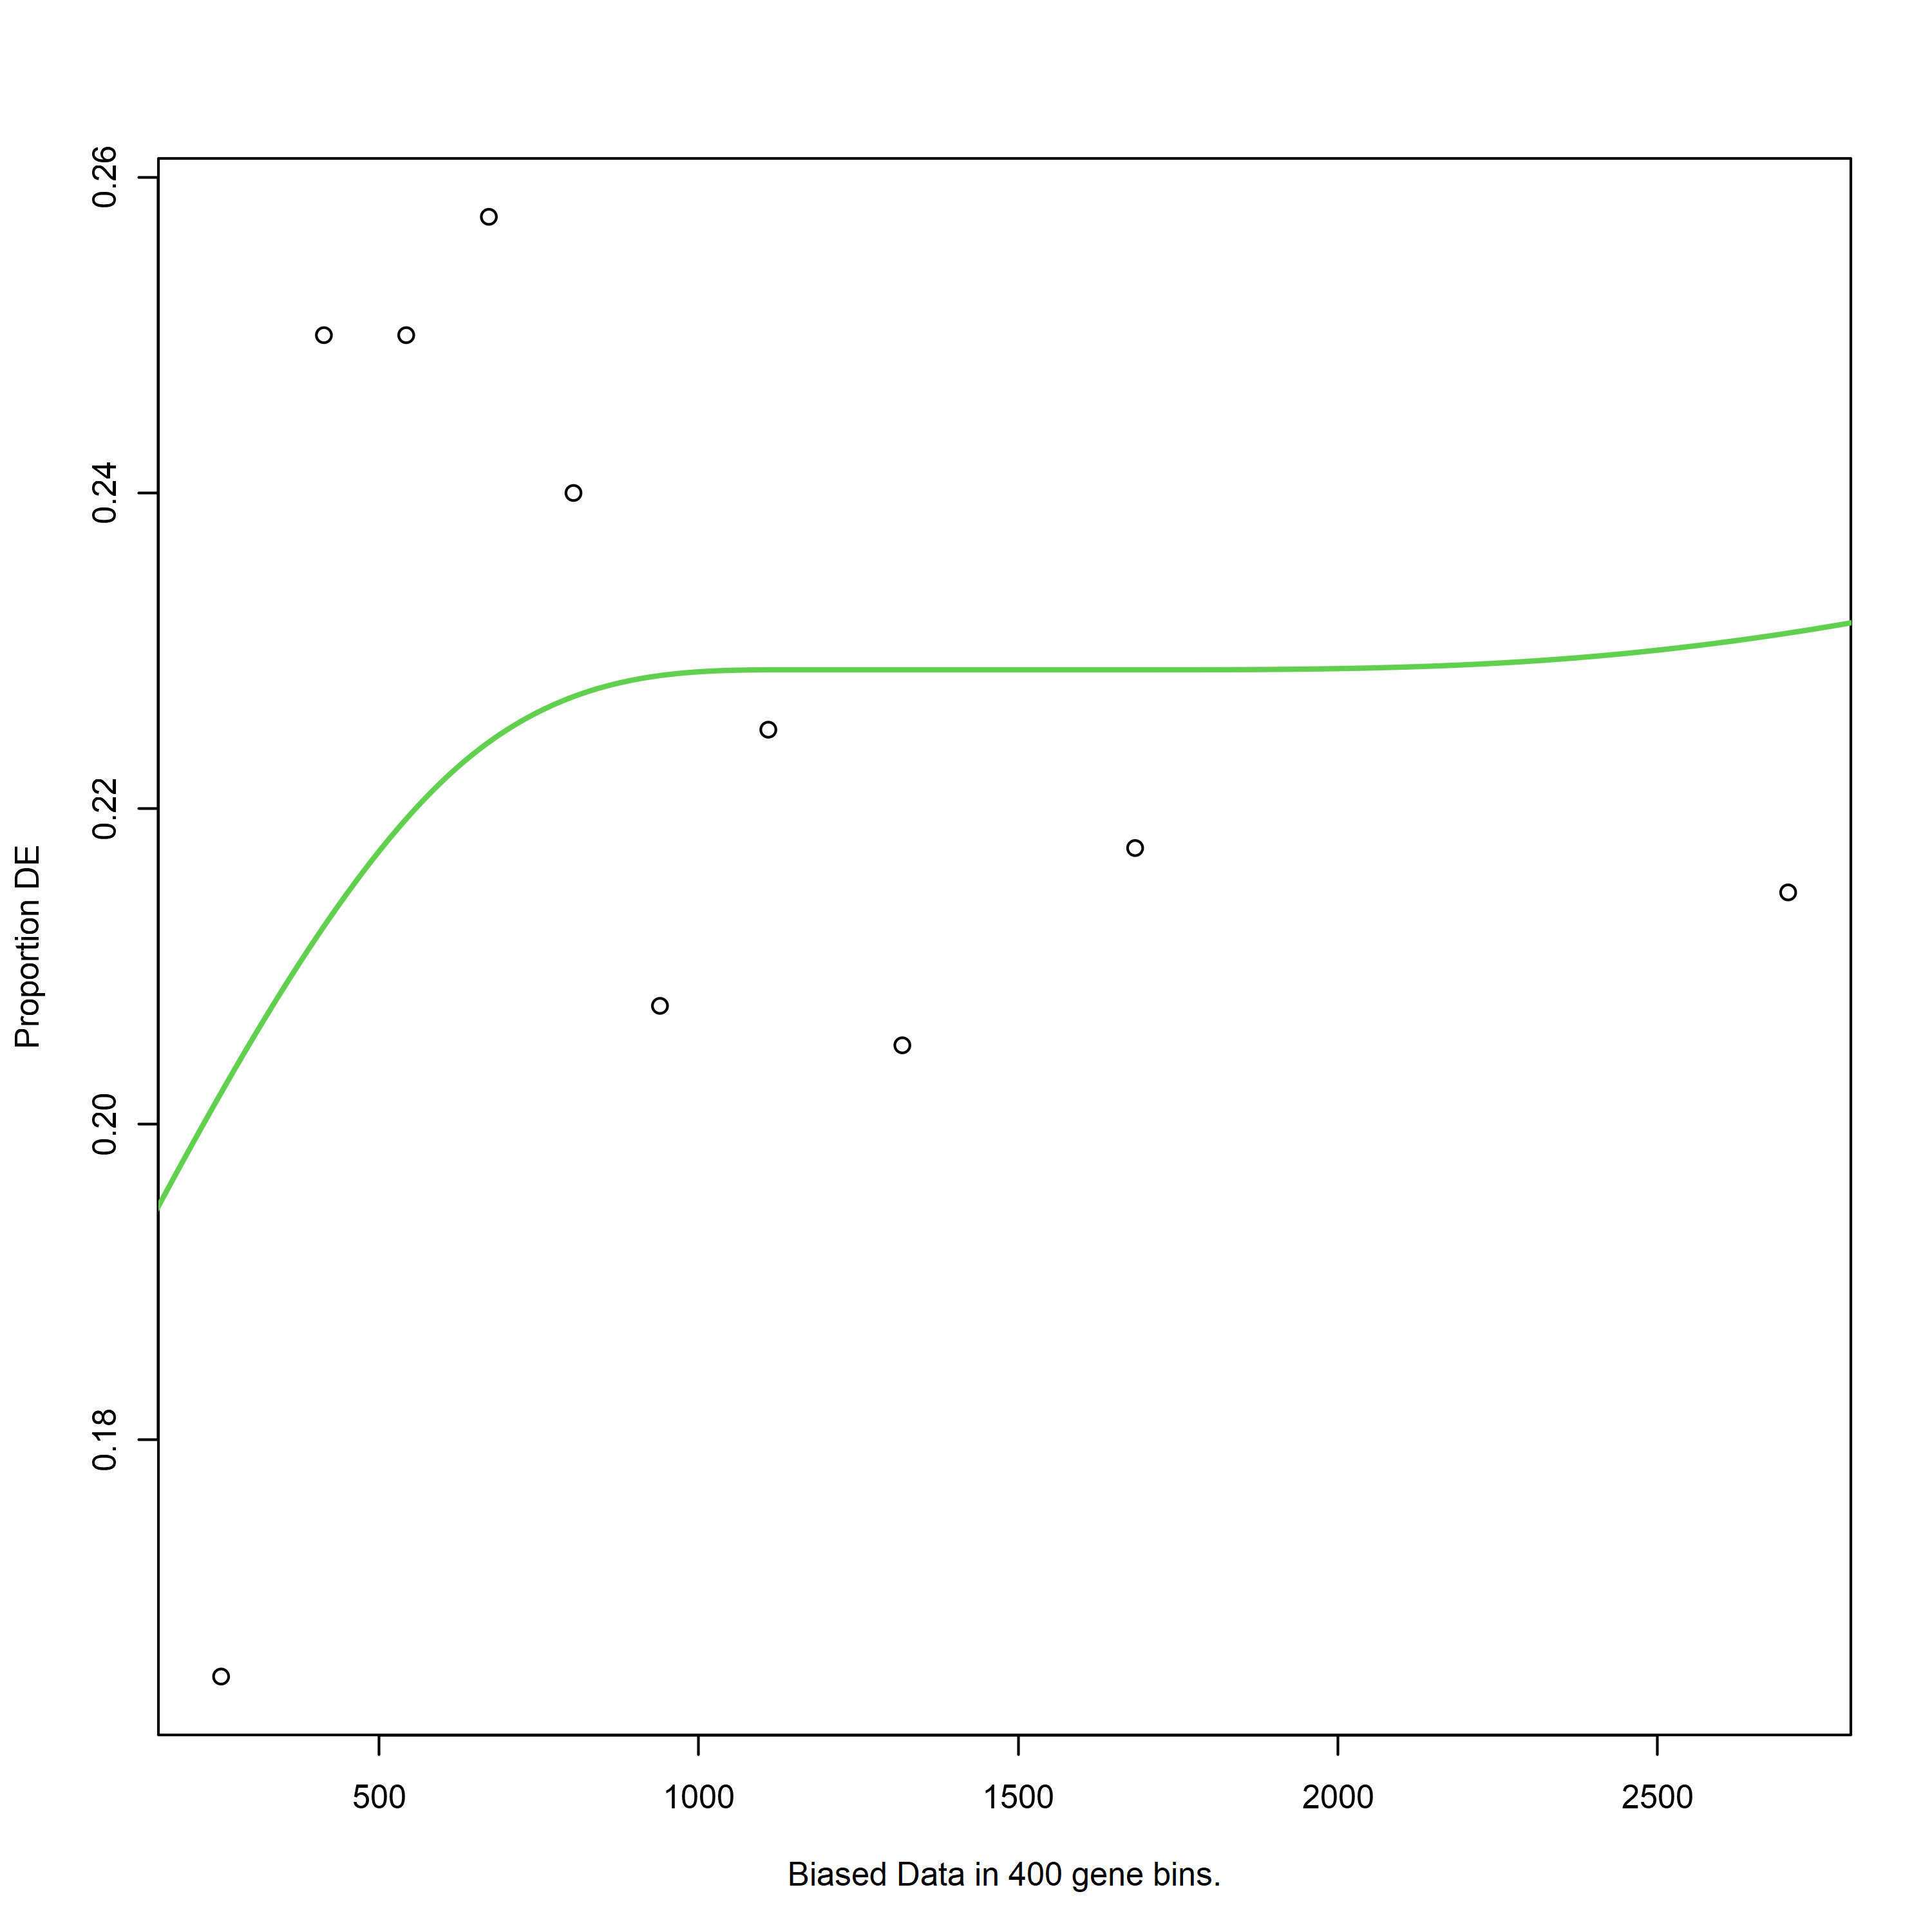

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "A3vsA2_rna"
[1] "sub"
[1] "is_de"


Using manually entered categories.

For 1456 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



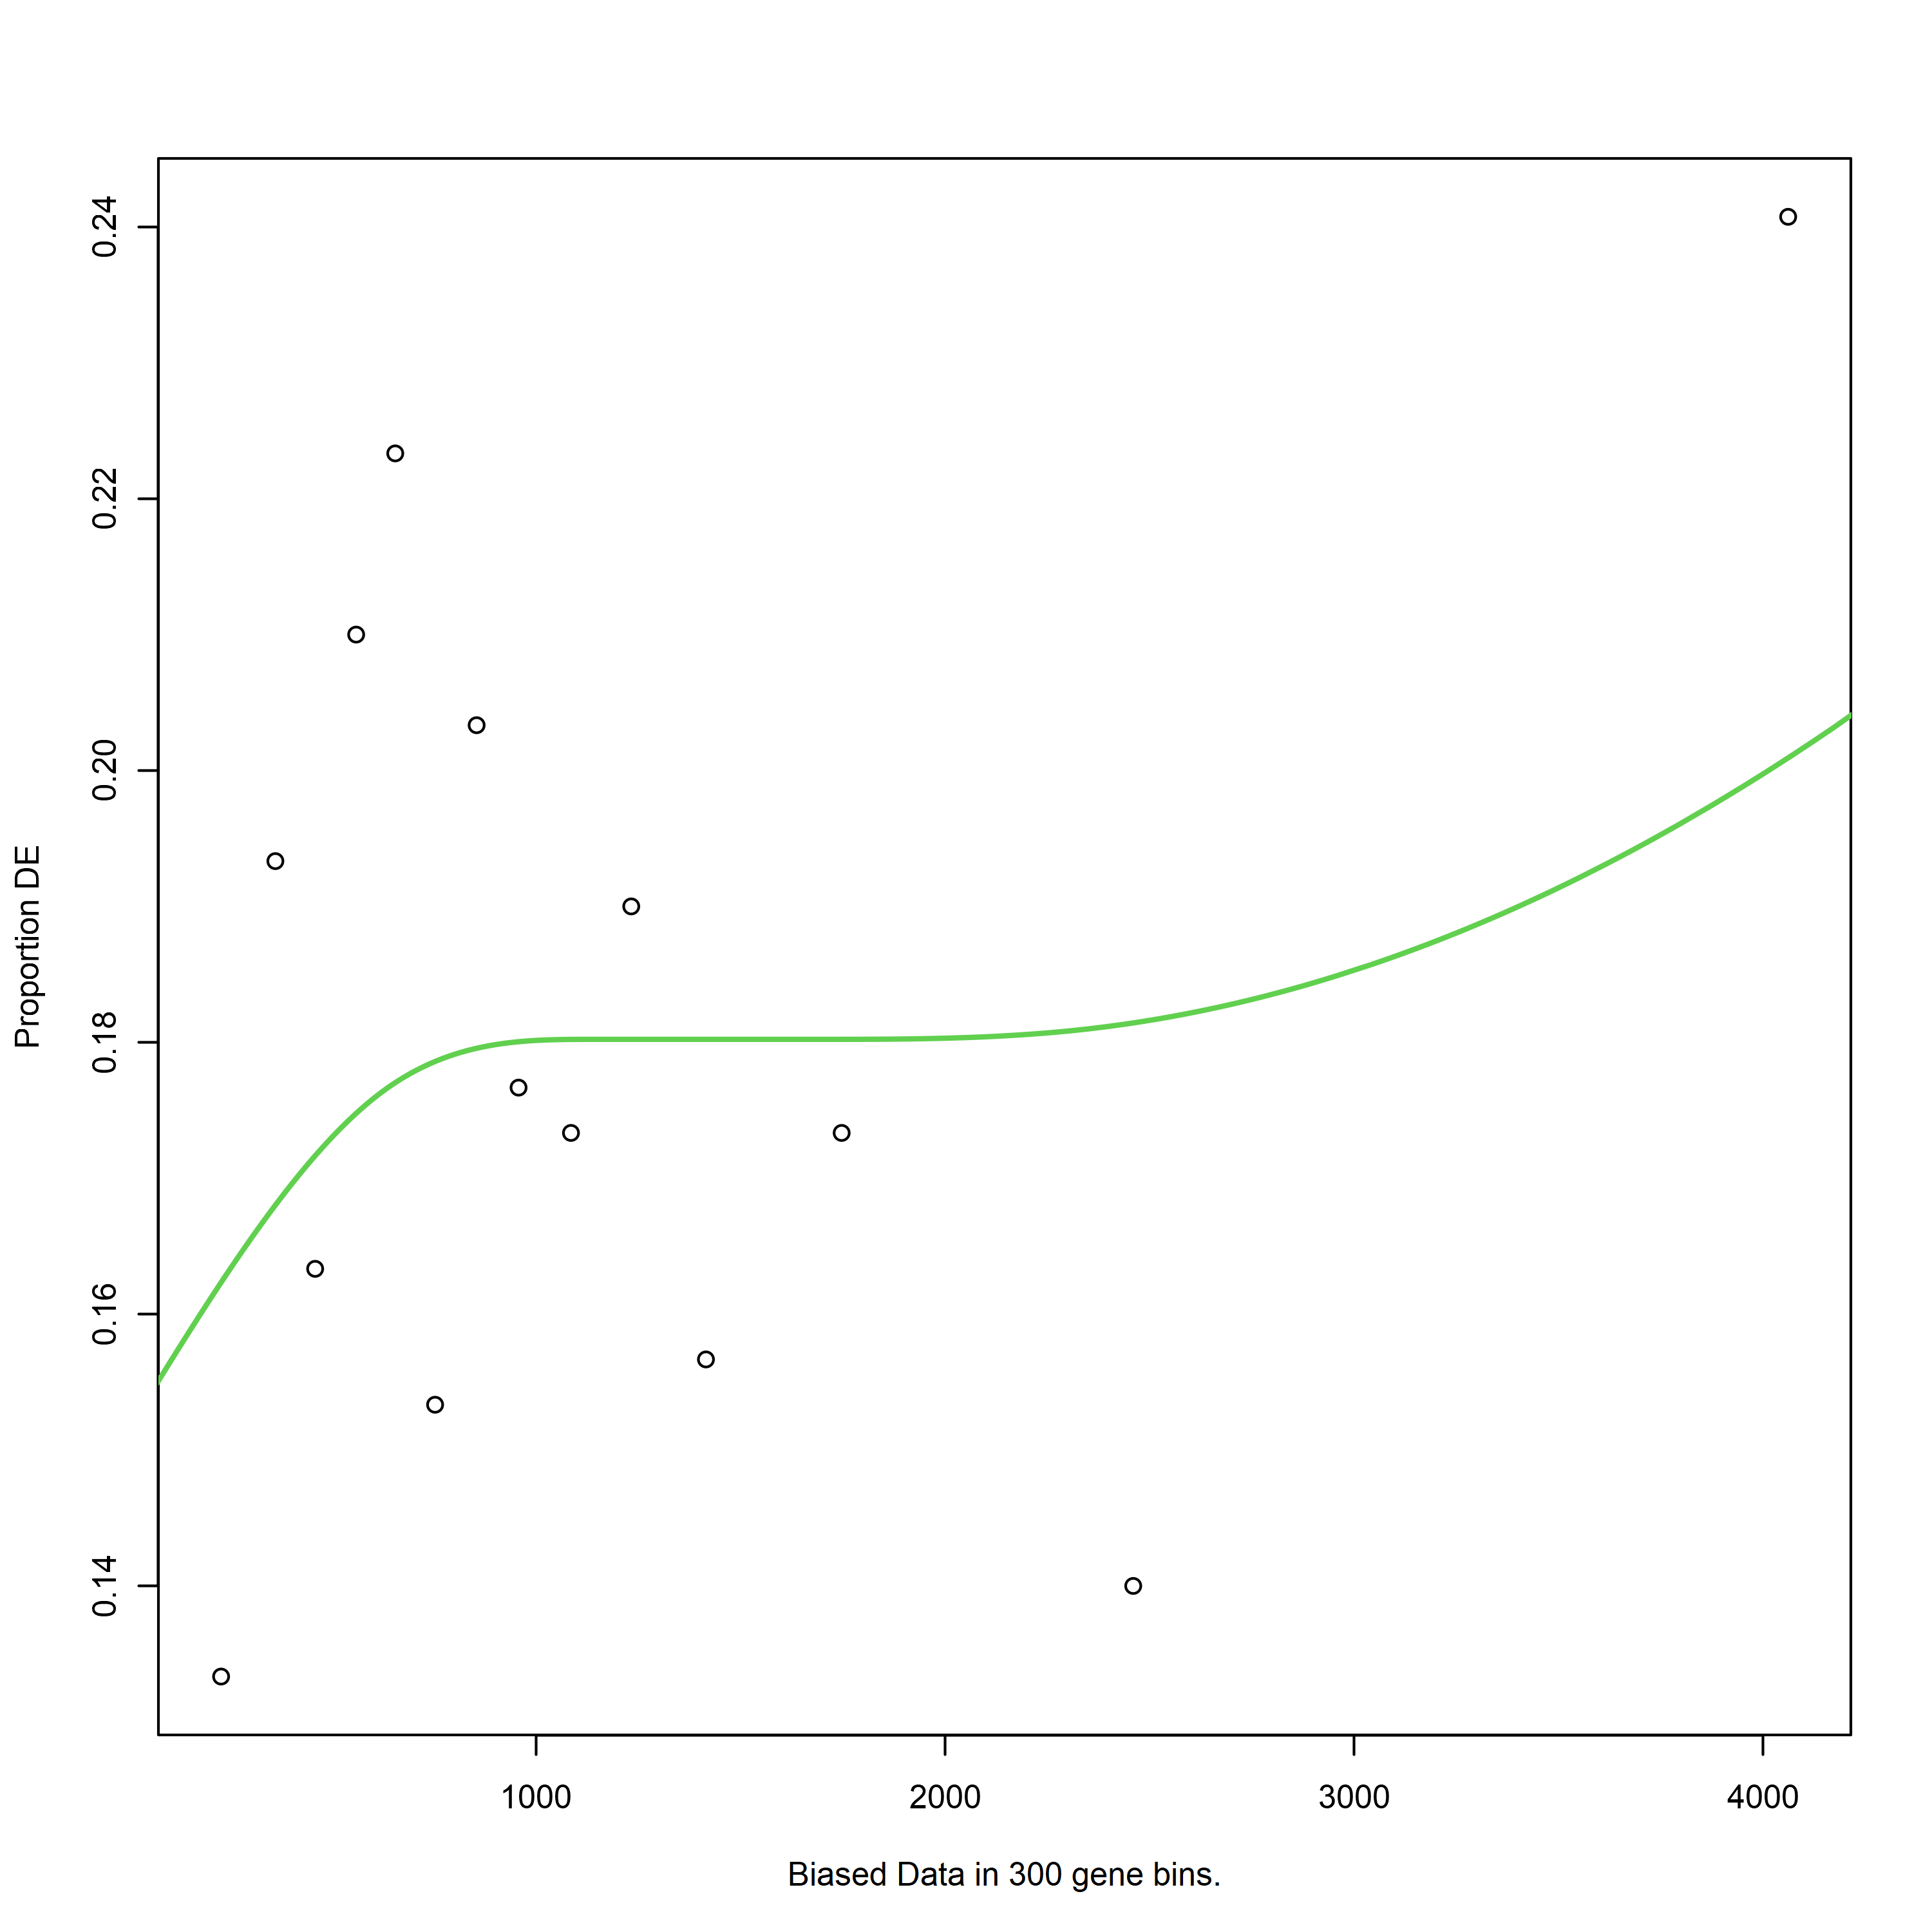

[1] "A3vsA2_rna"
[1] "path"
[1] "is_de"


Using manually entered categories.

For 1456 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C1vsA1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C1vsA1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


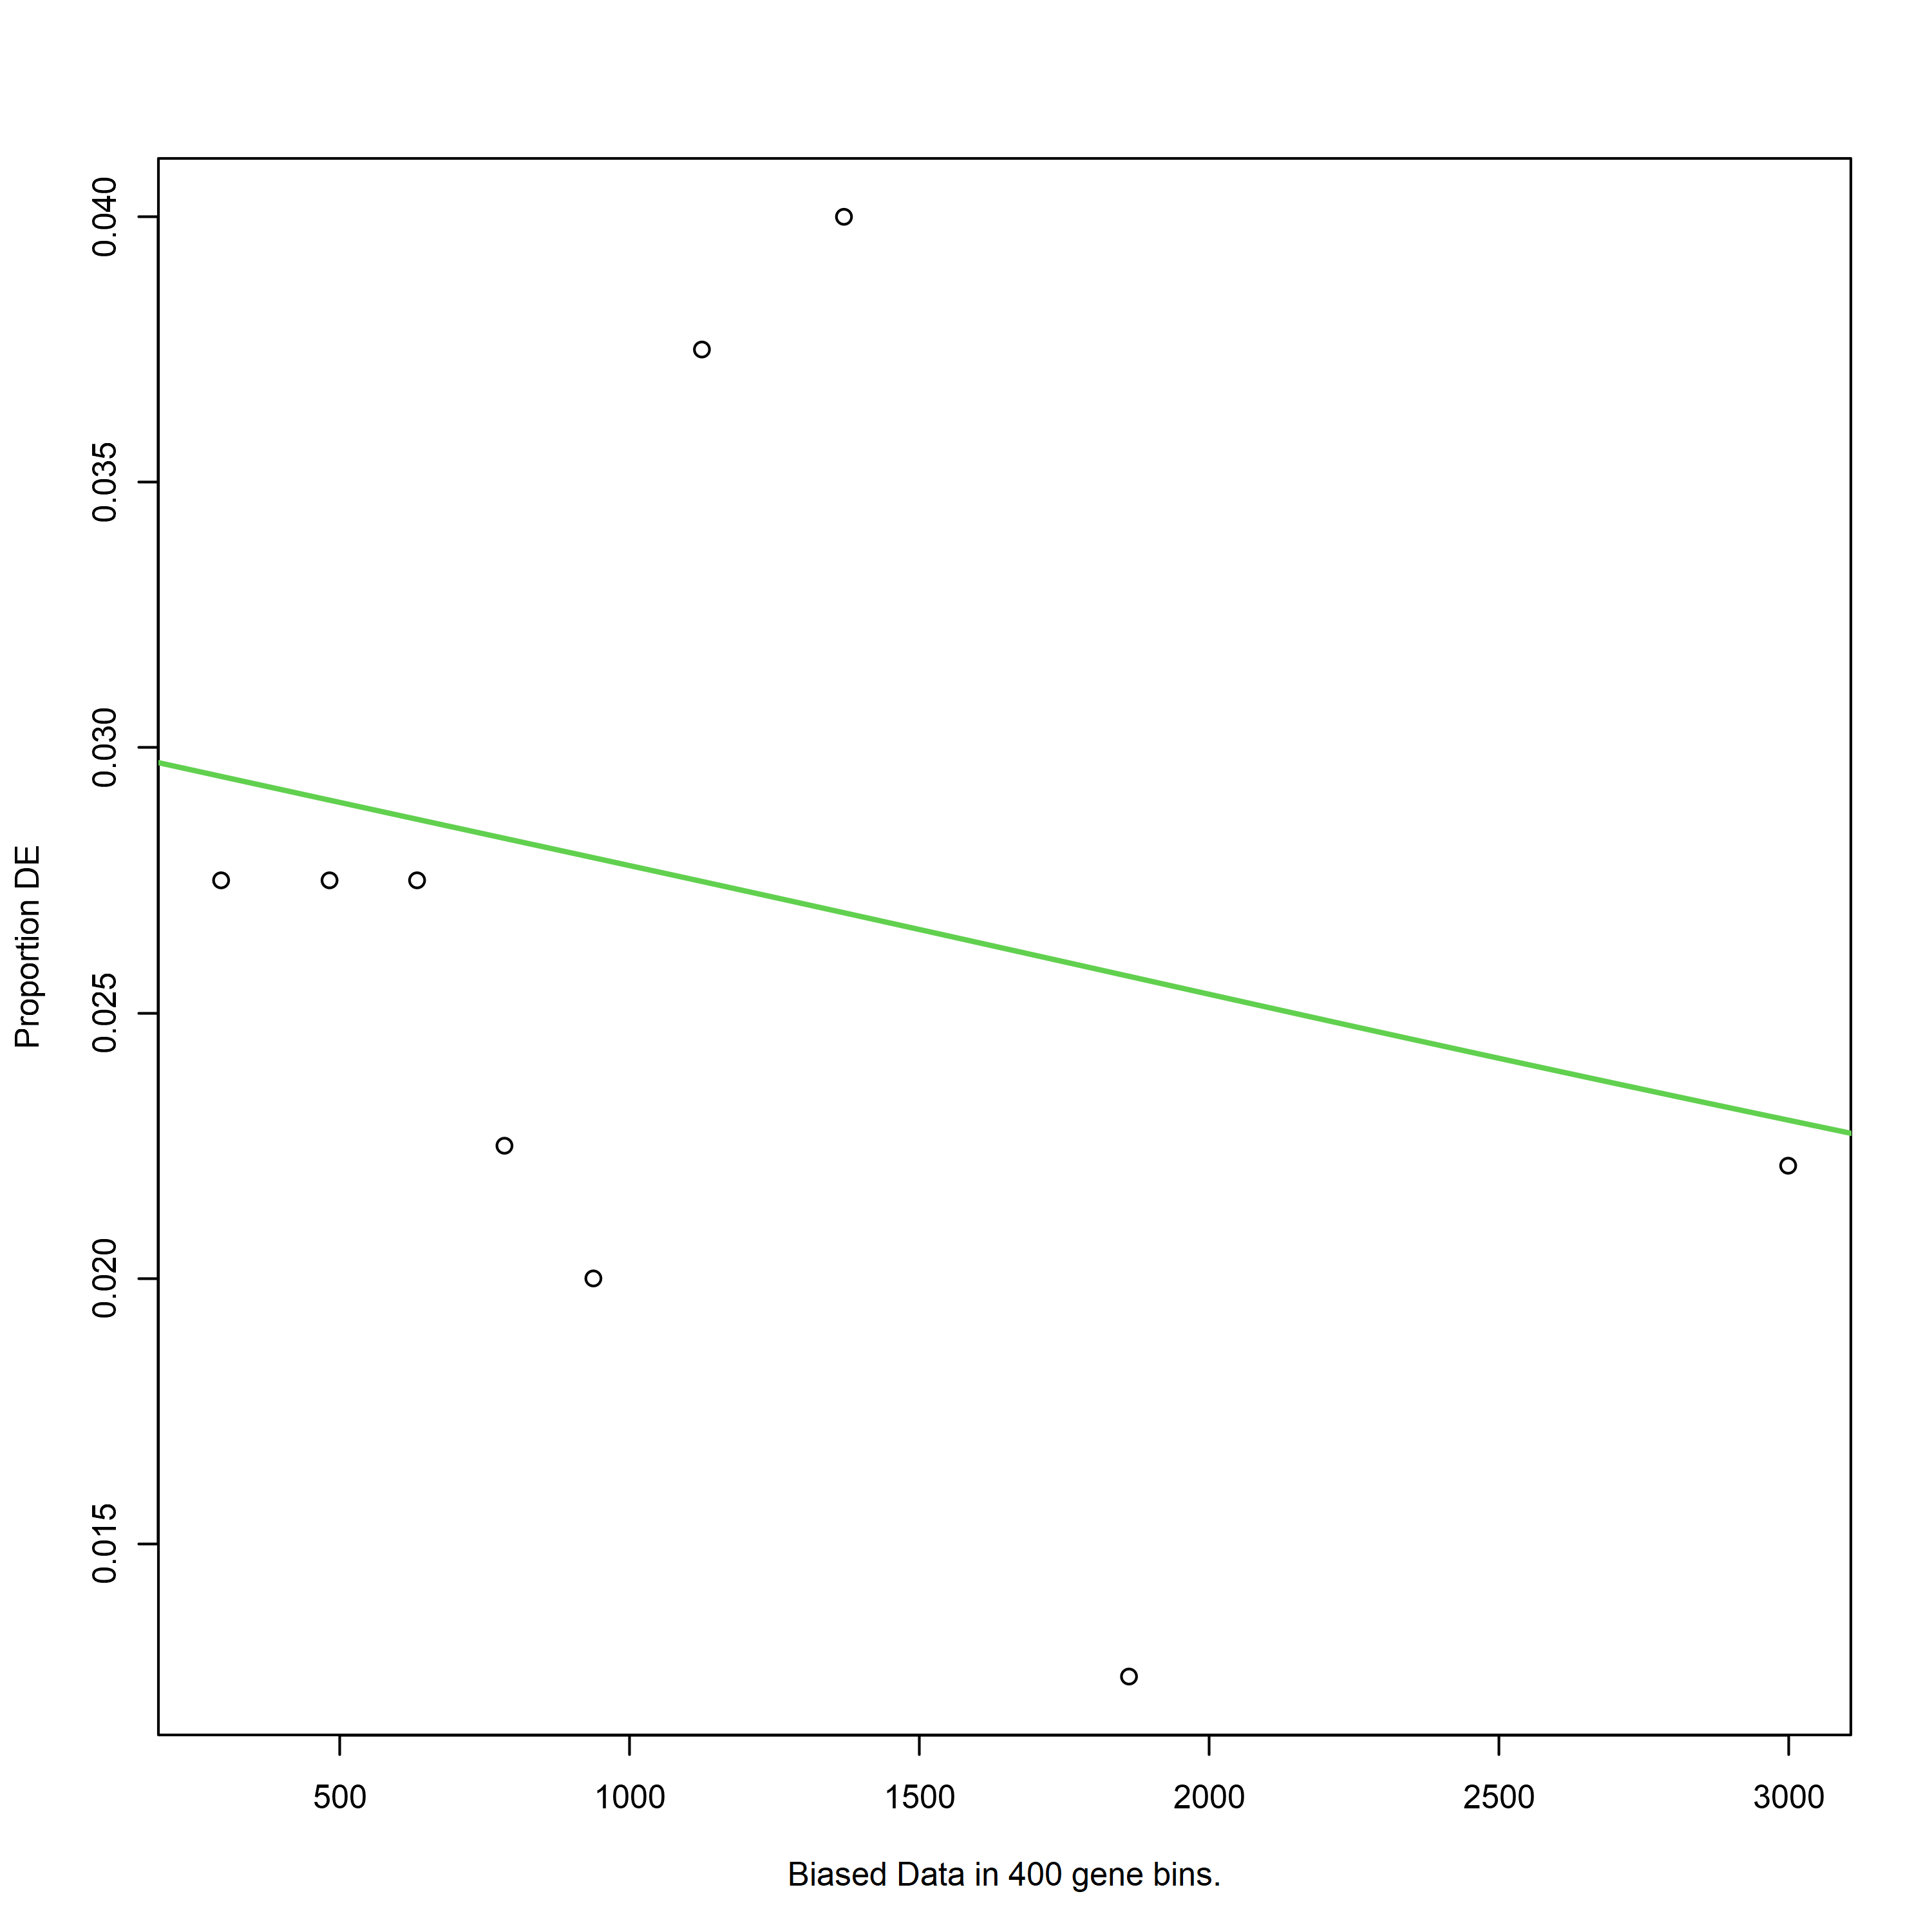

Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C2vsC1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C2vsC1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


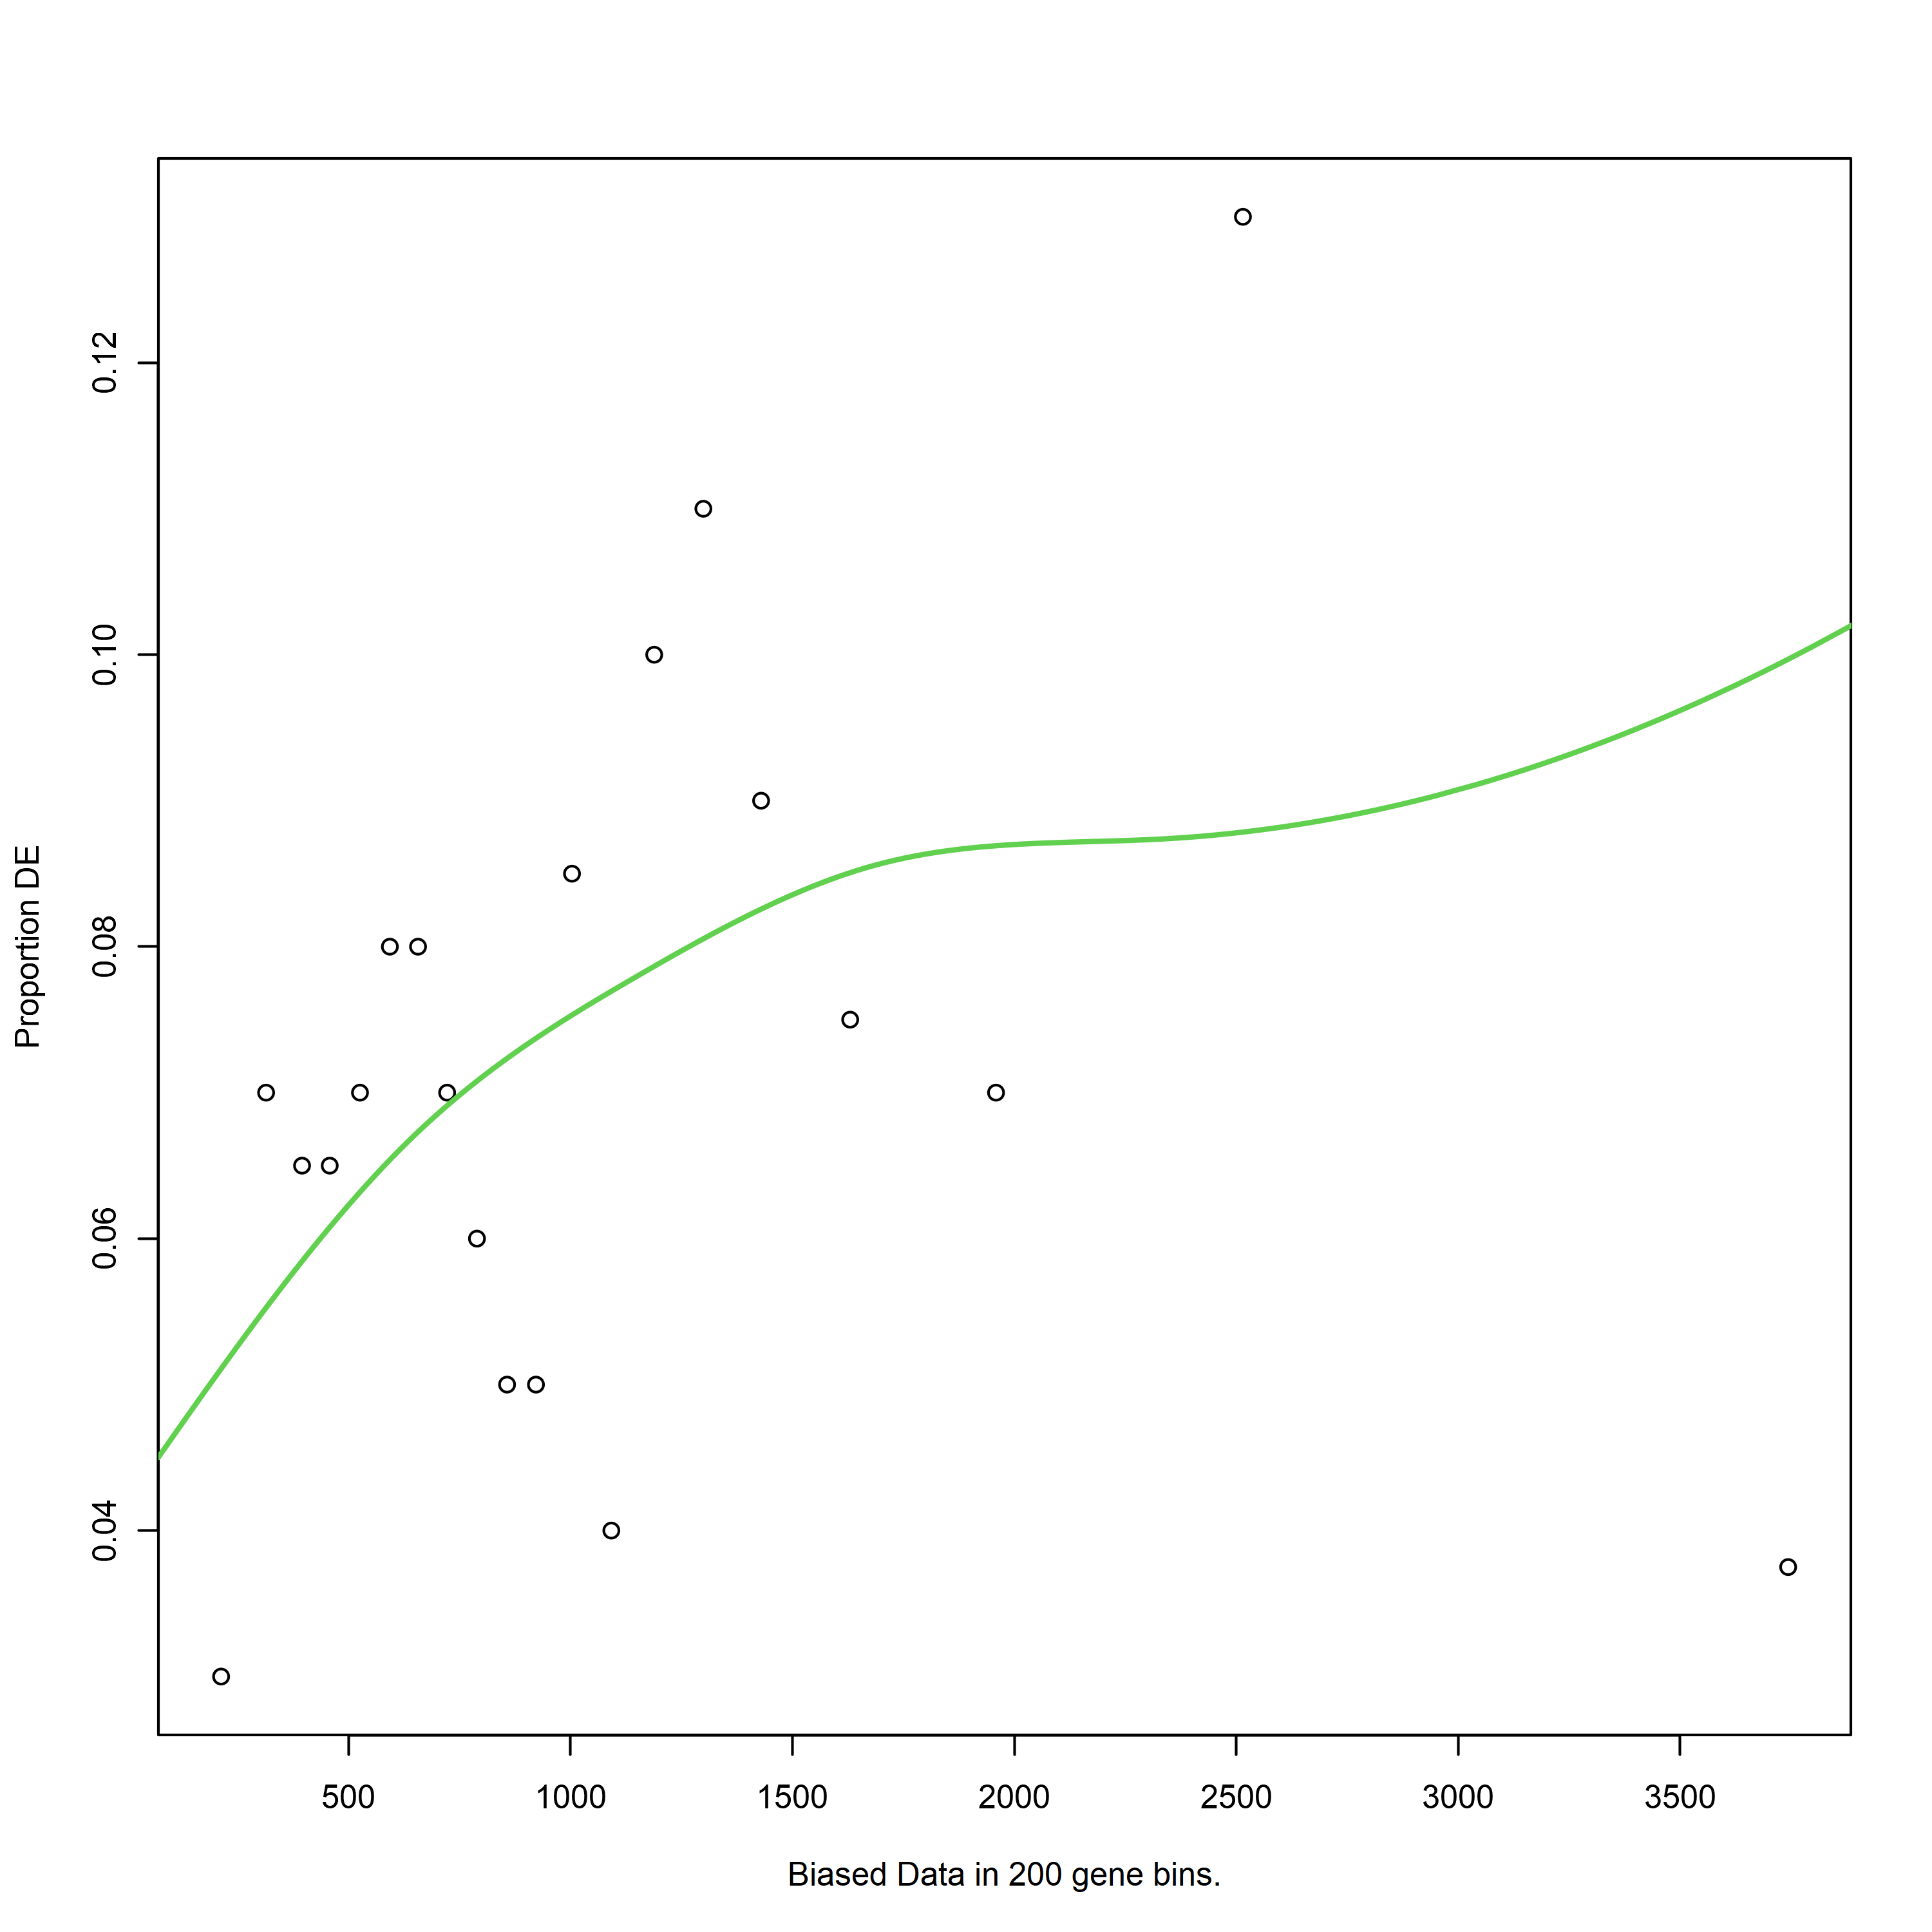

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


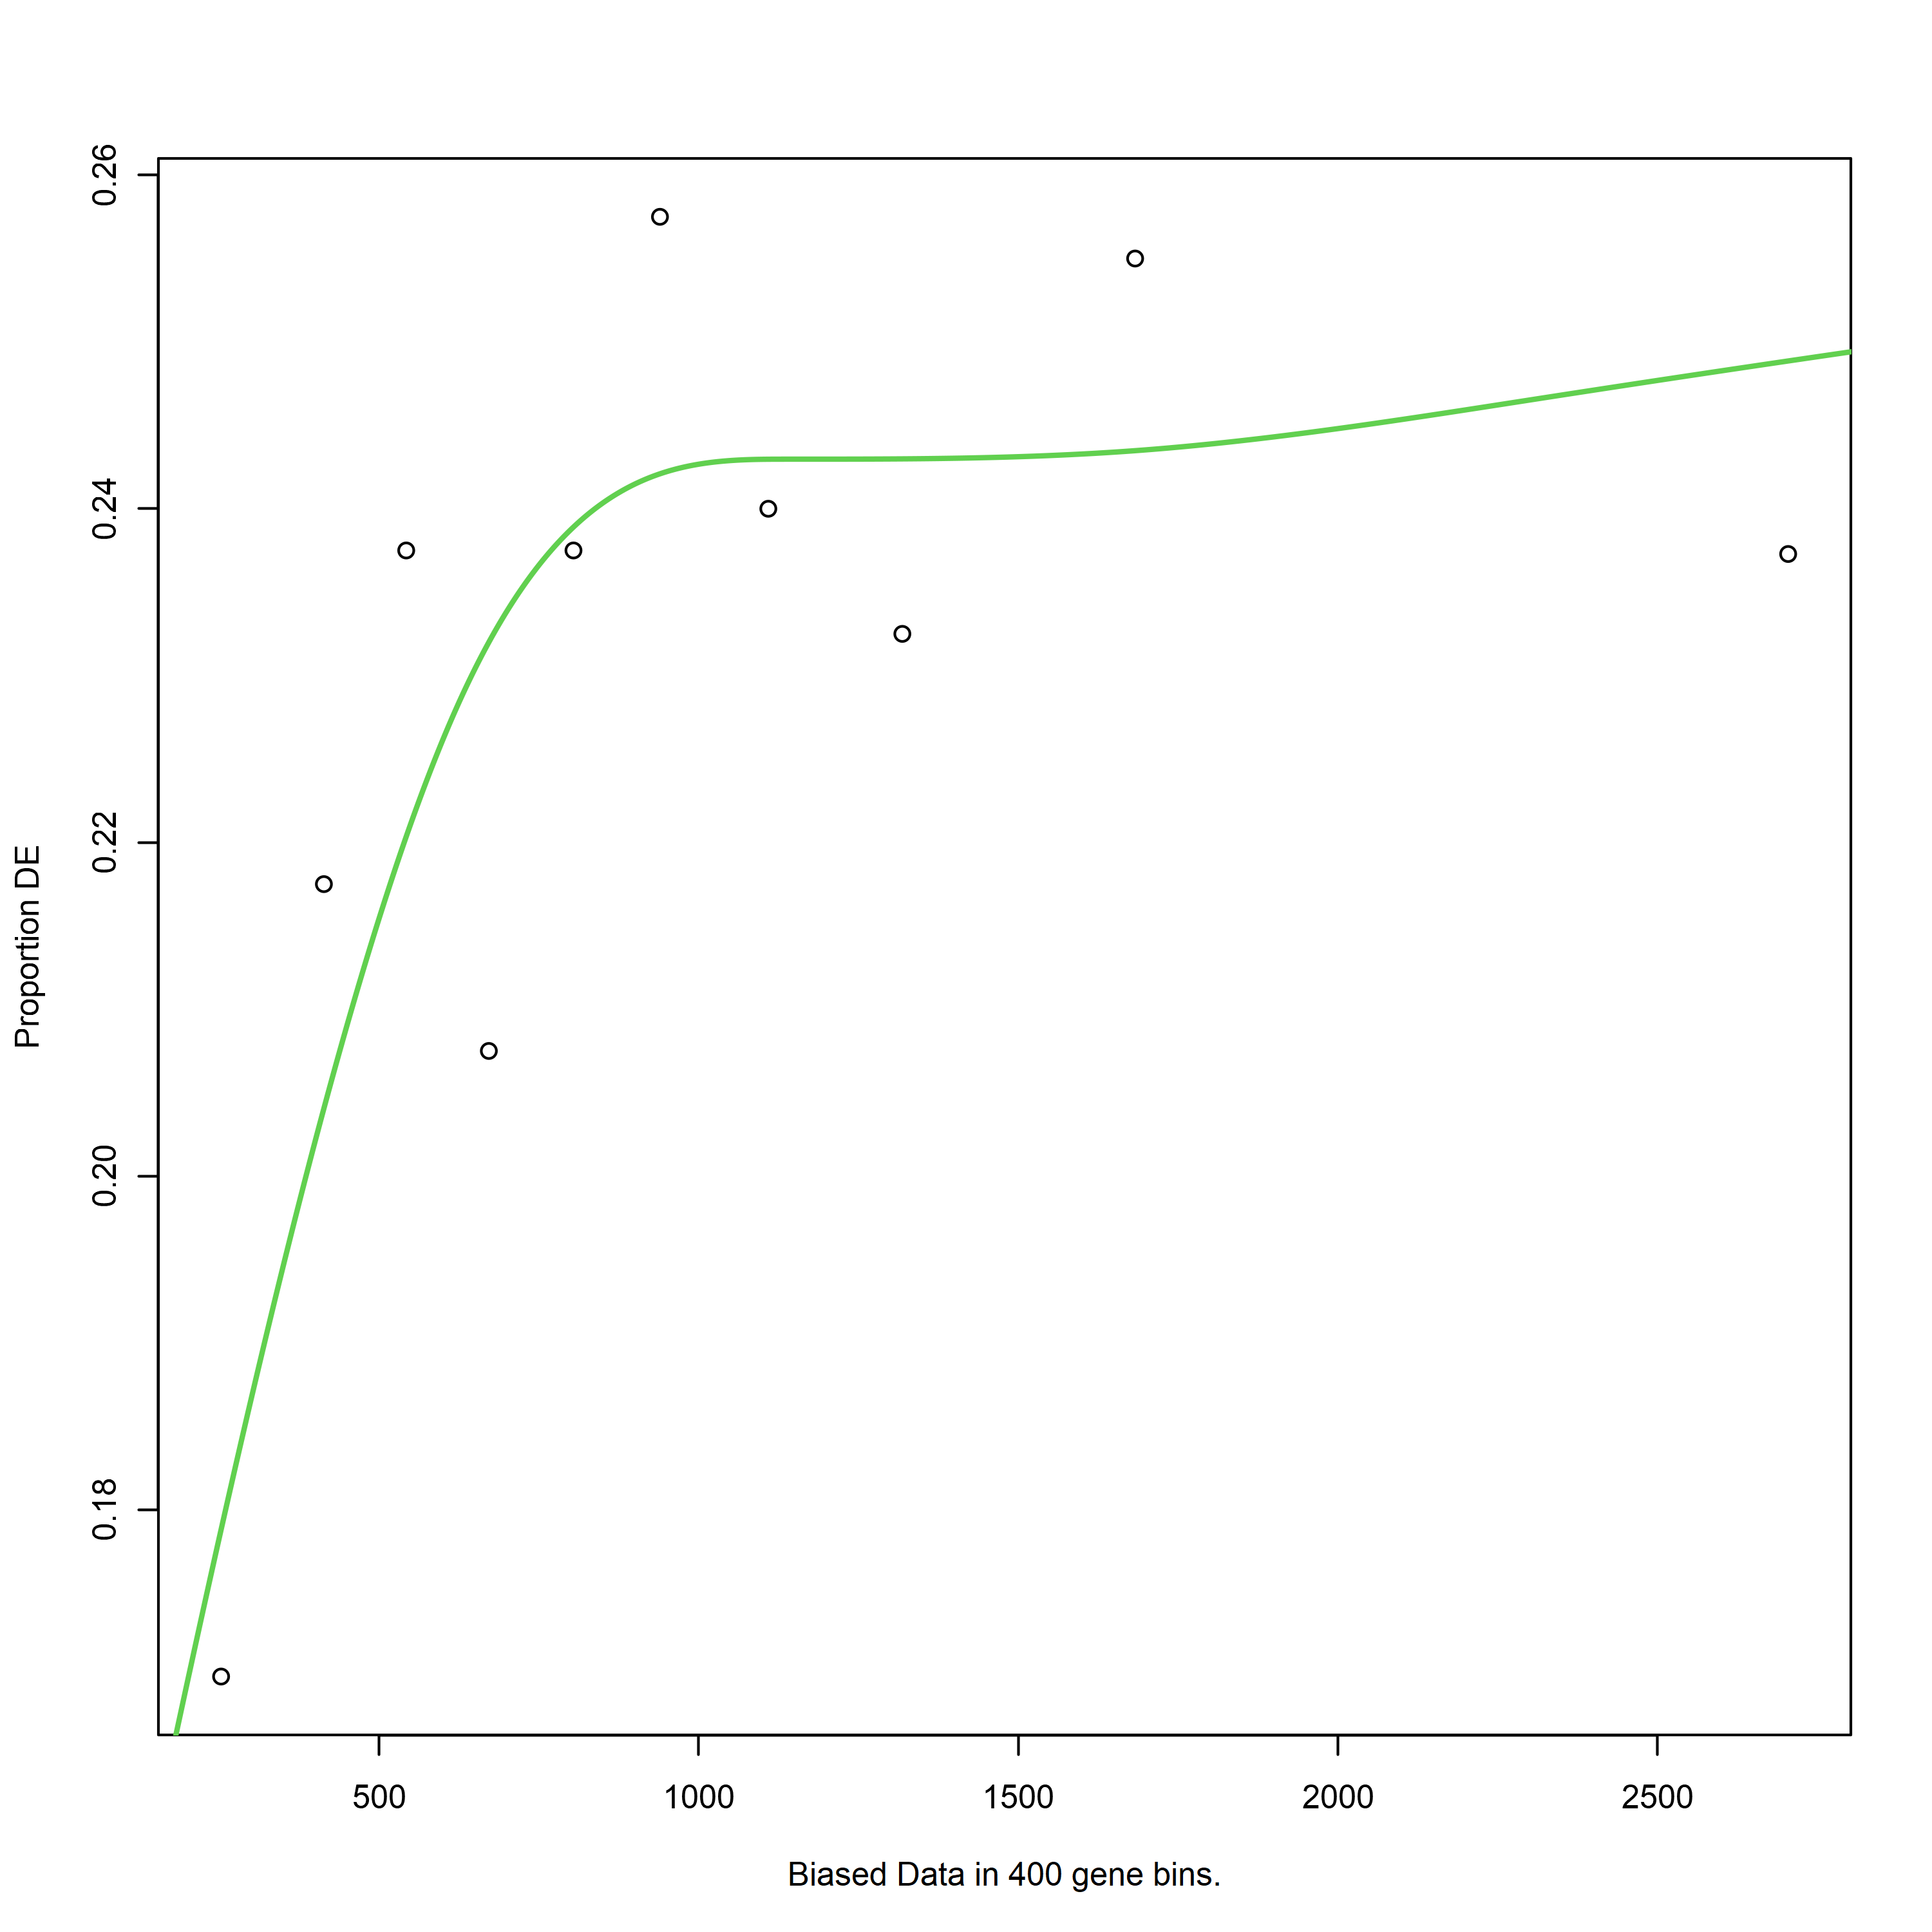

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


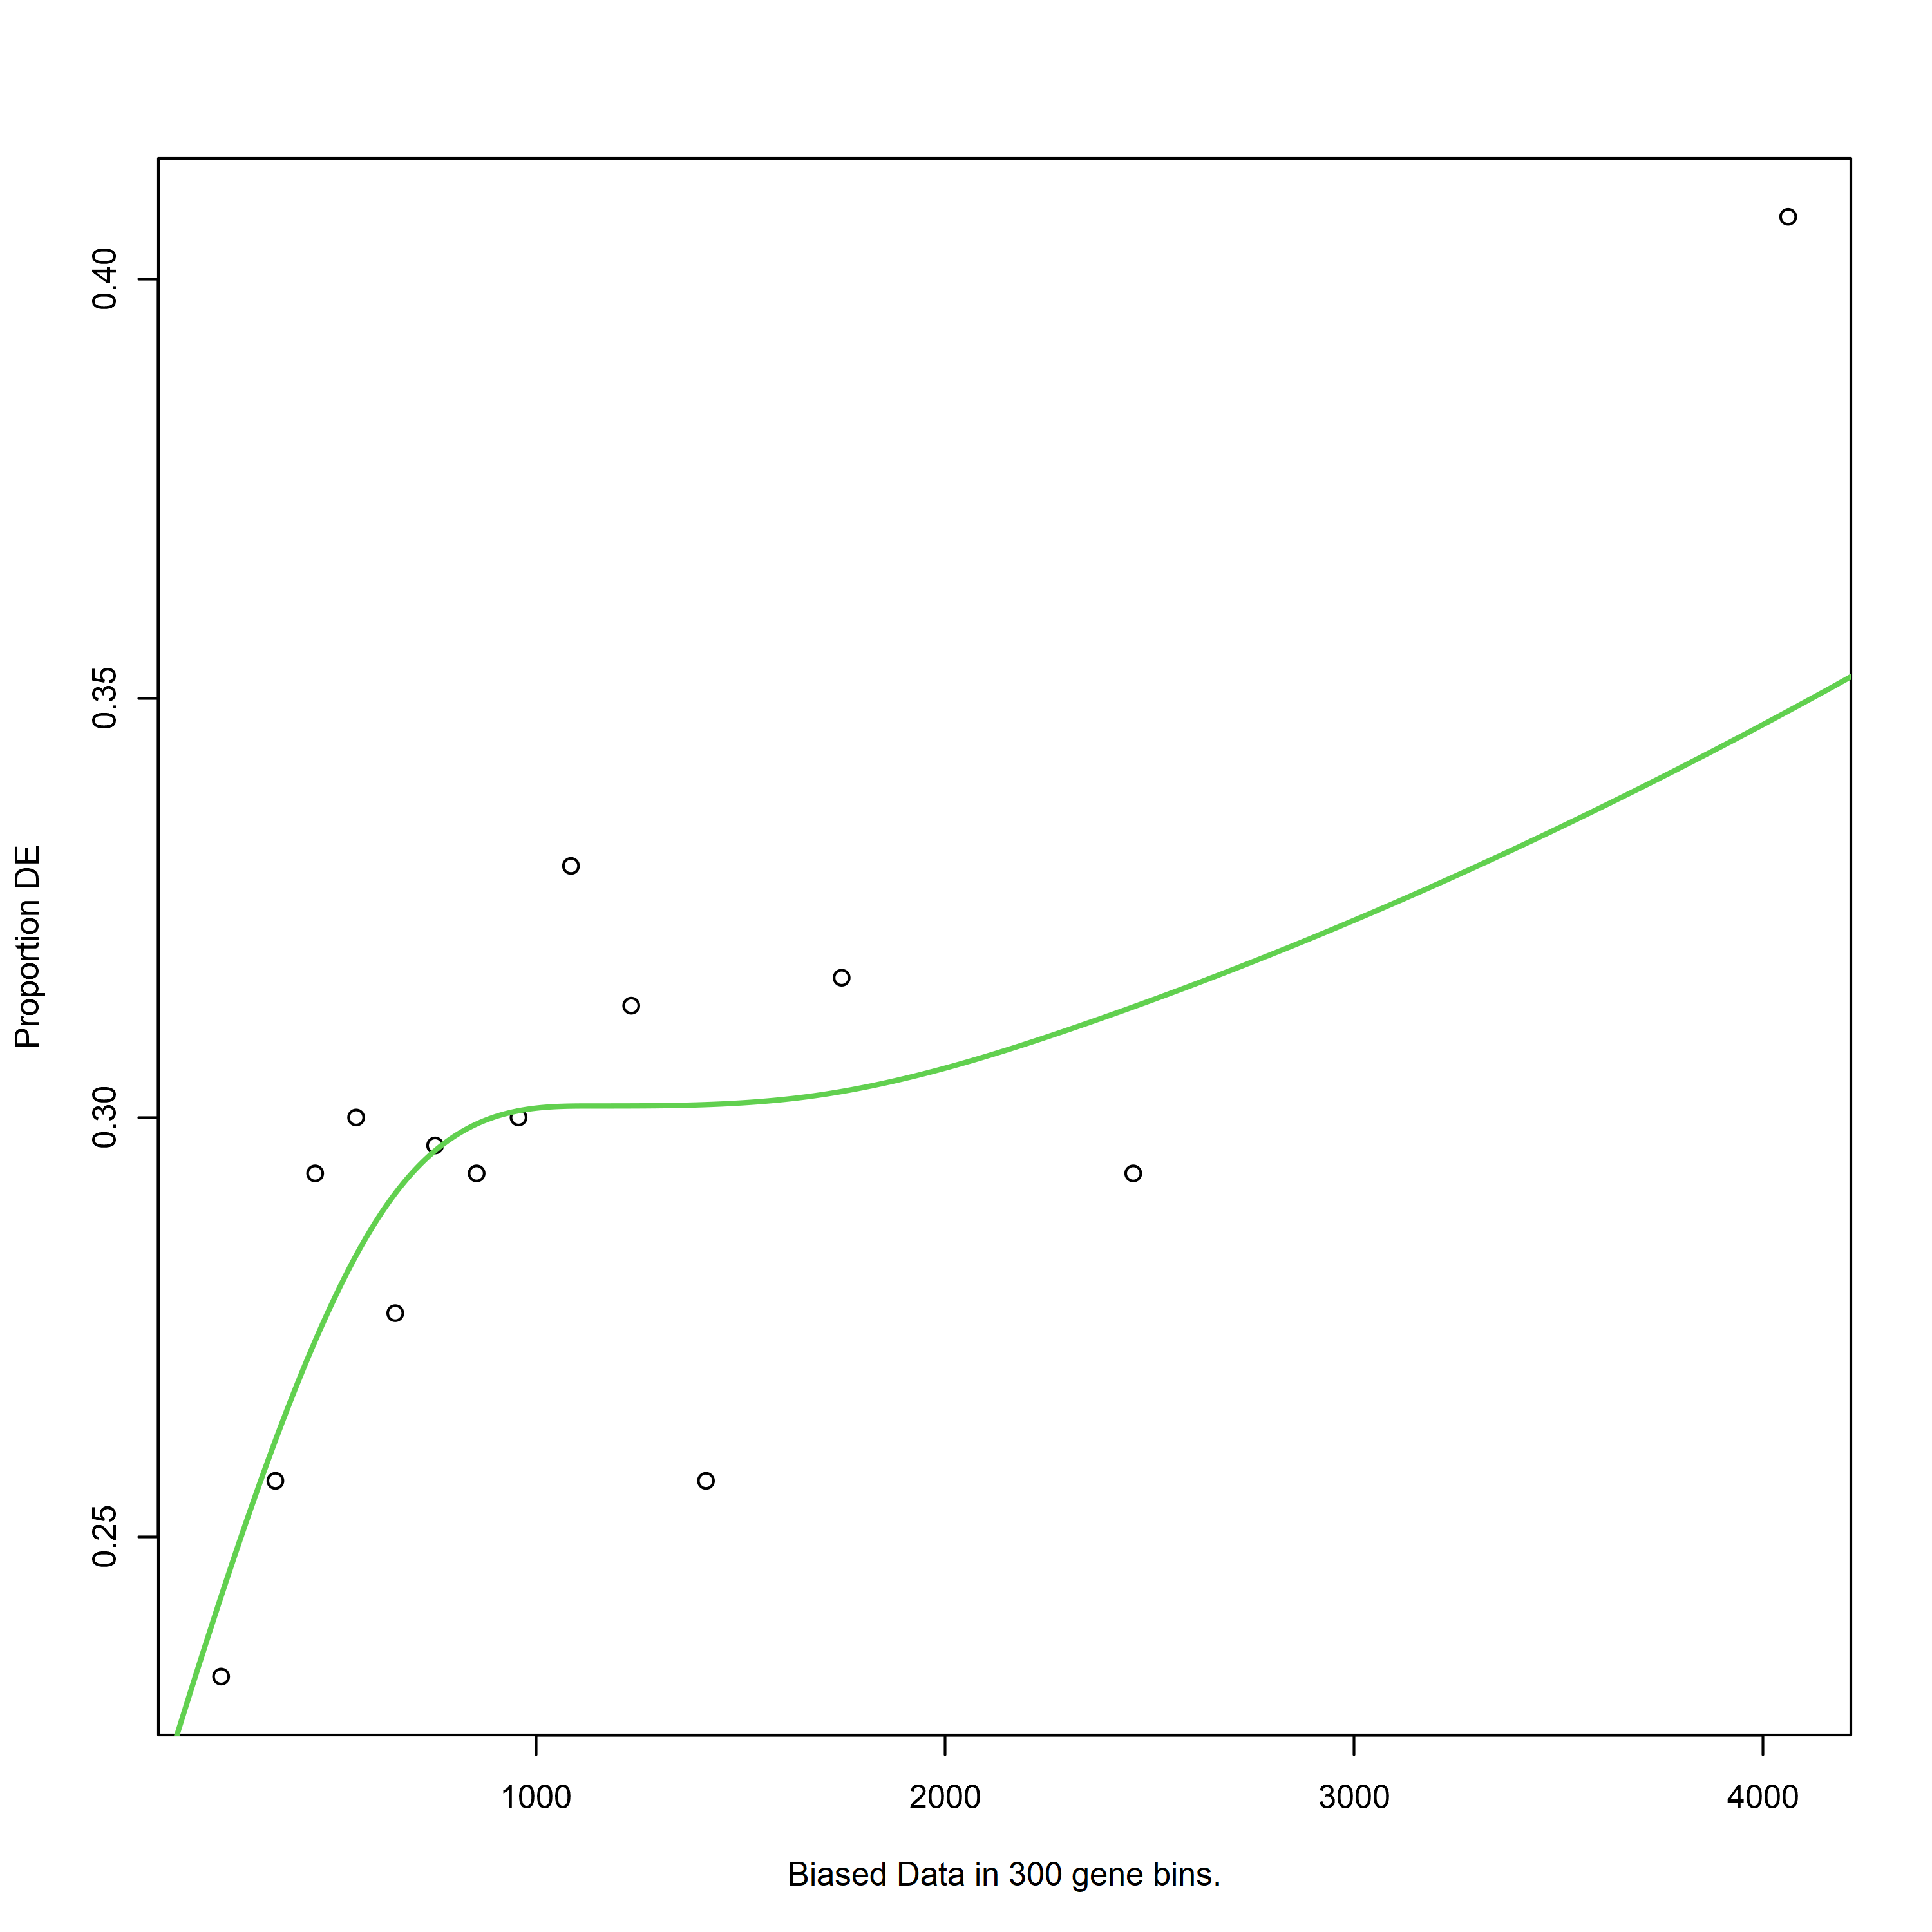

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC1_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC1_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


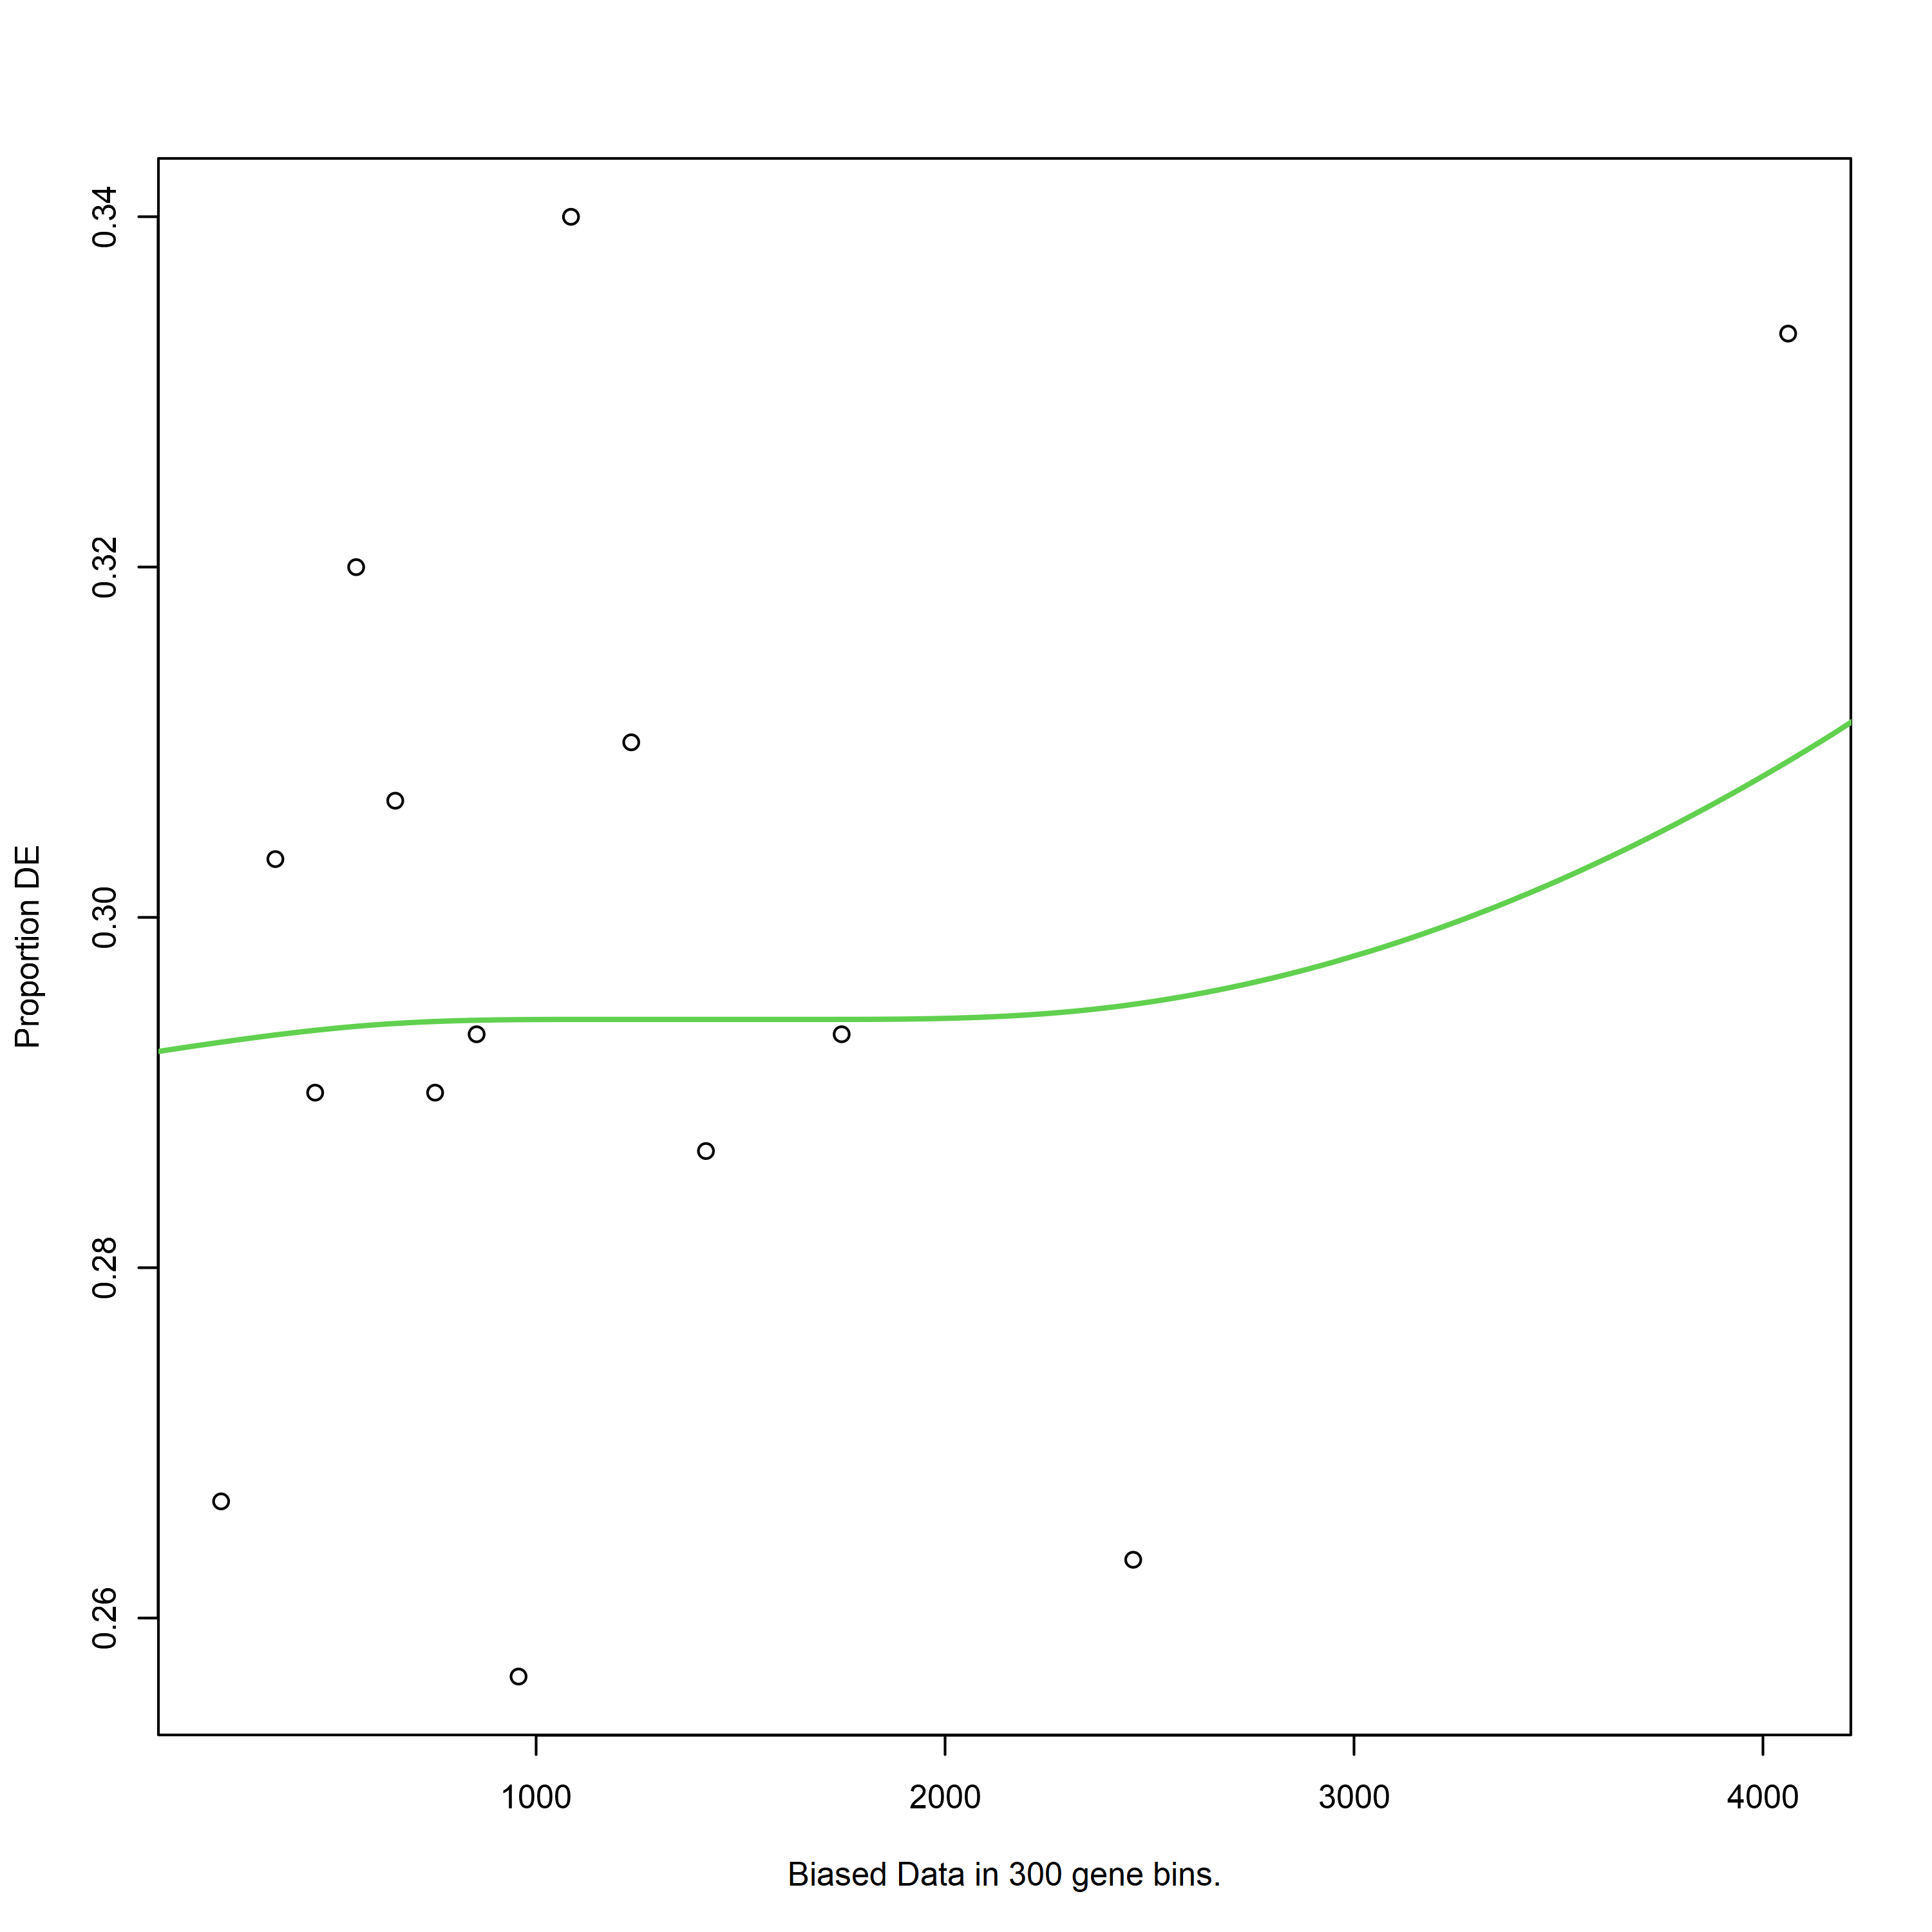

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC2_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C3vsC2_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


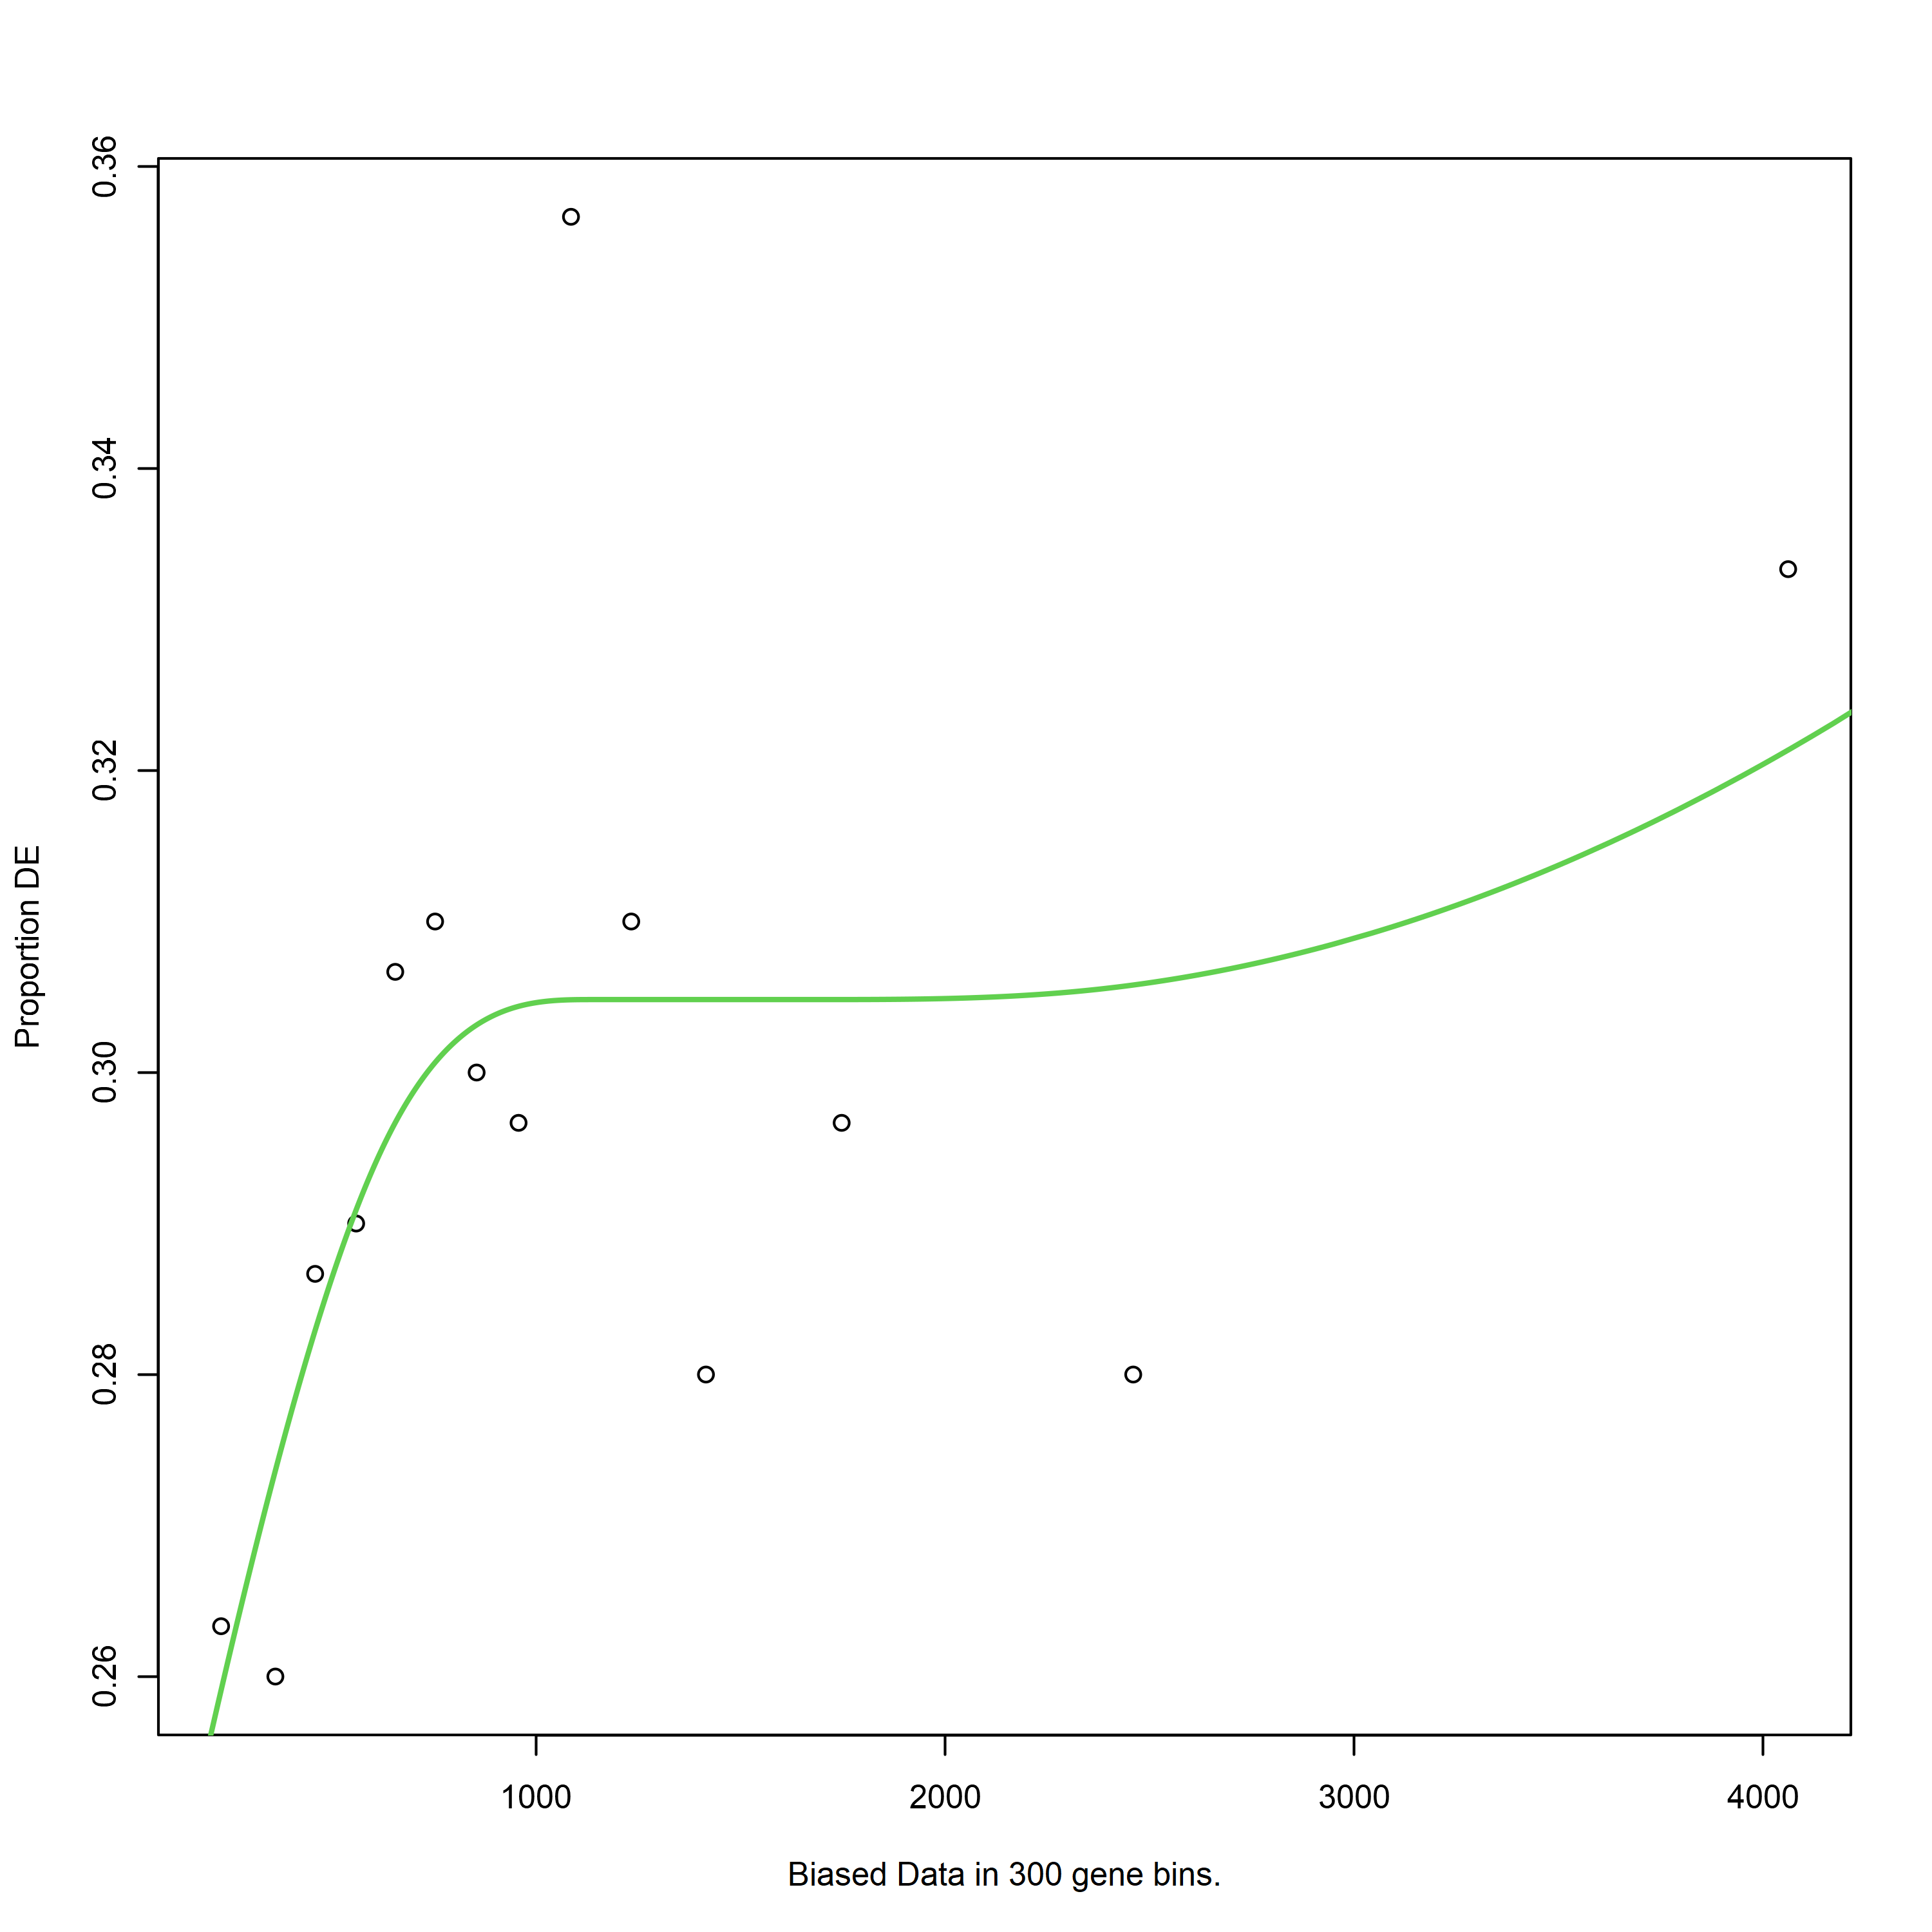

Using manually entered categories.

For 1751 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC3_rna"
[1] "sub"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C4vsC3_rna"
[1] "path"
[1] "is_de"


Warning message in pcls(G):
"initial point very close to some inequality constraints"


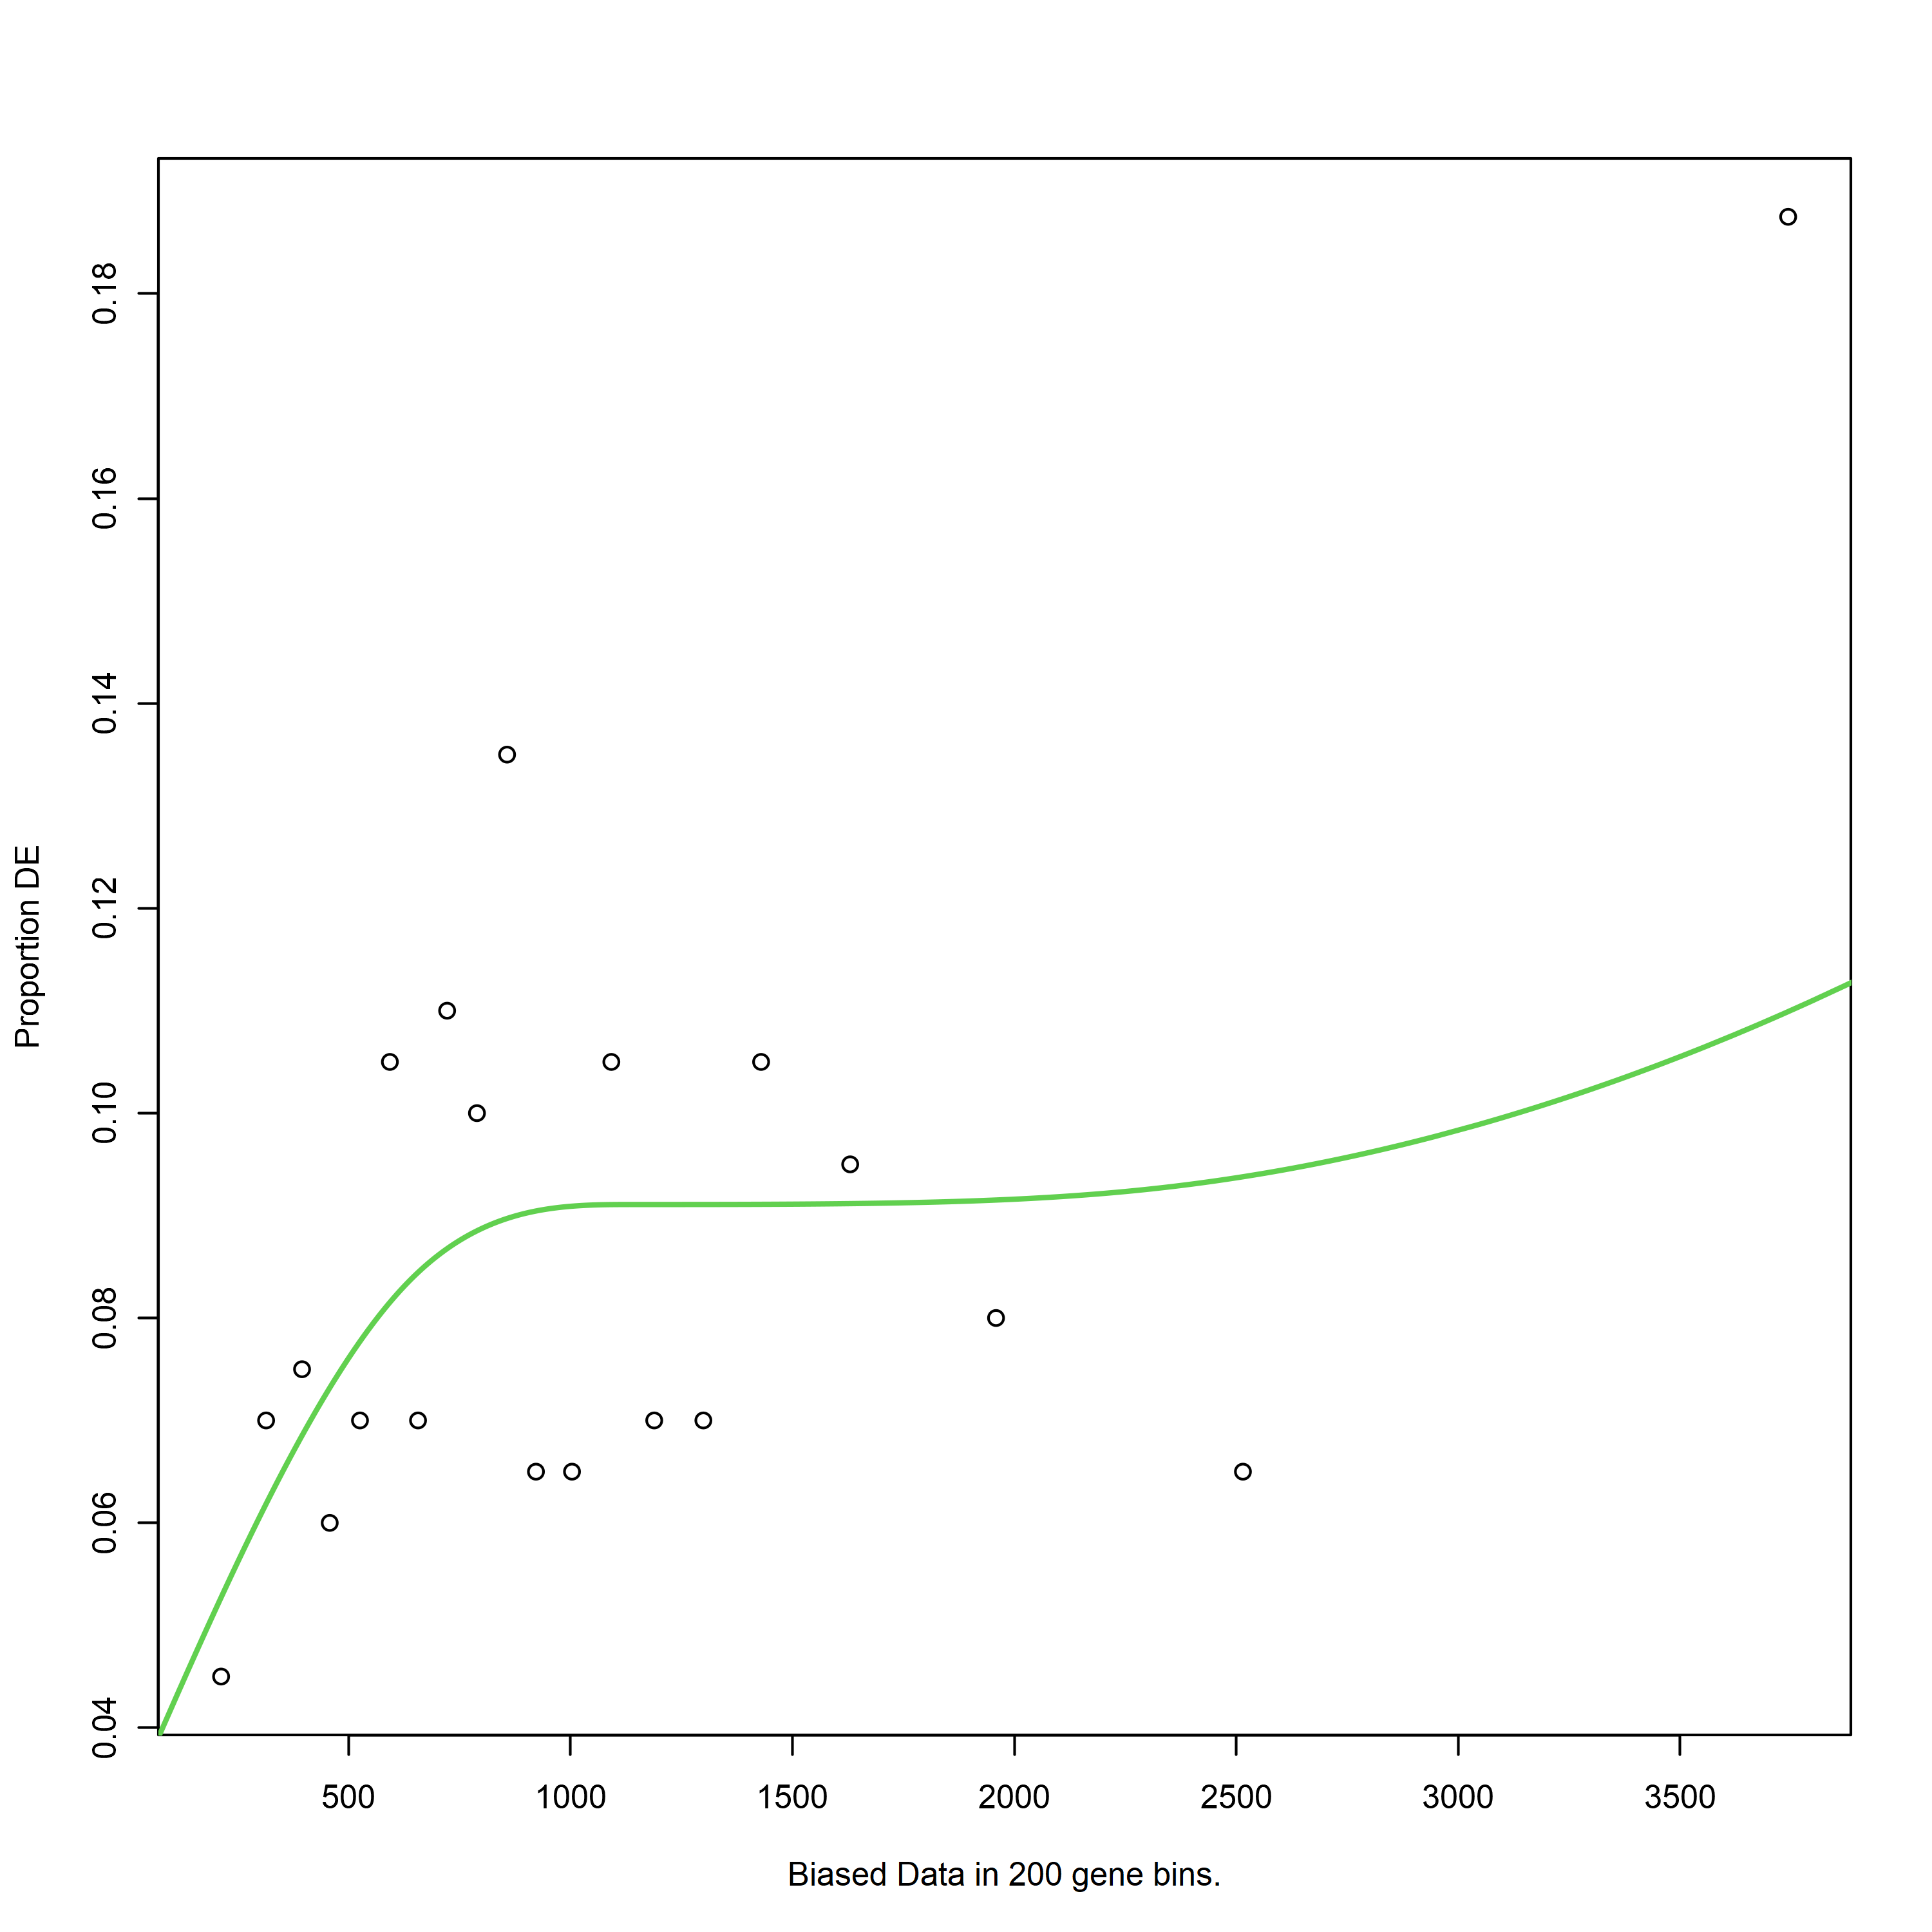

Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



[1] "C5vsC4_rna"
[1] "sub"
[1] "is_de"


Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



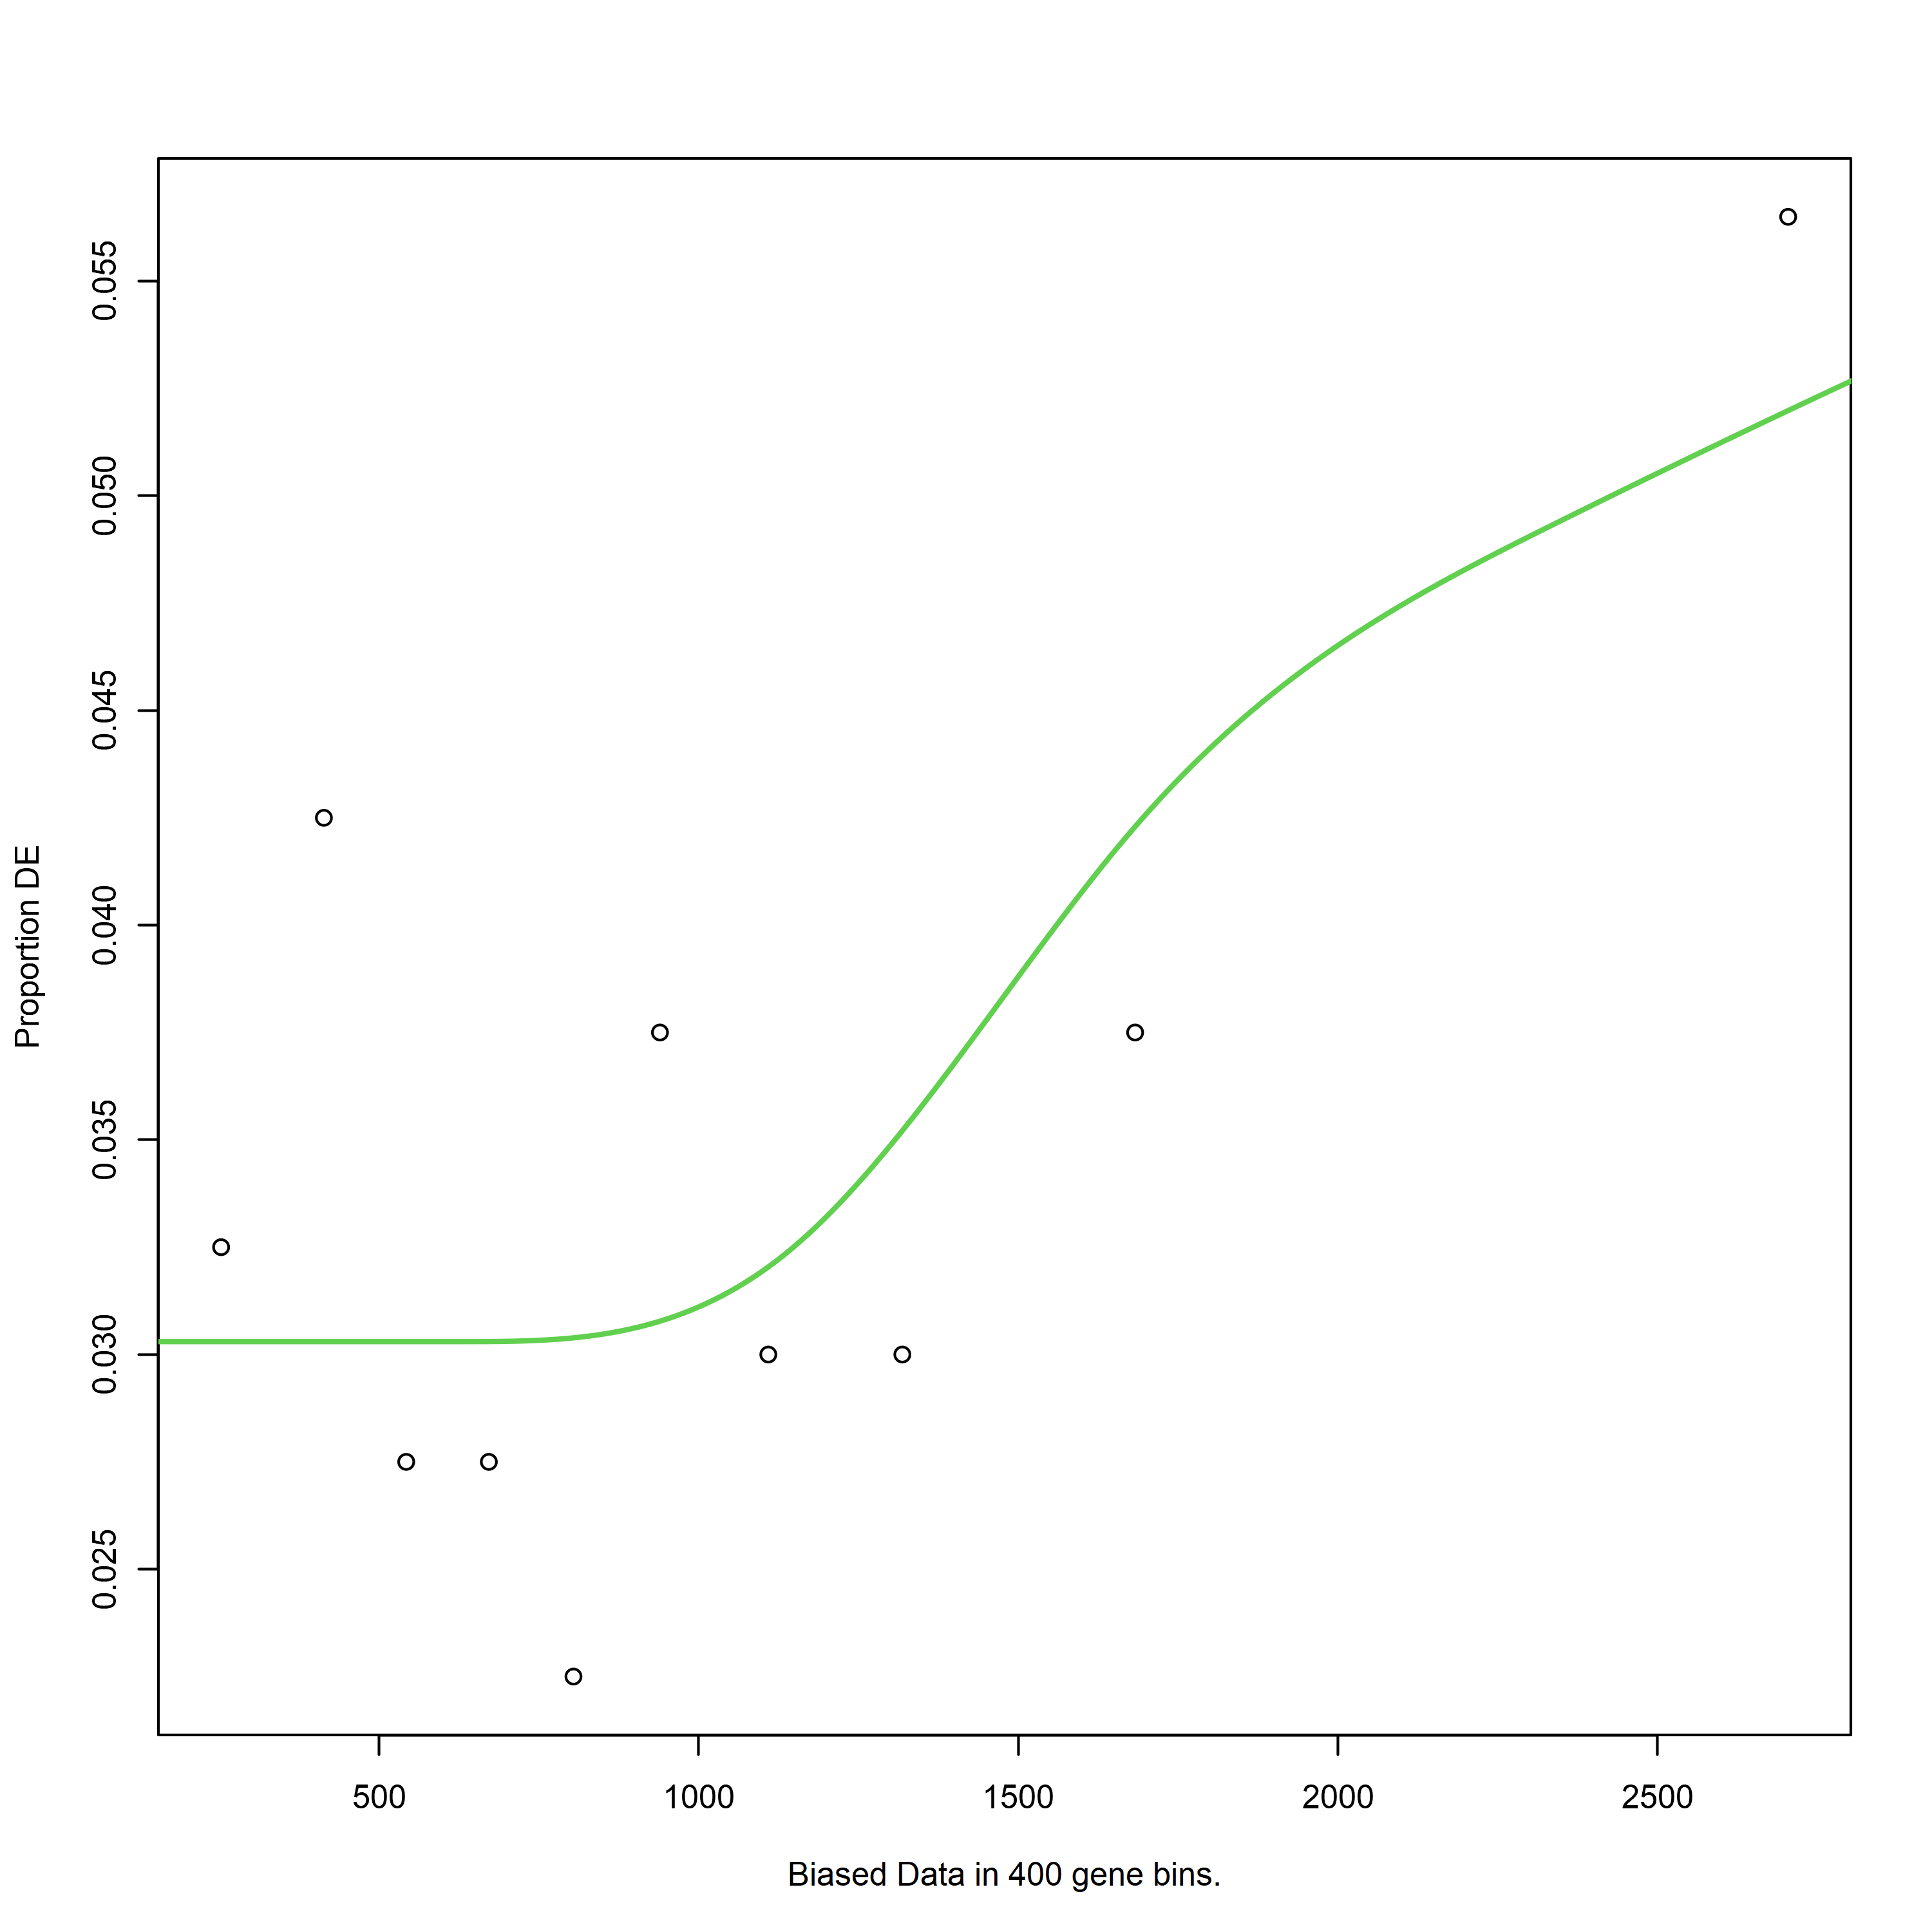

[1] "C5vsC4_rna"
[1] "path"
[1] "is_de"


Using manually entered categories.

For 1814 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



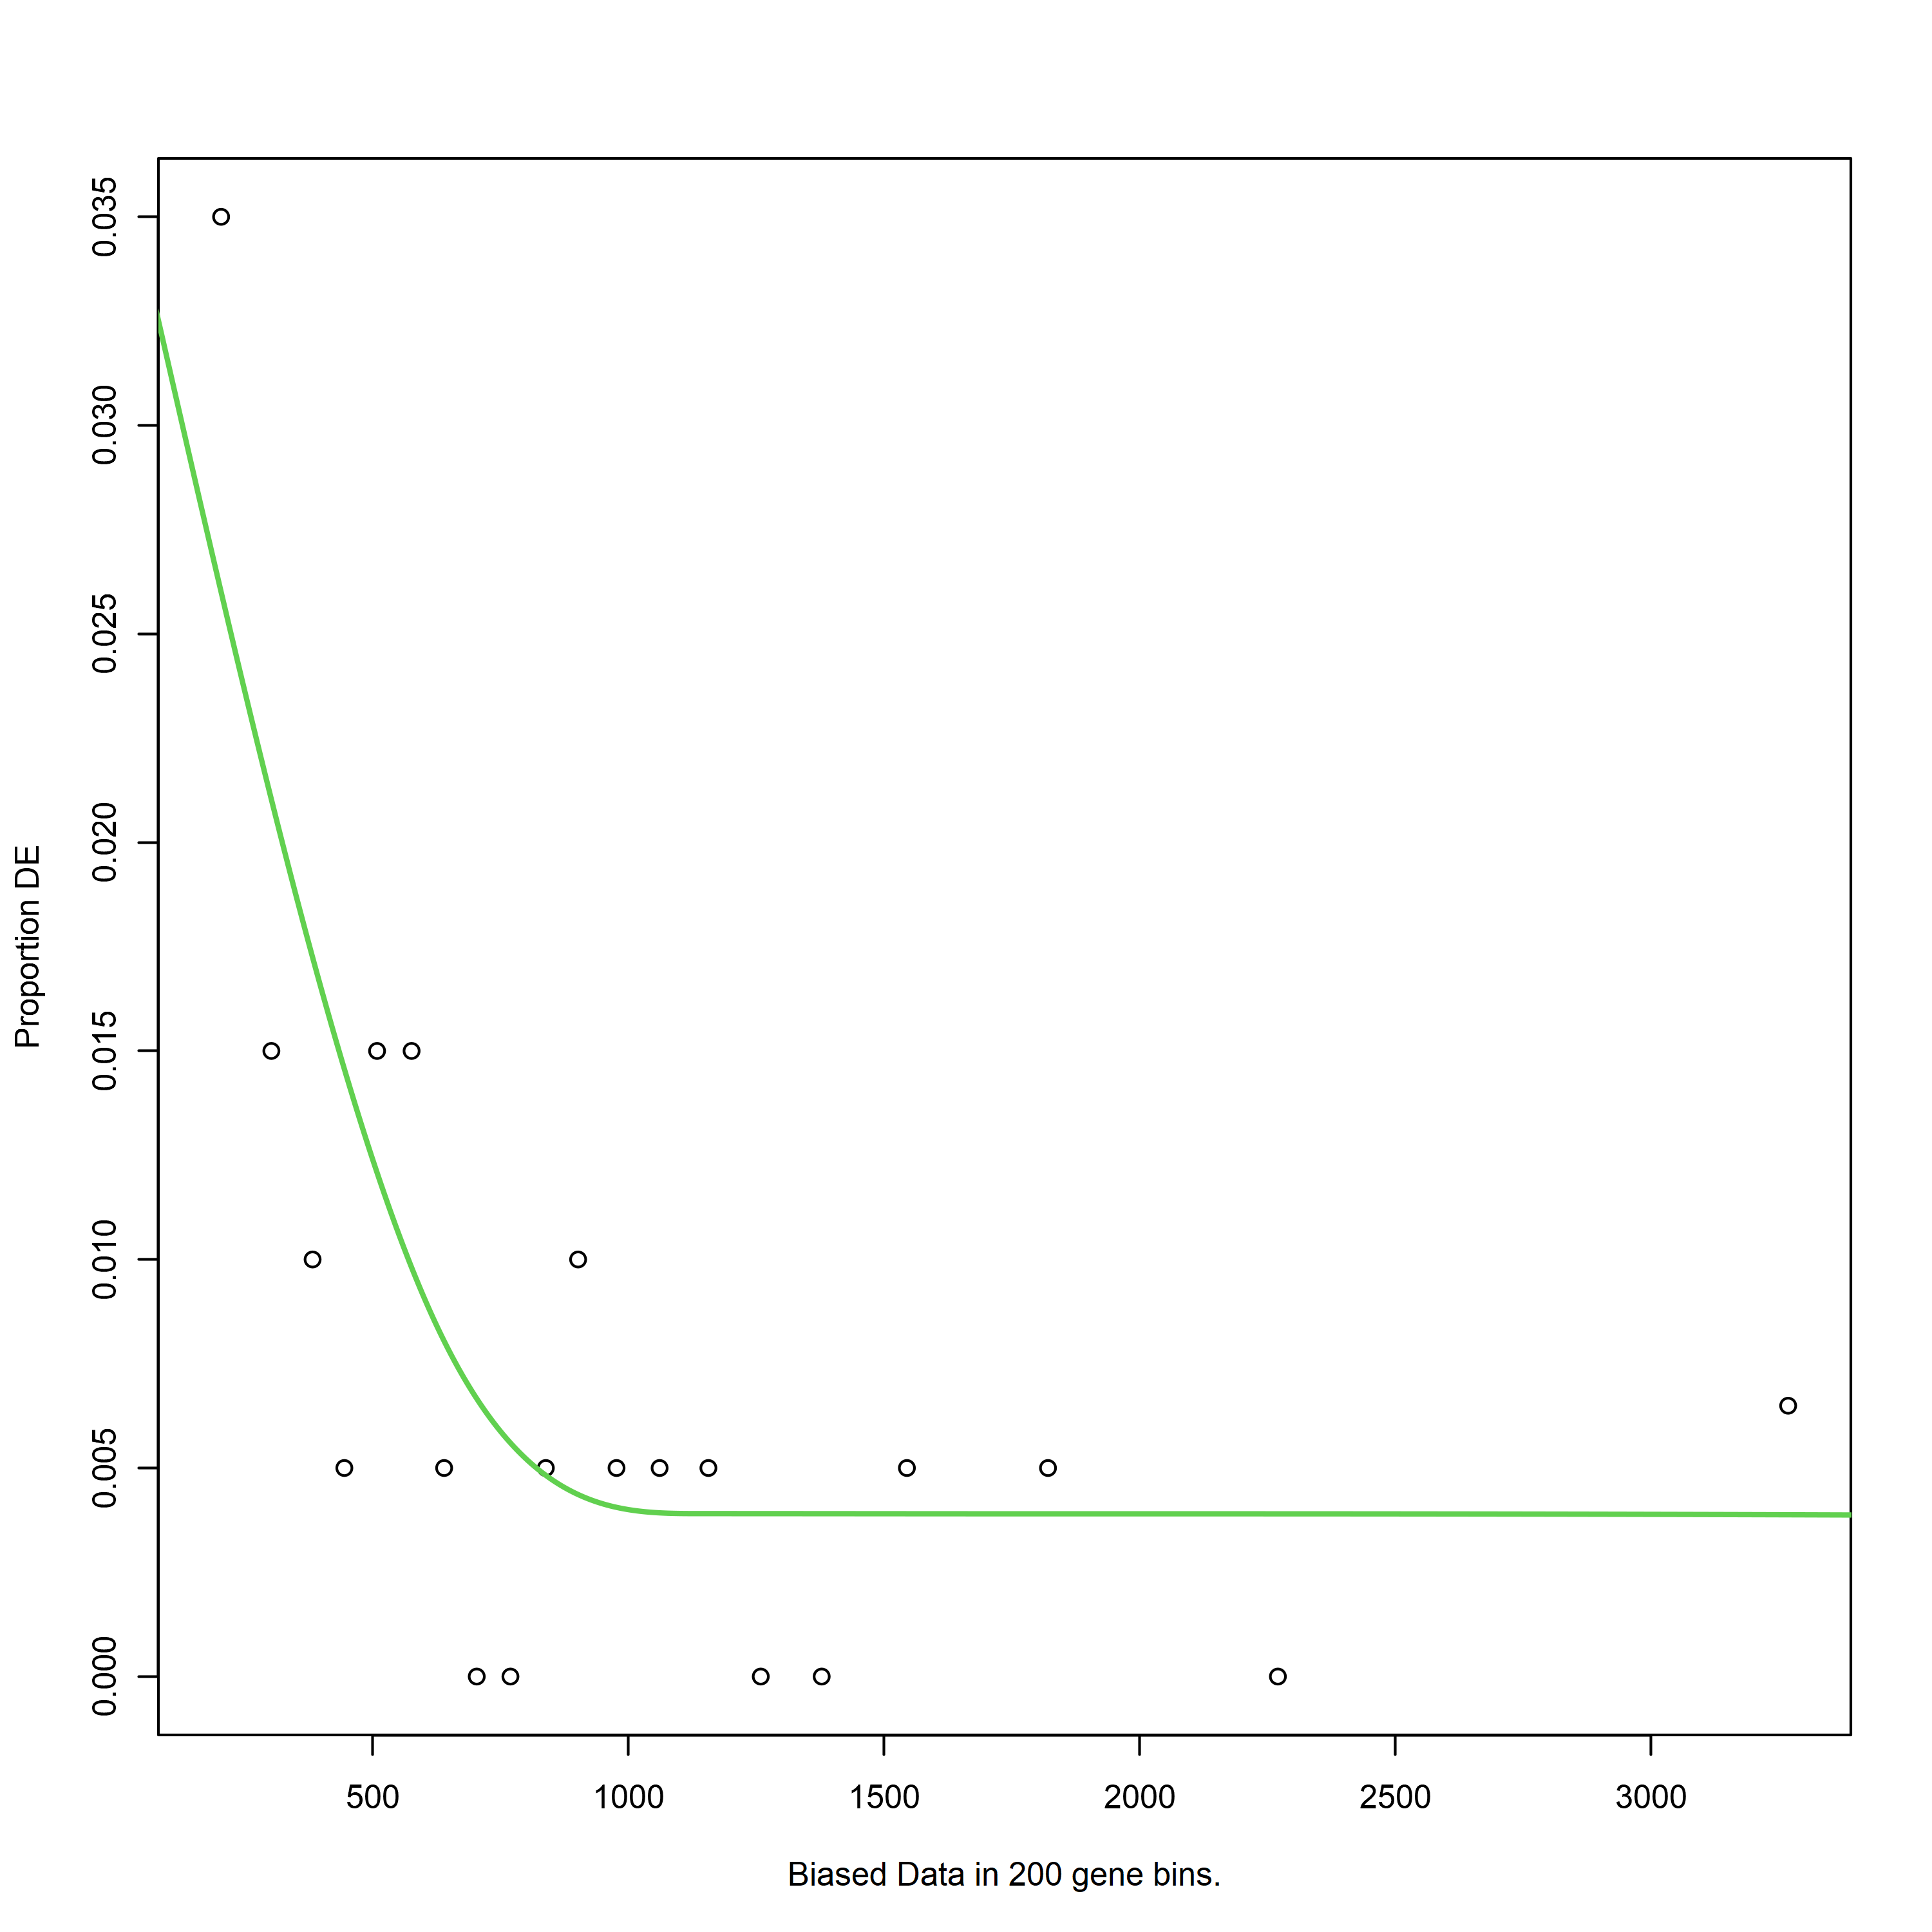

In [34]:
dlist = list()

for (contrastname in unique(df_all$contrast1)) 
{
    for (col in c('sub', 'path')  #, 'main','ecpath')
             ) 
        {
        for (test in c('is_de'))
            {
              dlist[[length(dlist) + 1]] <- run_enrichment(contrastname, col, test)
        }

    }
}
goseq_res = bind_rows(dlist)


In [35]:
t(goseq_res)

[,1]         [,2]         [,3]         [,4]        
category                 09105        09122        09102        09101       
over_represented_pvalue  1.305176e-05 3.478906e-05 9.262149e-03 6.715705e-02
padj                     3.523975e-04 4.696523e-04 8.335934e-02 4.094735e-01
under_represented_pvalue 9.999946e-01 9.999893e-01 9.954703e-01 9.557338e-01
numDEInCat                48           25           25           37         
numInCat                 170           76           96          165         
type                     is_de        is_de        is_de        is_de       
enrich                   sub          sub          sub          sub         
contrast                 C2vsC1_prot  C2vsC1_prot  C2vsC1_prot  C2vsC1_prot 
organism                 HOT1A3       HOT1A3       HOT1A3       HOT1A3      
                         [,5]         [,6]         [,7]         [,8]        
category                 09183        09142        09192        09111       
over_represented_pvalue  7.582843e-02 1.697586e-01 2.069029e-01 2.308716e-01
padj                     4.094735e-01 7.456719e-01 7.456719e-01 7.456719e-01
under_represented_pvalue 9.438659e-01 9.033018e-01 9.225491e-01 8.758087e-01
numDEInCat                77           12            4            8         
numInCat                 377           54           17           37         
type                     is_de        is_de        is_de        is_de       
enrich                   sub          sub          sub          sub         
contrast                 C2vsC1_prot  C2vsC1_prot  C2vsC1_prot  C2vsC1_prot 
organism                 HOT1A3       HOT1A3       HOT1A3       HOT1A3      
                         [,9]         [,10]        [,11] [,12]       
category                 09143        09132        ⋯     04812       
over_represented_pvalue  2.485573e-01 2.997199e-01 ⋯     1.000000e+00
padj                     7.456719e-01 8.016073e-01 ⋯     1.000000e+00
under_represented_pvalue 8.900731e-01 7.864858e-01 ⋯     9.033511e-01
numDEInCat                 5           19          ⋯       0         
numInCat                  18           99          ⋯      13         
type                     is_de        is_de        ⋯     is_de       
enrich                   sub          sub          ⋯     path        
contrast                 C2vsC1_prot  C2vsC1_prot  ⋯     C5vsC4_rna  
organism                 HOT1A3       HOT1A3       ⋯     HOT1A3      
                         [,13]        [,14]        [,15]        [,16]       
category                 99975        99976        99977        99982       
over_represented_pvalue  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
padj                     1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
under_represented_pvalue 8.130846e-01 8.574164e-01 9.229294e-01 9.108918e-01
numDEInCat                 0            0            0            0         
numInCat                  18           17           20            9         
type                     is_de        is_de        is_de        is_de       
enrich                   path         path         path         path        
contrast                 C5vsC4_rna   C5vsC4_rna   C5vsC4_rna   C5vsC4_rna  
organism                 HOT1A3       HOT1A3       HOT1A3       HOT1A3      
                         [,17]        [,18]        [,19]        [,20]       
category                 99987        99992        99994        99995       
over_represented_pvalue  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
padj                     1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
under_represented_pvalue 9.571101e-01 8.882896e-01 9.215549e-01 9.194245e-01
numDEInCat                 0            0            0            0         
numInCat                   5           18            6           14         
type                     is_de        is_de        is_de        is_de       
enrich                   path         path         path         path        
contrast             

In [36]:
duplicated_sub_list = c("09102 Energy metabolism", "09181 Protein families: metabolism", 
"09183 Protein families: signaling and cellular processes", "09191 Unclassified: metabolism", 
"09193 Unclassified: signaling and cellular processes")
duplicated_category_list = c( "Energy/Carbohydrate/Glycan", "Env. Info/Cellular Process", "Metabolism" )

sub_names_df = kegg_df %>% 
    distinct(main, sub, Category)  %>% filter(main != '') %>%
    #mutate(duplicate = (Category %in% duplicated_sub_list) | !(Category %in% duplicated_category_list))
    filter(!(
        (sub %in% duplicated_sub_list) & 
        !(Category %in% duplicated_category_list)
    )) %>%
    filter(!(
        (sub == '09191 Unclassified: metabolism') & !(Category  == 'Energy/Carbohydrate/Glycan')
    )) %>%
    mutate(
        PATH = sub,
        enrich = 'sub',
        category = word(PATH)
    )
    
path_names_df  = kegg_df %>% 
    distinct(main, sub, path, Category)  %>% filter(main != '') %>%
    
    mutate(
        PATH = path,
        enrich = 'path',
        category = word(PATH)
    )


final_names_df = bind_rows(sub_names_df, path_names_df) 

In [37]:
final_names_df %>% filter(category %in% (final_names_df %>% count(category) %>% filter(n>1))$category) %>% arrange(category)

main sub Category PATH enrich category path

In [38]:
goseq_res = left_join(goseq_res, final_names_df, by=c('category', 'enrich')) 

In [39]:
goseq_res

category over_represented_pvalue padj         under_represented_pvalue
1    09105    1.305176e-05            0.0003523975 0.9999946128            
2    09122    3.478906e-05            0.0004696523 0.9999893154            
3    09102    9.262149e-03            0.0833593415 0.9954703415            
4    09101    6.715705e-02            0.4094735357 0.9557338011            
5    09183    7.582843e-02            0.4094735357 0.9438658697            
6    09142    1.697586e-01            0.7456718532 0.9033017905            
7    09192    2.069029e-01            0.7456718532 0.9225490567            
8    09111    2.308716e-01            0.7456718532 0.8758087482            
9    09143    2.485573e-01            0.7456718532 0.8900731284            
10   09132    2.997199e-01            0.8016073455 0.7864857982            
11   09191    3.265808e-01            0.8016073455 0.7699551956            
12   09108    3.628899e-01            0.8165023289 0.7375361352            
13   09104    6.099526e-01            1.0000000000 0.5213773328            
14   09141    6.964304e-01            1.0000000000 0.5944749000            
15   09109    8.068015e-01            1.0000000000 0.3879520984            
16   09181    8.588913e-01            1.0000000000 0.1932559293            
17   09110    8.686696e-01            1.0000000000 0.2675643195            
18   09106    8.687188e-01            1.0000000000 0.2331638379            
19   09123    8.840046e-01            1.0000000000 0.2454223574            
20   09193    8.972771e-01            1.0000000000 0.2070345204            
21   09194    9.016449e-01            1.0000000000 0.1891208897            
22   09103    9.298385e-01            1.0000000000 0.1431562390            
23   09182    9.604096e-01            1.0000000000 0.0563013373            
24   09131    9.716803e-01            1.0000000000 0.0751960493            
25   09107    9.728662e-01            1.0000000000 0.0726827285            
26   09145    9.951591e-01            1.0000000000 0.0147078476            
27   09124    1.000000e+00            1.0000000000 0.0002419299            
28   03010    7.350610e-06            0.0004704390 0.9999984399            
29   03011    7.350610e-06            0.0004704390 0.9999984399            
30   00260    5.278062e-04            0.0225197299 0.9998963008            
⋮    ⋮        ⋮                       ⋮            ⋮                       
5169 03012    1                       1            0.8150423               
5170 03016    1                       1            0.5673724               
5171 03018    1                       1            0.9029098               
5172 03030    1                       1            0.8951817               
5173 03032    1                       1            0.7973169               
5174 03036    1                       1            0.5866378               
5175 03060    1                       1            0.8417507               
5176 03070    1                       1            0.7876624               
5177 03110    1                       1            0.6705117               
5178 03400    1                       1            0.5422915               
5179 03410    1                       1            0.9234343               
5180 03420    1                       1            0.9612351               
5181 03430    1                       1            0.8702289               
5182 03440    1                       1            0.8637138               
5183 04066    1                       1            0.9759903               
5184 04112    1                       1            0.9367668               
5185 04131    1                       1            0.9555331               
5186 04146    1                       1            0.9329235               
5187 04147    1                       1            0.7742262               
5188 04216    1                       1            0.9697126               
5189 04812    1                       1            0.

In [40]:
goseq_res = goseq_res %>% 
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
#    extract(main, c("Category"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
#    mutate(pathway = str_replace(pathway, "in photosynthetic organisms", "")) %>%
#    mutate(Category = word(Category)) %>%
    mutate(pathway = str_trim(pathway), #Category = str_trim(Category)
          ) 



In [41]:
goseq_res = goseq_res %>% 
    extract(sub, c("module"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
    mutate(module = str_replace(module, "in photosynthetic organisms", "")) %>%
    mutate(module = str_replace(module, "metabolism", "")) %>%
    mutate(module = str_replace(module, "Biosynthesis of", "")) %>%
    mutate(module = str_replace(module, "Metabolism of", "")) %>%
    mutate(module = str_replace(module, "biosynthesis", "")) %>%
    mutate(module = str_trim(module)) 



In [42]:
t(head(goseq_res))

1                          
category                 09105                      
over_represented_pvalue  1.305176e-05               
padj                     0.0003523975               
under_represented_pvalue 0.9999946                  
numDEInCat               48                         
numInCat                 170                        
type                     is_de                      
enrich                   sub                        
contrast                 C2vsC1_prot                
organism                 HOT1A3                     
main                     09100 Metabolism           
sub                      09105 Amino acid metabolism
module                   Amino acid                 
Category                 AA/Nucleotide              
PATH                     09105 Amino acid metabolism
pathway                  Amino acid metabolism      
path                     NA                         
                         2                                   
category                 09122                               
over_represented_pvalue  3.478906e-05                        
padj                     0.0004696523                        
under_represented_pvalue 0.9999893                           
numDEInCat               25                                  
numInCat                  76                                 
type                     is_de                               
enrich                   sub                                 
contrast                 C2vsC1_prot                         
organism                 HOT1A3                              
main                     09120 Genetic Information Processing
sub                      09122 Translation                   
module                   Translation                         
Category                 Genetic Info                        
PATH                     09122 Translation                   
pathway                  Translation                         
path                     NA                                  
                         3                         
category                 09102                     
over_represented_pvalue  9.262149e-03              
padj                     0.0833593415              
under_represented_pvalue 0.9954703                 
numDEInCat               25                        
numInCat                  96                       
type                     is_de                     
enrich                   sub                       
contrast                 C2vsC1_prot               
organism                 HOT1A3                    
main                     09100 Metabolism          
sub                      09102 Energy metabolism   
module                   Energy                    
Category                 Energy/Carbohydrate/Glycan
PATH                     09102 Energy metabolism   
pathway                  Energy metabolism         
path                     NA                        
                         4                            
category                 09101                        
over_represented_pvalue  6.715705e-02                 
padj                     0.4094735357                 
under_represented_pvalue 0.9557338                    
numDEInCat               37                           
numInCat                 165                          
type                     is_de                        
enrich                   sub                          
contrast                 C2vsC1_prot                  
organism                 HOT1A3                       
main                     09100 Metabolism             
sub                      09101 Carbohydrate metabolism
module                   Carbohydrate                 
Category                 Energy/Carbohydrate/Glycan   
PATH                     09101 Carbohydrate metabolism
pathway                  Carbohydrate metabolism      
path                     NA                           
                         5   

In [43]:
goseq_res %>% write_csv(file.path('DE_results', 'HOT1A3_GOSEQ_results_isDE.csv'))

In [44]:
#df_all %>% write_csv(file.path('DE_results', 'HOT1A3_all_FC_results.csv'))

In [51]:
top10 = goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  #filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(path %in% top10$PATH) %>% select(main,sub, path) %>% distinct() %>% arrange(main)

main                                      
1 09100 Metabolism                          
2 09100 Metabolism                          
3 09130 Environmental Information Processing
4 09180 Brite Hierarchies                   
5 09180 Brite Hierarchies                   
6 09180 Brite Hierarchies                   
  sub                                                     
1 09102 Energy metabolism                                 
2 09101 Carbohydrate metabolism                           
3 09132 Signal transduction                               
4 09183 Protein families: signaling and cellular processes
5 09183 Protein families: signaling and cellular processes
6 09181 Protein families: metabolism                      
  path                                              
1 00910 Nitrogen metabolism [PATH:ko00910]          
2 00500 Starch and sucrose metabolism [PATH:ko00500]
3 02020 Two-component system [PATH:ko02020]         
4 02000 Transporters [BR:ko02000]                   
5 02035 Bacterial motility proteins [BR:ko02035]    
6 01004 Lipid biosynthesis proteins [BR:ko01004]

In [50]:
top10 = goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  #filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(sub %in% top10$PATH) %>% select(main,sub) %>% distinct() %>% arrange(main)

main                                      
1 09100 Metabolism                          
2 09100 Metabolism                          
3 09100 Metabolism                          
4 09100 Metabolism                          
5 09130 Environmental Information Processing
6 09180 Brite Hierarchies                   
7 09180 Brite Hierarchies                   
  sub                                                     
1 09105 Amino acid metabolism                             
2 09102 Energy metabolism                                 
3 09101 Carbohydrate metabolism                           
4 09103 Lipid metabolism                                  
5 09132 Signal transduction                               
6 09182 Protein families: genetic information processing  
7 09183 Protein families: signaling and cellular processes

In [47]:
head(goseq_res)

category over_represented_pvalue padj         under_represented_pvalue
1 09105    1.305176e-05            0.0003523975 0.9999946               
2 09122    3.478906e-05            0.0004696523 0.9999893               
3 09102    9.262149e-03            0.0833593415 0.9954703               
4 09101    6.715705e-02            0.4094735357 0.9557338               
5 09183    7.582843e-02            0.4094735357 0.9438659               
6 09142    1.697586e-01            0.7456718532 0.9033018               
  numDEInCat numInCat type  enrich contrast    organism
1 48         170      is_de sub    C2vsC1_prot HOT1A3  
2 25          76      is_de sub    C2vsC1_prot HOT1A3  
3 25          96      is_de sub    C2vsC1_prot HOT1A3  
4 37         165      is_de sub    C2vsC1_prot HOT1A3  
5 77         377      is_de sub    C2vsC1_prot HOT1A3  
6 12          54      is_de sub    C2vsC1_prot HOT1A3  
  main                                
1 09100 Metabolism                    
2 09120 Genetic Information Processing
3 09100 Metabolism                    
4 09100 Metabolism                    
5 09180 Brite Hierarchies             
6 09140 Cellular Processes            
  sub                                                     
1 09105 Amino acid metabolism                             
2 09122 Translation                                       
3 09102 Energy metabolism                                 
4 09101 Carbohydrate metabolism                           
5 09183 Protein families: signaling and cellular processes
6 09142 Cell motility                                     
  module                                             Category                  
1 Amino acid                                         AA/Nucleotide             
2 Translation                                        Genetic Info              
3 Energy                                             Energy/Carbohydrate/Glycan
4 Carbohydrate                                       Energy/Carbohydrate/Glycan
5 Protein families: signaling and cellular processes Env. Info/Cellular Process
6 Cell motility                                      Motility                  
  PATH                                                    
1 09105 Amino acid metabolism                             
2 09122 Translation                                       
3 09102 Energy metabolism                                 
4 09101 Carbohydrate metabolism                           
5 09183 Protein families: signaling and cellular processes
6 09142 Cell motility                                     
  pathway                                            path
1 Amino acid metabolism                              NA  
2 Translation                                        NA  
3 Energy metabolism                                  NA  
4 Carbohydrate metabolism                            NA  
5 Protein families: signaling and cellular processes NA  
6 Cell motility                                      NA

In [48]:
goseq_meta = goseq_res %>% distinct(contrast) %>% 
    separate_wider_delim(contrast, "_", names = c(NA, "Assay"), cols_remove = FALSE) %>%
    mutate(Group = case_when(
        str_detect(contrast, "C1")~ "Coculture", 
        str_detect(contrast, "3|5")~ "Axenic late", 
        TRUE~ "Axenic"
    )) %>% 
    mutate(
        Group = factor(Group, levels=c("Coculture", "Axenic", "Axenic late")),
        Assay = factor(Assay, levels=c("rna", "prot"))
          ) %>%
    arrange(Group, Assay, contrast) %>%
    column_to_rownames('contrast') 
goseq_meta 

Assay Group      
C1vsA1_rna    rna   Coculture  
C2vsC1_rna    rna   Coculture  
C3vsC1_rna    rna   Coculture  
C4vsC1_rna    rna   Coculture  
C5vsC1_rna    rna   Coculture  
LATEvsC1_rna  rna   Coculture  
C2vsC1_prot   prot  Coculture  
C3vsC1_prot   prot  Coculture  
C4vsC1_prot   prot  Coculture  
C5vsC1_prot   prot  Coculture  
LATEvsC1_prot prot  Coculture  
A2vsA1_rna    rna   Axenic     
LATEvsA1_rna  rna   Axenic     
LATEvsA2_rna  rna   Axenic     
LATEvsC2_rna  rna   Axenic     
A2vsA1_prot   prot  Axenic     
LATEvsC2_prot prot  Axenic     
A3vsA1_rna    rna   Axenic late
A3vsA2_rna    rna   Axenic late
C3vsC2_rna    rna   Axenic late
C4vsC3_rna    rna   Axenic late
C5vsC4_rna    rna   Axenic late
LATEvsA3_rna  rna   Axenic late
LATEvsC3_rna  rna   Axenic late
A3vsA1_prot   prot  Axenic late
A3vsA2_prot   prot  Axenic late
A5vsA1_prot   prot  Axenic late
A5vsA3_prot   prot  Axenic late
C3vsC2_prot   prot  Axenic late
C4vsC3_prot   prot  Axenic late
C5vsC4_prot   prot  Axenic late
LATEvsC3_prot prot  Axenic late

In [49]:
sessionInfo()

R version 4.2.2 (2022-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 26100)

Matrix products: default

locale:
[1] LC_COLLATE=English_Israel.utf8  LC_CTYPE=English_Israel.utf8   
[3] LC_MONETARY=English_Israel.utf8 LC_NUMERIC=C                   
[5] LC_TIME=English_Israel.utf8    

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ComplexHeatmap_2.14.0       ggrepel_0.9.3              
 [3] ComplexUpset_1.3.3          circlize_0.4.15            
 [5] corrplot_0.92               pheatmap_1.0.12            
 [7] lubridate_1.9.2             forcats_1.0.0              
 [9] stringr_1.5.0               dplyr_1.1.0                
[11] purrr_1.0.1                 readr_2.1.4                
[13] tidyr_1.3.0                 tibble_3.1.8               
[15] tidyverse_2.0.0             readxl_1.4.2               
[17] goseq_1.50.0                gen